# Julia juypter notebook for TITLE (http://...)

## Ran using Julia 1.6.2

# Basic dynamics plot (determinisitc)

In [1]:
using DifferentialEquations
using Plots; pyplot()

Plots.PyPlotBackend()

In [2]:
#define model with delay
function dde_system(du,u,h,p,t)
    C,Mₘ,NK,T = u
    α₁,α₂,α₃,α₇,α₈,α₉,α₁₀,α₁₁,α₁₂,α₁₃,α₁₄,α₁₆,α₁₇,α₁₈,α₁₉,α₂₁ = p
    histC_MDSC = h(p, t-τ₁; idxs=1)
   
# Cancer cells (tumor)
    du[1] = dC = α₇*C*log(α₈/C) - α₉*C*NK - α₁₀*C*T - α₁₁*C
 # MDSC 
    du[2] = dMₘ = α₁ + α₂*histC_MDSC/(γ₁+(histC_MDSC^n)) - α₃*Mₘ 
 # NK cells
    du[3] = dNK = α₁₂ + α₁₃*(C^2)/(γ₂+(C^2)) - α₁₄*Mₘ*NK - α₁₆*NK 
 # T cells
    du[4] = dT = α₁₇*C*NK + α₁₈*(C^2)/(γ₃+(C^2)) - α₁₉*Mₘ*T - α₂₁*T
end

dde_system (generic function with 1 method)

In [3]:
#define model without delay
function ode_system(du,u,p,t)
    C,Mₘ,NK,T = u
    α₁,α₂,α₃,α₇,α₈,α₉,α₁₀,α₁₁,α₁₂,α₁₃,α₁₄,α₁₆,α₁₇,α₁₈,α₁₉,α₂₁ = p
   
# Cancer cells (tumor)
    du[1] = dC = α₇*C*log(α₈/C) - α₉*C*NK - α₁₀*C*T - α₁₁*C
 # MDSC 
    du[2] = dMₘ = α₁ + α₂*C/(γ₁+(C^n)) - α₃*Mₘ 
 # NK cells
    du[3] = dNK = α₁₂ + α₁₃*(C^2)/(γ₂+(C^2)) - α₁₄*Mₘ*NK - α₁₆*NK 
 # T cells
    du[4] = dT = α₁₇*C*NK + α₁₈*(C^2)/(γ₃+(C^2)) - α₁₉*Mₘ*T - α₂₁*T 
end

ode_system (generic function with 1 method)

In [4]:
#define initial number of tumor cells for delay model
h(p, t; idxs=nothing) = typeof(idxs) <: Number ? 1.0 : ones(4)
h(1,0)

4-element Vector{Float64}:
 1.0
 1.0
 1.0
 1.0

In [5]:
#set model parameters
n = 1.0

α₁ = 10.0*(10.0^1.0) #M-MDSCs production rate
α₂ = (10.0^8.0) #M-MDSCs expansion coefficient 
α₃ = 0.2 #M-MDSCs death rate

α₇ = 10.0^(-1.0) #tumor growth rate
α₈ = 10.0^7.0 #tumor maximum size
α₉ = 3.5*(10.0^(-6.0)) #tumor cells kill rate by NK cells
α₁₀ = 1.1*(10.0^(-7.0)) #tumor cells kill rate by T cells
α₁₁ = 0.0 #tumor cell death rate

α₁₂ = 1.4*(10.0^4.0) #NK cells production rate
α₁₃ = 2.5*(10.0^(-2.0)) #NK cells expansion coefficient
α₁₄ = 4*(10.0^(-5.0)) #NK cells inactivation rate by M-MDSCs
α₁₆ = 4.12*(10.0^(-2.0)) #NK cells death rate

α₁₇ = 1.1*(10.0^(-7.0)) #CTL stimulation as a result of tumor-NK cell interaction
α₁₈ = 10.0^(-1.0) #CTL expansion coefficient 
α₁₉ = (10.0^(-4.0)) #CTL inactivation rate by M-MDSCs
α₂₁ = 2.0*(10.0^(-2.0)) #CTL death rate

γ₁ = (10.0^(10.0)) #steepness coefficient of MDSC production curve
γ₂ = 2.02*(10.0^(7.0)) #steepness coefficient of NK production curve
γ₃ = 2.02*(10.0^(7.0)) #steepness coefficient of CTL production curve

p = (α₁,α₂,α₃,α₇,α₈,α₉,α₁₀,α₁₁,α₁₂,α₁₃,α₁₄,α₁₆,α₁₇,α₁₈,α₁₉,α₂₁)
tspan = (0.0,365.0)
u0 = [1.0;α₁/α₃;α₃*α₁₂/(α₁*α₁₄+α₃*α₁₆);0.0]

4-element Vector{Float64}:
      1.0
    500.0
 228758.1699346405
      0.0

In [6]:
#set numerical solution algorithm
alg = MethodOfSteps(Tsit5())

MethodOfSteps{Tsit5, NLFunctional{Rational{Int64}, Rational{Int64}}, false}(Tsit5(), NLFunctional{Rational{Int64}, Rational{Int64}}(1//100, 1//5, 10))

## Panel a

In [7]:
#solve with τ₁ = 0
prob_panel_a = ODEProblem(ode_system,u0,tspan,p)
sol_panel_a = solve(prob_panel_a,alg)

retcode: Success
Interpolation: automatic order switching interpolation
t: 445-element Vector{Float64}:
   0.0
   0.060256944660698405
   0.2658731855330636
   0.6178678412300449
   1.08210261861819
   1.684126310943165
   2.4317786018601573
   3.34578128252542
   4.446307229515896
   5.765151525342025
   7.3470861647998404
   9.261456882988949
  11.618070929491504
   ⋮
 187.9672031342375
 190.03999794557305
 192.9080599208194
 196.63918381898029
 201.59464423824605
 208.01413758737382
 216.52337407060975
 227.97513152798126
 244.3682518224029
 270.40390772927594
 323.1263863026601
 365.0
u: 445-element Vector{Vector{Float64}}:
 [1.0, 500.0, 228758.1699346405, 0.0]
 [1.0499376846703614, 500.0006138318529, 228758.1697666647, 0.0015506139550194307]
 [1.2371655191044955, 500.00288952088306, 228758.16653464, 0.00739247487097743]
 [1.625829025487545, 500.0075401967587, 228758.15023991073, 0.01967656172997377]
 [2.2977508055193923, 500.01551776993205, 228758.10325701066, 0.041424678823349784

## Panel b

In [8]:
#solve with τ₁ = 10
τ₁ = 10.0
lags = [τ₁]
prob_panel_b = DDEProblem(dde_system,u0,h,tspan,p;constant_lags=lags)
sol_panel_b = solve(prob_panel_b,alg)

retcode: Success
Interpolation: specialized 4th order "free" interpolation
t: 2026-element Vector{Float64}:
   0.0
   0.060256944660698405
   0.2658734178686916
   0.6178687107454937
   1.0821047745271066
   1.6841306003991123
   2.4317868938108327
   3.3457984635632845
   4.446346083730195
   5.765250476321567
   7.347365035501882
   9.262303706455713
  10.0
   ⋮
 364.2512925952412
 364.3231782533725
 364.39506390388647
 364.466949551544
 364.5388351963451
 364.61072083828964
 364.6826064773777
 364.75449211837014
 364.8263777565061
 364.89826340130713
 364.9701490432517
 365.0
u: 2026-element Vector{Vector{Float64}}:
 [1.0, 500.0, 228758.1699346405, 0.0]
 [1.049937684670211, 500.00059895308914, 228758.1697693897, 0.0015506139550585689]
 [1.2371657460757373, 500.0025892819727, 228758.1667743292, 0.0073924819999076925]
 [1.625830100813976, 500.00581217656213, 228758.15337768738, 0.019676596661356113]
 [2.2977543746170803, 500.00973019024576, 228758.12112892728, 0.04142480372273145]
 [3

## Panel c

In [9]:
#solve with τ₁ = 50
τ₁ = 50.0
lags = [τ₁]
prob_panel_c = DDEProblem(dde_system,u0,h,tspan,p;constant_lags=lags)
sol_panel_c = solve(prob_panel_c,alg)

retcode: Success
Interpolation: specialized 4th order "free" interpolation
t: 61-element Vector{Float64}:
   0.0
   0.060256944660698405
   0.2658734178686916
   0.6178687107454937
   1.0821047745271066
   1.6841306003991123
   2.4317868938108327
   3.3457984635632845
   4.446346083730195
   5.765250476321567
   7.347365035501882
   9.262303706455713
  11.620621114648774
   ⋮
 298.81872958596455
 300.0
 305.8328940253516
 310.9484744236442
 317.6921821292129
 324.2785929641402
 331.4271970890849
 338.4450005015858
 345.5349241874984
 352.4408109871918
 359.0814132898404
 365.0
u: 61-element Vector{Vector{Float64}}:
 [1.0, 500.0, 228758.1699346405, 0.0]
 [1.049937684670211, 500.00059895308914, 228758.1697693897, 0.0015506139550585689]
 [1.2371657460757373, 500.0025892819727, 228758.1667743292, 0.0073924819999076925]
 [1.625830100813976, 500.00581217656213, 228758.15337768738, 0.019676596661356113]
 [2.2977543746170803, 500.00973019024576, 228758.12112892728, 0.04142480372273145]
 [3.515

## Panel d

In [10]:
#solve with τ₁ = 365
τ₁ = 365.0
lags = [τ₁]
prob_panel_d = DDEProblem(dde_system,u0,h,tspan,p;constant_lags=lags)
sol_panel_d = solve(prob_panel_d,alg)

retcode: Success
Interpolation: specialized 4th order "free" interpolation
t: 35-element Vector{Float64}:
   0.0
   0.060256944660698405
   0.2658734178686916
   0.6178687107454937
   1.0821047745271066
   1.6841306003991123
   2.4317868938108327
   3.3457984635632845
   4.446346083730195
   5.765250476321567
   7.347365035501882
   9.262303706455713
  11.620621114648774
   ⋮
 112.08121128158379
 133.41601612639033
 159.42186225156118
 191.64642067117916
 234.4977658739547
 269.2358080692991
 285.8424753492777
 301.1547005123996
 317.0853514642827
 333.9599065613273
 351.6206096167115
 365.0
u: 35-element Vector{Vector{Float64}}:
 [1.0, 500.0, 228758.1699346405, 0.0]
 [1.049937684670211, 500.00059895308914, 228758.1697693897, 0.0015506139550585689]
 [1.2371657460757373, 500.0025892819727, 228758.1667743292, 0.0073924819999076925]
 [1.625830100813976, 500.00581217656213, 228758.15337768738, 0.019676596661356113]
 [2.2977543746170803, 500.00973019024576, 228758.12112892728, 0.04142480372

## Plot

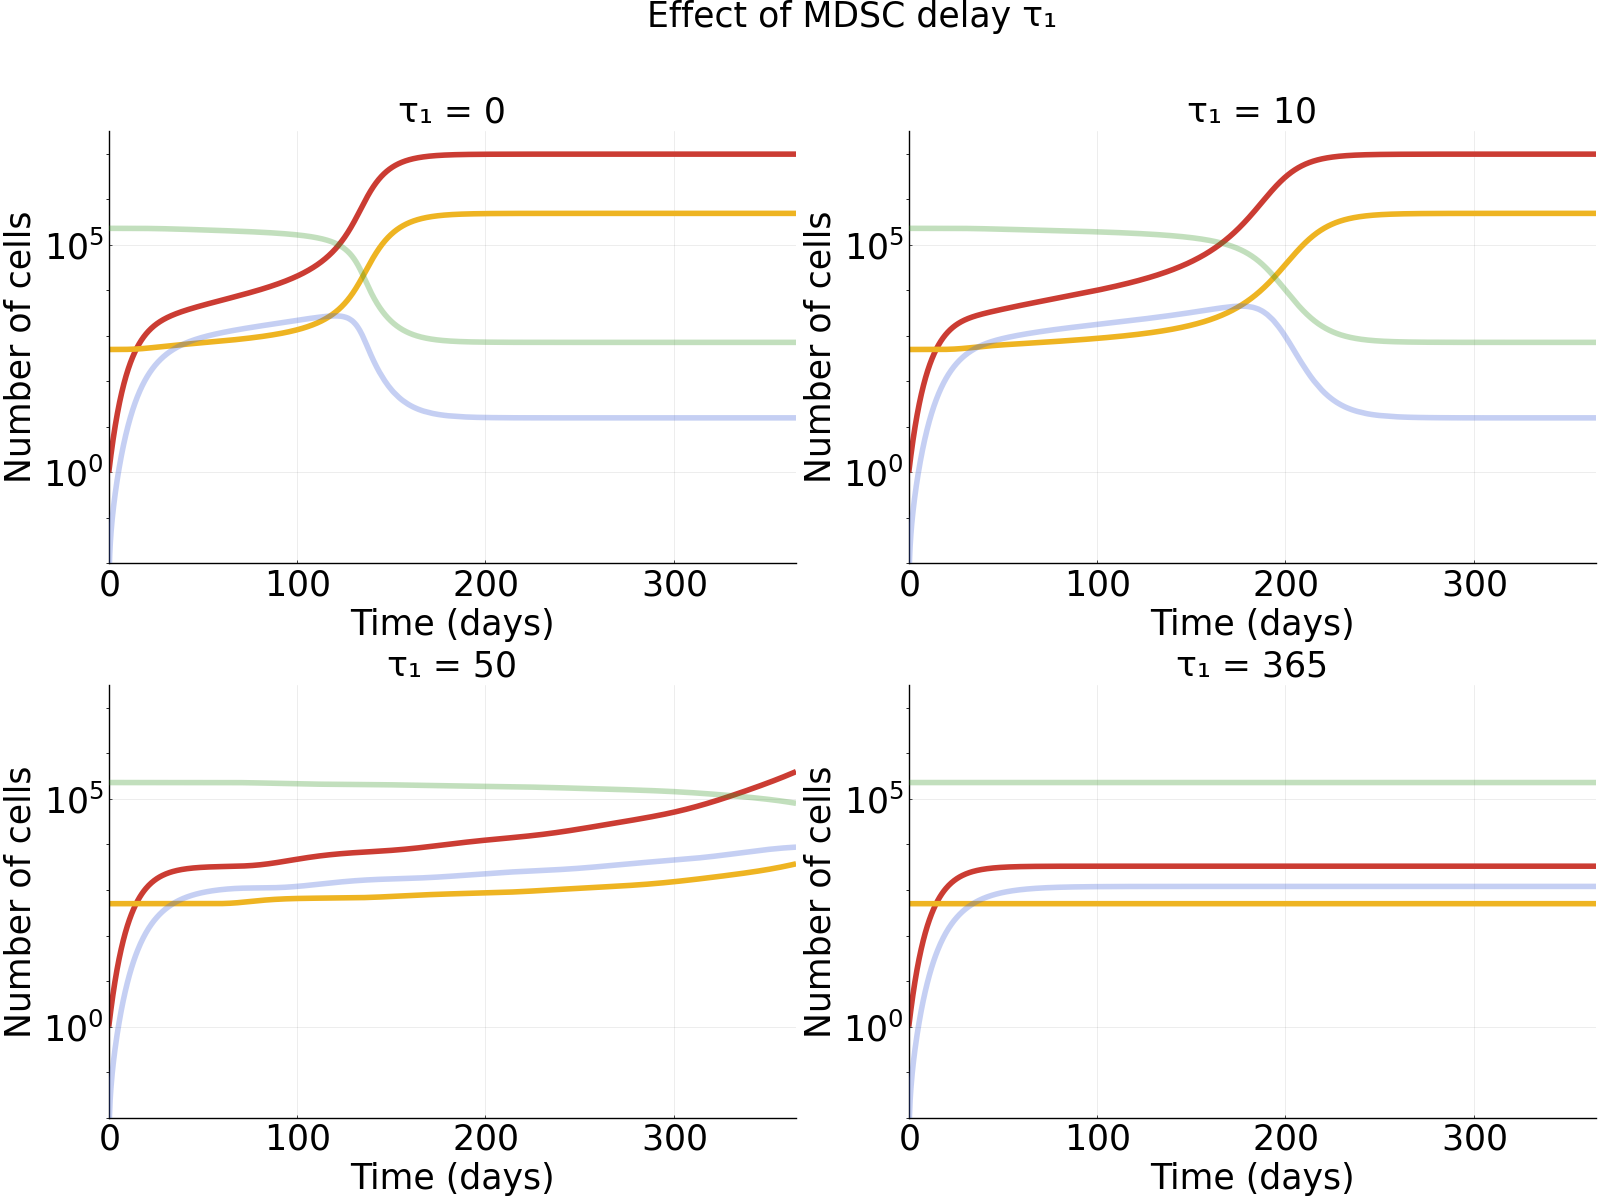

┌ Warning: Invalid negative or zero value 0.0 found at series index 1 for log10 based yscale
└ @ Plots /Users/jessekreger/.julia/packages/Plots/Xv2qA/src/utils.jl:95
┌ Warning: Invalid negative or zero value 0.0 found at series index 1 for log10 based yscale
└ @ Plots /Users/jessekreger/.julia/packages/Plots/Xv2qA/src/utils.jl:95
┌ Warning: Invalid negative or zero value 0.0 found at series index 1 for log10 based yscale
└ @ Plots /Users/jessekreger/.julia/packages/Plots/Xv2qA/src/utils.jl:95
┌ Warning: Invalid negative or zero value 0.0 found at series index 1 for log10 based yscale
└ @ Plots /Users/jessekreger/.julia/packages/Plots/Xv2qA/src/utils.jl:95


In [11]:
#plot results
l = @layout [a b; c d]
logocolors = Colors.JULIA_LOGO_COLORS
a = plot(sol_panel_a, lw = 4, yaxis=:log,size =(1600/2,600), font = "Ariel", ylims = (0.01,10^7.5), color = [logocolors.red "goldenrod2" logocolors.green logocolors.blue], alpha = [1 1 0.3 0.3], legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (days)",xguidefontsize=25,ylabel="Number of cells",yguidefontsize=25,title = "τ₁ = 0",titlefontsize=25)
b = plot(sol_panel_b, lw = 4, yaxis=:log,size =(1600/2,600), font = "Ariel", ylims = (0.01,10^7.5), color = [logocolors.red "goldenrod2" logocolors.green logocolors.blue], alpha = [1 1 0.3 0.3], legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (days)",xguidefontsize=25,ylabel="Number of cells",yguidefontsize=25,title = "τ₁ = 10",titlefontsize=25)
c = plot(sol_panel_c, lw = 4, yaxis=:log,size =(1600/2,600), font = "Ariel", ylims = (0.01,10^7.5), color = [logocolors.red "goldenrod2" logocolors.green logocolors.blue], alpha = [1 1 0.3 0.3], legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (days)",xguidefontsize=25,ylabel="Number of cells",yguidefontsize=25,title = "τ₁ = 50",titlefontsize=25)
d = plot(sol_panel_d, lw = 4, yaxis=:log,size =(1600/2,600), font = "Ariel", ylims = (0.01,10^7.5), color = [logocolors.red "goldenrod2" logocolors.green logocolors.blue], alpha = [1 1 0.3 0.3], legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (days)",xguidefontsize=25,ylabel="Number of cells",yguidefontsize=25,title = "τ₁ = 365",titlefontsize=25)
plot(a, b, c, d, layout = l,size =(1600,1200),xtickfont=font(25),ytickfont=font(25),guidefont=font(25),legendfont=font(25),plot_title="Effect of MDSC delay τ₁", font = "Ariel",titlefontsize=25)

# G calculations

In [1]:
using DifferentialEquations
using Plots; pyplot()

Plots.PyPlotBackend()

In [2]:
#define model without delay
function ode_system(du,u,p,t)
    C,Mₘ,NK,T = u
    α₁,α₂,α₃,α₇,α₈,α₉,α₁₀,α₁₁,α₁₂,α₁₃,α₁₄,α₁₆,α₁₇,α₁₈,α₁₉,α₂₁ = p
   
# Cancer cells (tumor)
    du[1] = dC = α₇*C*log(α₈/C) - α₉*C*NK - α₁₀*C*T - α₁₁*C
 # MDSC 
    du[2] = dMₘ = α₁ + α₂*C/(γ₁+(C^n)) - α₃*Mₘ 
 # NK cells
    du[3] = dNK = α₁₂ + α₁₃*(C^2)/(γ₂+(C^2)) - α₁₄*Mₘ*NK - α₁₆*NK 
 # T cells
    du[4] = dT = α₁₇*C*NK + α₁₈*(C^2)/(γ₃+(C^2)) - α₁₉*Mₘ*T - α₂₁*T
end

ode_system (generic function with 1 method)

In [3]:
#set numerical solution algorithm
alg = MethodOfSteps(Tsit5())

MethodOfSteps{Tsit5, NLFunctional{Rational{Int64}, Rational{Int64}}, false}(Tsit5(), NLFunctional{Rational{Int64}, Rational{Int64}}(1//100, 1//5, 10))

## Panel a

In [4]:
#set model parameters
n = 1.0

α₁ = 100.0 #M-MDSCs production rate
α₂ = (10.0^8.0) #M-MDSCs expansion coefficient 
α₃ = 0.2 #M-MDSCs death rate

α₇ = 10.0^(-1.0) #tumor growth rate
α₈ = 10.0^7.0 #tumor maximum size
α₉ = 3.5*(10.0^(-6.0)) #tumor cells kill rate by NK cells
α₁₀ = 1.1*(10.0^(-7.0)) #tumor cells kill rate by T cells
α₁₁ = 0.0 #tumor cell death rate

α₁₂ = 1.4*(10.0^4.0) #NK cells production rate
α₁₃ = 2.5*(10.0^(-2.0)) #NK cells expansion coefficient
α₁₄ = 4*(10.0^(-5.0)) #NK cells inactivation rate by M-MDSCs
α₁₆ = 4.12*(10.0^(-2.0)) #NK cells death rate

α₁₇ = 1.1*(10.0^(-7.0)) #CTL stimulation as a result of tumor-NK cell interaction
α₁₈ = 10.0^(-1.0) #CTL expansion coefficient 
α₁₉ = (10.0^(-4.0)) #CTL inactivation rate by M-MDSCs
α₂₁ = 2.0*(10.0^(-2.0)) #CTL death rate


γ₁ = (10.0^(10.0)) #steepness coefficient of MDSC production curve
γ₂ = 2.02*(10.0^(7.0)) #steepness coefficient of NK production curve
γ₃ = 2.02*(10.0^(7.0)) #steepness coefficient of CTL production curve

p = (α₁,α₂,α₃,α₇,α₈,α₉,α₁₀,α₁₁,α₁₂,α₁₃,α₁₄,α₁₆,α₁₇,α₁₈,α₁₉,α₂₁)
tspan = (0.0,365.0)
u0 = [1.0;α₁/α₃;α₃*α₁₂/(α₁*α₁₄+α₃*α₁₆);0.0]

4-element Vector{Float64}:
      1.0
    500.0
 228758.1699346405
      0.0

In [5]:
#calculate growth condition G
growthcondition = α₇*log(α₈)-α₉*(α₃*α₁₂/(α₁*α₁₄+α₃*α₁₆))-α₁₁

0.8111559703245904

In [6]:
#solve with α₁₁ = 0
prob_panel_a = ODEProblem(ode_system,u0,tspan,p)
sol_panel_a = solve(prob_panel_a,alg)

retcode: Success
Interpolation: automatic order switching interpolation
t: 445-element Vector{Float64}:
   0.0
   0.060256944660698405
   0.2658731855330636
   0.6178678412300449
   1.08210261861819
   1.684126310943165
   2.4317786018601573
   3.34578128252542
   4.446307229515896
   5.765151525342025
   7.3470861647998404
   9.261456882988949
  11.618070929491504
   ⋮
 187.9672031342375
 190.03999794557305
 192.9080599208194
 196.63918381898029
 201.59464423824605
 208.01413758737382
 216.52337407060975
 227.97513152798126
 244.3682518224029
 270.40390772927594
 323.1263863026601
 365.0
u: 445-element Vector{Vector{Float64}}:
 [1.0, 500.0, 228758.1699346405, 0.0]
 [1.0499376846703614, 500.0006138318529, 228758.1697666647, 0.0015506139550194307]
 [1.2371655191044955, 500.00288952088306, 228758.16653464, 0.00739247487097743]
 [1.625829025487545, 500.0075401967587, 228758.15023991073, 0.01967656172997377]
 [2.2977508055193923, 500.01551776993205, 228758.10325701066, 0.041424678823349784

## Panel b

In [7]:
#set model parameters
n = 1.0

α₁ = 100.0 #M-MDSCs production rate
α₂ = (10.0^8.0) #M-MDSCs expansion coefficient 
α₃ = 0.2 #M-MDSCs death rate

α₇ = 10.0^(-1.0) #tumor growth rate
α₈ = 10.0^7.0 #tumor maximum size
α₉ = 3.5*(10.0^(-6.0)) #tumor cells kill rate by NK cells
α₁₀ = 1.1*(10.0^(-7.0)) #tumor cells kill rate by T cells
α₁₁ = 0.81 #tumor cell death rate

α₁₂ = 1.4*(10.0^4.0) #NK cells production rate
α₁₃ = 2.5*(10.0^(-2.0)) #NK cells expansion coefficient
α₁₄ = 4*(10.0^(-5.0)) #NK cells inactivation rate by M-MDSCs
α₁₆ = 4.12*(10.0^(-2.0)) #NK cells death rate

α₁₇ = 1.1*(10.0^(-7.0)) #CTL stimulation as a result of tumor-NK cell interaction
α₁₈ = 10.0^(-1.0) #CTL expansion coefficient 
α₁₉ = (10.0^(-4.0)) #CTL inactivation rate by M-MDSCs
α₂₁ = 2.0*(10.0^(-2.0)) #CTL death rate


γ₁ = (10.0^(10.0)) #steepness coefficient of MDSC production curve
γ₂ = 2.02*(10.0^(7.0)) #steepness coefficient of NK production curve
γ₃ = 2.02*(10.0^(7.0)) #steepness coefficient of CTL production curve

p = (α₁,α₂,α₃,α₇,α₈,α₉,α₁₀,α₁₁,α₁₂,α₁₃,α₁₄,α₁₆,α₁₇,α₁₈,α₁₉,α₂₁)
tspan = (0.0,365.0)
u0 = [1.0;α₁/α₃;α₃*α₁₂/(α₁*α₁₄+α₃*α₁₆);0.0]

4-element Vector{Float64}:
      1.0
    500.0
 228758.1699346405
      0.0

In [8]:
#calculate growth condition G
growthcondition = α₇*log(α₈)-α₉*(α₃*α₁₂/(α₁*α₁₄+α₃*α₁₆))-α₁₁

0.0011559703245903608

In [9]:
#solve with α₁₁ = 0.81
prob_panel_b = ODEProblem(ode_system,u0,tspan,p)
sol_panel_b = solve(prob_panel_b,alg)

retcode: Success
Interpolation: automatic order switching interpolation
t: 27-element Vector{Float64}:
   0.0
   0.06026319071061688
   0.6628950978167857
   2.6285563507918503
   5.9785643229107155
  10.373675099044792
  16.109939551683464
  23.215565882237463
  31.90797313693023
  42.32397405057573
  54.75053510371529
  69.53931614400449
  87.26506215695187
   ⋮
 169.37694402698244
 207.9560365954279
 224.99819092286128
 240.47382121311344
 256.3865307300418
 273.1677958174278
 290.7235835507921
 308.6951866908537
 326.70314494188835
 344.52985076279094
 362.1413674356732
 365.0
u: 27-element Vector{Vector{Float64}}:
 [1.0, 500.0, 228758.1699346405, 0.0]
 [1.0000694553955596, 500.0005990356662, 228758.1697693517, 0.001513285657960967]
 [1.000741729712397, 500.0062106922454, 228758.15094540018, 0.016305754896854163]
 [1.0026763266292371, 500.02047415842446, 228757.91672691298, 0.060501600607488285]
 [1.0052223250076056, 500.0349925073917, 228757.16607628966, 0.12330240840409104]
 [1.0

## Panel c

In [10]:
#set model parameters
n = 1.0

α₁ = 100.0 #M-MDSCs production rate
α₂ = (10.0^8.0) #M-MDSCs expansion coefficient 
α₃ = 0.2 #M-MDSCs death rate

α₇ = 10.0^(-1.0) #tumor growth rate
α₈ = 10.0^7.0 #tumor maximum size
α₉ = 3.5*(10.0^(-6.0)) #tumor cells kill rate by NK cells
α₁₀ = 1.1*(10.0^(-7.0)) #tumor cells kill rate by T cells
α₁₁ = 1.0 #tumor cell death rate

α₁₂ = 1.4*(10.0^4.0) #NK cells production rate
α₁₃ = 2.5*(10.0^(-2.0)) #NK cells expansion coefficient
α₁₄ = 4*(10.0^(-5.0)) #NK cells inactivation rate by M-MDSCs
α₁₆ = 4.12*(10.0^(-2.0)) #NK cells death rate

α₁₇ = 1.1*(10.0^(-7.0)) #CTL stimulation as a result of tumor-NK cell interaction
α₁₈ = 10.0^(-1.0) #CTL expansion coefficient 
α₁₉ = (10.0^(-4.0)) #CTL inactivation rate by M-MDSCs
α₂₁ = 2.0*(10.0^(-2.0)) #CTL death rate


γ₁ = (10.0^(10.0)) #steepness coefficient of MDSC production curve
γ₂ = 2.02*(10.0^(7.0)) #steepness coefficient of NK production curve
γ₃ = 2.02*(10.0^(7.0)) #steepness coefficient of CTL production curve

p = (α₁,α₂,α₃,α₇,α₈,α₉,α₁₀,α₁₁,α₁₂,α₁₃,α₁₄,α₁₆,α₁₇,α₁₈,α₁₉,α₂₁)
tspan = (0.0,365.0)
u0 = [1.0;α₁/α₃;α₃*α₁₂/(α₁*α₁₄+α₃*α₁₆);0.0]

4-element Vector{Float64}:
      1.0
    500.0
 228758.1699346405
      0.0

In [11]:
#calculate growth condition G
growthcondition = α₇*log(α₈)-α₉*(α₃*α₁₂/(α₁*α₁₄+α₃*α₁₆))-α₁₁

-0.18884402967540959

In [12]:
#solve with α₁₁ = 1.0
prob_panel_c = ODEProblem(ode_system,u0,tspan,p)
sol_panel_c = solve(prob_panel_c,alg)

retcode: Success
Interpolation: automatic order switching interpolation
t: 32-element Vector{Float64}:
   0.0
   0.06026285200529721
   0.3944160223209874
   1.078806968028187
   2.0557432958986555
   3.337174330481057
   5.001938595430361
   7.095683273187781
   9.703612466765511
  12.904649021266206
  16.800268473726167
  21.502002041122203
  27.13381760282179
   ⋮
 137.88449346412898
 167.86024977581516
 206.66432488902862
 239.00781590327495
 256.236104148281
 271.9554932962574
 287.7578627320467
 304.2223382184734
 321.46307402630424
 339.2576101320652
 357.24988365522677
 365.0
u: 32-element Vector{Vector{Float64}}:
 [1.0, 500.0, 228758.1699346405, 0.0]
 [0.9887180655940915, 500.0005956158799, 228758.1697699825, 0.001504657762530663]
 [0.9295698153294281, 500.00365479194215, 228758.1632240973, 0.009436322127571218]
 [0.8243815042201627, 500.00877832044097, 228758.12453758088, 0.02370693382645528]
 [0.704046843869449, 500.0139620361686, 228758.02670666427, 0.04022150305314154]
 [0

In [13]:
#plot results
l = @layout [a b c]
logocolors = Colors.JULIA_LOGO_COLORS
a = plot(sol_panel_a, lw = 4, yaxis=:log,size =(1600/3,600), font = "Ariel", ylims = (0.01,10^7.5), color = [logocolors.red "goldenrod2" logocolors.green logocolors.blue], alpha = [1 1 0.3 0.3], legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (days)",xguidefontsize=25,ylabel="Number of cells",yguidefontsize=25,title = "G = 0.8",titlefontsize=25)
b = plot(sol_panel_b, lw = 4, yaxis=:log,size =(1600/3,600), font = "Ariel", ylims = (0.01,10^7.5), color = [logocolors.red "goldenrod2" logocolors.green logocolors.blue], alpha = [1 1 0.3 0.3], legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (days)",xguidefontsize=25,ylabel="Number of cells",yguidefontsize=25,title = "G = 0",titlefontsize=25)
c = plot(sol_panel_c, lw = 4, yaxis=:log,size =(1600/3,600), font = "Ariel", ylims = (0.01,10^7.5), color = [logocolors.red "goldenrod2" logocolors.green logocolors.blue], alpha = [1 1 0.3 0.3], legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (days)",xguidefontsize=25,ylabel="Number of cells",yguidefontsize=25,title = "G = -0.2",titlefontsize=25)
plot(a, b, c, layout = l,size =(1600,600),xtickfont=font(25),ytickfont=font(25),guidefont=font(25),legendfont=font(25),plot_title="Effect of tumor growth threshold G", font = "Ariel",titlefontsize=25)

┌ Warning: Invalid negative or zero value 0.0 found at series index 1 for log10 based yscale
└ @ Plots /Users/jessekreger/.julia/packages/Plots/Xv2qA/src/utils.jl:95
┌ Warning: Invalid negative or zero value 0.0 found at series index 1 for log10 based yscale
└ @ Plots /Users/jessekreger/.julia/packages/Plots/Xv2qA/src/utils.jl:95
┌ Warning: Invalid negative or zero value 0.0 found at series index 1 for log10 based yscale
└ @ Plots /Users/jessekreger/.julia/packages/Plots/Xv2qA/src/utils.jl:95


# α₁₄ calculations

In [1]:
using DifferentialEquations
using Plots; pyplot()

Plots.PyPlotBackend()

In [44]:
#define model without delay
function ode_system(du,u,p,t)
    C,Mₘ,NK,T = u
    α₁,α₂,α₃,α₇,α₈,α₉,α₁₀,α₁₁,α₁₂,α₁₃,α₁₄,α₁₆,α₁₇,α₁₈,α₁₉,α₂₁ = p
   
# Cancer cells (tumor)
    du[1] = dC = α₇*C*log(α₈/C) - α₉*C*NK - α₁₀*C*T - α₁₁*C
 # MDSC 
    du[2] = dMₘ = α₁ + α₂*C/(γ₁+(C^n)) - α₃*Mₘ 
 # NK cells
    du[3] = dNK = α₁₂ + α₁₃*(C^2)/(γ₂+(C^2)) - α₁₄*Mₘ*NK - α₁₆*NK #- β₁*NK*C 
 # T cells
    du[4] = dT = α₁₇*C*NK + α₁₈*(C^2)/(γ₃+(C^2)) - α₁₉*Mₘ*T - α₂₁*T #- β₂*T*C
end

ode_system (generic function with 1 method)

In [45]:
#set numerical solution algorithm
alg = MethodOfSteps(Tsit5())

MethodOfSteps{Tsit5, NLFunctional{Rational{Int64}, Rational{Int64}}, false}(Tsit5(), NLFunctional{Rational{Int64}, Rational{Int64}}(1//100, 1//5, 10))

## Panel e

In [46]:
#set model parameters
n = 1.0

α₁ = 100.0 #M-MDSCs production rate
α₂ = (10.0^8.0) #M-MDSCs expansion coefficient 
α₃ = 0.2 #M-MDSCs death rate

α₇ = 10.0^(-1.0) #tumor growth rate
α₈ = 10.0^7.0 #tumor maximum size
α₉ = 3.5*(10.0^(-6.0)) #tumor cells kill rate by NK cells
α₁₀ = 1.1*(10.0^(-7.0)) #tumor cells kill rate by T cells
α₁₁ = 0.0 #tumor cell death rate

α₁₂ = 1.4*(10.0^4.0) #NK cells production rate
α₁₃ = 2.5*(10.0^(-2.0)) #NK cells expansion coefficient
α₁₄ = (10.0^(-5.0)) #NK cells inactivation rate by M-MDSCs
α₁₆ = 4.12*(10.0^(-2.0)) #NK cells death rate

α₁₇ = 1.1*(10.0^(-7.0)) #CTL stimulation as a result of tumor-NK cell interaction
α₁₈ = 10.0^(-1.0) #CTL expansion coefficient 
α₁₉ = (10.0^(-4.0)) #CTL inactivation rate by M-MDSCs
α₂₁ = 2.0*(10.0^(-2.0)) #CTL death rate


γ₁ = (10.0^(10.0)) #steepness coefficient of MDSC production curve
γ₂ = 2.02*(10.0^(7.0)) #steepness coefficient of NK production curve
γ₃ = 2.02*(10.0^(7.0)) #steepness coefficient of CTL production curve

p = (α₁,α₂,α₃,α₇,α₈,α₉,α₁₀,α₁₁,α₁₂,α₁₃,α₁₄,α₁₆,α₁₇,α₁₈,α₁₉,α₂₁)
tspan = (0.0,365.0)
u0 = [1.0;α₁/α₃;α₃*α₁₂/(α₁*α₁₄+α₃*α₁₆);0.0]

4-element Vector{Float64}:
      1.0
    500.0
 303030.303030303
      0.0

In [47]:
#calculate growth condition G
growthcondition = α₇*log(α₈)-α₉*(α₃*α₁₂/(α₁*α₁₄+α₃*α₁₆))-α₁₁

0.5512035044897718

In [48]:
#solve with α₁₄ = 10⁻⁵
prob_panel_e = ODEProblem(ode_system,u0,tspan,p)
sol_panel_e = solve(prob_panel_e,alg)

retcode: Success
Interpolation: automatic order switching interpolation
t: 34-element Vector{Float64}:
   0.0
   0.051937098115968826
   0.30114101634968166
   0.7941046672564865
   1.4933753240851284
   2.404452231851278
   3.5813180079056517
   5.069989759581608
   6.958171568649835
   9.376803851708914
  12.554206696876376
  17.074689464150353
  22.21975441947014
   ⋮
 160.5998736111142
 188.22633322162935
 205.79225135578923
 221.8954170745583
 238.07884607159136
 254.87881496294216
 272.3612387925267
 290.3035518623868
 308.39071006811736
 326.391405297754
 362.05106885829866
 365.0
u: 34-element Vector{Vector{Float64}}:
 [1.0, 500.0, 303030.303030303, 0.0]
 [1.0289652611841003, 500.0005241495828, 303030.30298921507, 0.001753038701961103]
 [1.1776436848819132, 500.00317893783176, 303030.3016124757, 0.010798732159090876]
 [1.523156500678104, 500.0092050581452, 303030.29261872265, 0.032163331612730627]
 [2.1482179395989767, 500.01993749141224, 303030.2630047568, 0.07211865414883481]

## Panel f

In [49]:
#set model parameters
n = 1.0

α₁ = 100.0 #M-MDSCs production rate
α₂ = (10.0^8.0) #M-MDSCs expansion coefficient 
α₃ = 0.2 #M-MDSCs death rate

α₇ = 10.0^(-1.0) #tumor growth rate
α₈ = 10.0^7.0 #tumor maximum size
α₉ = 3.5*(10.0^(-6.0)) #tumor cells kill rate by NK cells
α₁₀ = 1.1*(10.0^(-7.0)) #tumor cells kill rate by T cells
α₁₁ = 0.0 #tumor cell death rate

α₁₂ = 1.4*(10.0^4.0) #NK cells production rate
α₁₃ = 2.5*(10.0^(-2.0)) #NK cells expansion coefficient
α₁₄ = (10.0^(-4.0)) #NK cells inactivation rate by M-MDSCs
α₁₆ = 4.12*(10.0^(-2.0)) #NK cells death rate

α₁₇ = 1.1*(10.0^(-7.0)) #CTL stimulation as a result of tumor-NK cell interaction
α₁₈ = 10.0^(-1.0) #CTL expansion coefficient 
α₁₉ = (10.0^(-4.0)) #CTL inactivation rate by M-MDSCs
α₂₁ = 2.0*(10.0^(-2.0)) #CTL death rate


γ₁ = (10.0^(10.0)) #steepness coefficient of MDSC production curve
γ₂ = 2.02*(10.0^(7.0)) #steepness coefficient of NK production curve
γ₃ = 2.02*(10.0^(7.0)) #steepness coefficient of CTL production curve

p = (α₁,α₂,α₃,α₇,α₈,α₉,α₁₀,α₁₁,α₁₂,α₁₃,α₁₄,α₁₆,α₁₇,α₁₈,α₁₉,α₂₁)
tspan = (0.0,365.0)
u0 = [1.0;α₁/α₃;α₃*α₁₂/(α₁*α₁₄+α₃*α₁₆);0.0]

4-element Vector{Float64}:
      1.0
    500.0
 153508.77192982458
      0.0

In [50]:
#calculate growth condition G
growthcondition = α₇*log(α₈)-α₉*(α₃*α₁₂/(α₁*α₁₄+α₃*α₁₆))-α₁₁

1.0745288633414463

In [51]:
#solve with α₁₄ = 10⁻⁴
prob_panel_f = ODEProblem(ode_system,u0,tspan,p)
sol_panel_f = solve(prob_panel_f,alg)

retcode: Success
Interpolation: automatic order switching interpolation
t: 117-element Vector{Float64}:
   0.0
   0.06518436440266683
   0.24648639916779402
   0.5287362306876748
   0.8837445469302025
   1.342545751479067
   1.8995929038201353
   2.5693983158460028
   3.3572241699367433
   4.276233391031249
   5.341080524532108
   6.573844974972305
   8.005273126873185
   ⋮
  88.07722582241064
  91.44466232621272
  95.51469598620972
 100.50929388375064
 106.77585776256481
 114.78699507982853
 125.34462353638523
 139.99187601808302
 162.3574422916657
 203.87447787513346
 355.98752742947227
 365.0
u: 117-element Vector{Vector{Float64}}:
 [1.0, 500.0, 153508.77192982458, 0.0]
 [1.0723094558498782, 500.0006708312075, 153508.7715980509, 0.0011375101049276245]
 [1.299031812723971, 500.0027534611287, 153508.7669467486, 0.004720865766016991]
 [1.7391278305152789, 500.0067503527972, 153508.74707249834, 0.01175535220447616]
 [2.481486435547817, 500.01346701584686, 153508.6945236708, 0.0238536385

In [55]:
#plot results
l = @layout [e f]
logocolors = Colors.JULIA_LOGO_COLORS
e = plot(sol_panel_e, lw = 4, yaxis=:log,size =(1600/2,600), font = "Ariel", ylims = (0.01,10^7.5), color = [logocolors.red "goldenrod2" logocolors.green logocolors.blue], alpha = [1 1 0.3 0.3], legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (days)",xguidefontsize=25,ylabel="Number of cells",yguidefontsize=25,title = "α₁₄ = 10⁻⁵",titlefontsize=25)
f = plot(sol_panel_f, lw = 4, yaxis=:log,size =(1600/2,600), font = "Ariel", ylims = (0.01,10^7.5), color = [logocolors.red "goldenrod2" logocolors.green logocolors.blue], alpha = [1 1 0.3 0.3], legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (days)",xguidefontsize=25,ylabel="Number of cells",yguidefontsize=25,title = "α₁₄ = 10⁻⁴",titlefontsize=25)
plot(e, f, layout = l,size =(1600,600),xtickfont=font(25),ytickfont=font(25),guidefont=font(25),legendfont=font(25),plot_title="Effect of NK cells inhibition rate by MDSCs α₁₄", font = "Ariel",titlefontsize=25)

┌ Warning: Invalid negative or zero value 0.0 found at series index 1 for log10 based yscale
└ @ Plots /Users/jessekreger/.julia/packages/Plots/S30zV/src/utils.jl:95
┌ Warning: Invalid negative or zero value 0.0 found at series index 1 for log10 based yscale
└ @ Plots /Users/jessekreger/.julia/packages/Plots/S30zV/src/utils.jl:95


# Morris global sensitivity analysis

In [1]:
using DiffEqSensitivity
using Statistics
using DiffEqCallbacks
using DifferentialEquations
using Plots; pyplot()
import Random

In [2]:
#define condition for simulation to end
function condition(u,t,integrator) 
  u[1] < 0.001 || u[2] < 0 || u[3] < 0 || u[4] < 0
end
floor_event = DiscreteCallback(condition, terminate!)

DiscreteCallback{typeof(condition), typeof(terminate!), typeof(DiffEqBase.INITIALIZE_DEFAULT), typeof(DiffEqBase.FINALIZE_DEFAULT)}(condition, SciMLBase.terminate!, DiffEqBase.INITIALIZE_DEFAULT, DiffEqBase.FINALIZE_DEFAULT, Bool[1, 1])

In [3]:
#define model without delay
function model(du,u,p,t)
    C,Mₘ,NK,T = u
    α₁,α₂,α₃,α₇,α₈,α₉,α₁₀,α₁₁,α₁₂,α₁₃,α₁₄,α₁₆,α₁₇,α₁₈,α₁₉,α₂₁,γ₁,γ₂,γ₃ = p
   
# Cancer cells (tumor)
    du[1] = dC = α₇*C*log(α₈/C) - α₉*C*NK - α₁₀*C*T - α₁₁*C
 # MDSC 
    du[2] = dMₘ = α₁ + α₂*C/(γ₁+(C^n)) - α₃*Mₘ 
 # NK cells
    du[3] = dNK = α₁₂ + α₁₃*(C^2)/(γ₂+(C^2)) - α₁₄*Mₘ*NK - α₁₆*NK
 # T cells
    du[4] = dT = α₁₇*C*NK + α₁₈*(C^2)/(γ₃+(C^2)) - α₁₉*Mₘ*T - α₂₁*T
end


n = 1.0

α₁ = 10.0*(10.0^1.0) #M-MDSCs production rate 
α₂ = (10.0^8.0) #M-MDSCs expansion coefficient 
α₃ = 0.2 #M-MDSCs death rate

α₇ = 10.0^(-1.0) #tumor growth rate
α₈ = 10.0^7.0 #tumor maximum size
α₉ = 3.5*(10.0^(-6.0)) #tumor cells kill rate by NK cells
α₁₀ = 1.1*(10.0^(-7.0)) #tumor cells kill rate by T cells
α₁₁ = 0.0 #tumor cell death rate

α₁₂ = 1.4*(10.0^4.0) #NK cells production rate
α₁₃ = 2.5*(10.0^(-2.0)) #NK cells expansion coefficient
α₁₄ = 4*(10.0^(-5.0)) #NK cells inactivation rate by M-MDSCs
α₁₆ = 4.12*(10.0^(-2.0)) #NK cells death rate

α₁₇ = 1.1*(10.0^(-7.0)) #CTL stimulation as a result of tumor-NK cell interaction
α₁₈ = 10.0^(-1.0) #CTL expansion coefficient 
α₁₉ = (10.0^(-4.0)) #CTL inactivation rate by M-MDSCs
α₂₁ = 2.0*(10.0^(-2.0)) #CTL death rate

γ₁ = (10.0^(10.0)) #steepness coefficient of MDSC production curve
γ₂ = 2.02*(10.0^(7.0)) #steepness coefficient of NK production curve
γ₃ = 2.02*(10.0^(7.0)) #steepness coefficient of CTL production curve

p = (α₁,α₂,α₃,α₇,α₈,α₉,α₁₀,α₁₁,α₁₂,α₁₃,α₁₄,α₁₆,α₁₇,α₁₈,α₁₉,α₂₁,γ₁,γ₂,γ₃)
tspan = (0.0,1000.0)
u0 = [1.0;α₁/α₃;α₃*α₁₂/(α₁*α₁₄+α₃*α₁₆);0.0]
prob = ODEProblem(model,u0,tspan,p)

ODEProblem with uType Vector{Float64} and tType Float64. In-place: true
timespan: (0.0, 1000.0)
u0: 4-element Vector{Float64}:
      1.0
    500.0
 228758.1699346405
      0.0

In [4]:
#set up function for sensitivity analysis
f = function (p)
  prob_func(prob,i,repeat) = remake(prob;p=p[:,i])
  ensemble_prob = EnsembleProblem(prob,prob_func=prob_func)
  sol = solve(ensemble_prob,DynamicSS(Tsit5()),maxiters=10^8,callback=floor_event,EnsembleThreads(),trajectories=size(p,2))
  out = zeros(2,size(p,2))
  for i in 1:size(p,2)
    out[1,i] = last(sol[i][1,:])
    out[2,i] = maximum(sol[i][1,:])
  end
  out
end

#1 (generic function with 1 method)

In [5]:
#perform sensitivity analysis (with set random seed for reproducibility)
Random.seed!(1212)
m = gsa(f,Morris(total_num_trajectory=1000,num_trajectory=100),[[0.0,10.0^(3.0)],[10.0^(7.0),10.0^(9.0)],[0.0,1.0],[10.0^(-2.0),5*10.0^(-1.0)],[10.0^(6.0),10.0^(8.0)],[10.0^(-7.0),10.0^(-6.0)],[10.0^(-7.0),10.0^(-6.0)],[0.0,0.1],[10.0^(3.0),10.0^(5.0)],[10.0^(-2.0),10.0^(-1.0)],[10.0^(-5.0),10.0^(-4.0)],[10.0^(-2.0),10.0^(-1.0)],[10.0^(-7.0),10.0^(-6.0)],[5*10.0^(-2.0),10.0^(-1.0)],[5*10.0^(-5.0),5*10.0^(-4.0)],[10.0^(-2.0),10.0^(-1.0)],[10.0^(9.0),10.0^(11.0)],[10.0^(6.0),10.0^(8.0)],[10.0^(6.0),10.0^(8.0)]],batch=true)

┌ Warning: Global Sensitivity Analysis has been moved to separate package GlobalSensitivity.jl (https://github.com/SciML/GlobalSensitivity.jl)
└ @ DiffEqSensitivity /Users/jessekreger/.julia/packages/DiffEqSensitivity/eq2wv/src/DiffEqSensitivity.jl:72


GlobalSensitivity.MorrisResult{Matrix{Float64}, Vector{Any}}([103.8344696972894 0.0827234381305023 … 3.43520352514367e-12 3.864730468167913e-12; 23.99386085502517 0.07978665228079046 … -6.538736768136621e-11 1.763852828175646e-10], [103.8344696972894 0.0827234381305023 … 3.5575649834085354e-12 5.020748309829591e-12; 24.00262445135873 0.07978665228079046 … 2.0523419684445813e-10 3.756531700540055e-10], [395551.26973389264 0.18519426437397224 … 2.9741082793698587e-22 3.3041444666551567e-22; 13191.366782654715 0.18509742400401089 … 2.5567647335860817e-19 1.316709347296986e-18], Any[[[0.00122219789028167, 0.0012214294876903224], [11.420257052578092, 11.738437334429536], [0.02151705019176006, 0.006817683063447474], [0.02113438016921281, 0.017145777314901346], [0.0314140431135891, 0.03326208841055612], [0.03141372667998092, 0.033653234280646024], [0.3243185933902859, 0.2085295208394527], [0.6330489314608274, 0.645588459972292], [0.0003285761028528231, 0.0003285735212266463], [0.0002791138049

In [6]:
#sensitivity analysis values
m.means

2×19 Matrix{Float64}:
 103.834   0.0827234  -2.78136e6  6.98486e7  …   3.4352e-12   3.86473e-12
  23.9939  0.0797867  -2.7827e6   6.9854e7      -6.53874e-11  1.76385e-10

In [7]:
#sensitivity analysis values
means1 = m.means[1,:]

19-element Vector{Float64}:
   103.8344696972894
     0.0827234381305023
    -2.781361929210716e6
     6.984862308510308e7
     0.6295350447383077
    -3.827662636775198e11
    -2.508288726318143e11
    -1.948159310844262e8
   -11.616760749003136
   -11.916890272520474
     1.5450483612850195e10
     1.02022025334263e7
    -6.598099691387153e11
    -4.11374612215201
     6.603439419340407e8
 26002.62770892652
    -9.691851005675228e-6
     3.43520352514367e-12
     3.864730468167913e-12

In [8]:
#sensitivity analysis values
means2 = m.means[2,:]

19-element Vector{Float64}:
    23.99386085502517
     0.07978665228079046
    -2.7827002064856687e6
     6.98540132622206e7
     0.6295622309949296
    -3.905575324244998e11
    -1.7302749621476126e11
    -1.9479733474026015e8
   -11.613518093310768
   -11.462813290549066
     1.5450344489022335e10
     1.020969971758107e7
    -6.616862226515463e11
    -5.139156942357431
     4.293746076578792e8
 26058.330557225483
    -9.518827315020692e-6
    -6.538736768136621e-11
     1.763852828175646e-10

In [9]:
#sensitivity analysis values
m.variances

2×19 Matrix{Float64}:
     3.95551e5  0.185194  7.63618e13  1.61362e16  …  2.97411e-22  3.30414e-22
 13191.4        0.185097  7.63527e13  1.61354e16     2.55676e-19  1.31671e-18

In [10]:
#using absolute value for plotting
for i = 1:length(means1)
   means1[i] = abs(means1[i]) 
   means2[i] = abs(means2[i]) 
end

In [11]:
#sensitivity analysis values
means1

19-element Vector{Float64}:
   103.8344696972894
     0.0827234381305023
     2.781361929210716e6
     6.984862308510308e7
     0.6295350447383077
     3.827662636775198e11
     2.508288726318143e11
     1.948159310844262e8
    11.616760749003136
    11.916890272520474
     1.5450483612850195e10
     1.02022025334263e7
     6.598099691387153e11
     4.11374612215201
     6.603439419340407e8
 26002.62770892652
     9.691851005675228e-6
     3.43520352514367e-12
     3.864730468167913e-12

In [12]:
#sensitivity analysis values
means2

19-element Vector{Float64}:
    23.99386085502517
     0.07978665228079046
     2.7827002064856687e6
     6.98540132622206e7
     0.6295622309949296
     3.905575324244998e11
     1.7302749621476126e11
     1.9479733474026015e8
    11.613518093310768
    11.462813290549066
     1.5450344489022335e10
     1.020969971758107e7
     6.616862226515463e11
     5.139156942357431
     4.293746076578792e8
 26058.330557225483
     9.518827315020692e-6
     6.538736768136621e-11
     1.763852828175646e-10

In [13]:
#plot results
l = @layout [a b]
plot1 = scatter(means1, m.variances[1,:],series_annotations=[:α₁,:α₂,:α₃,:α₇,:α₈,:α₉,:α₁₀,:α₁₁,:α₁₂,:α₁₃,:α₁₄,:α₁₆,:α₁₇,:α₁₈,:α₁₉,:α₂₁,:γ₁,:γ₂,:γ₃],seriescolor=[:yellow :red :green],xscale=:log,yscale=:log,markersize=20,legend=false, title = "Steady state of tumor population", xlabel = "Mean", ylabel = "Variance")
plot2 = scatter(means2, m.variances[2,:],series_annotations=[:α₁,:α₂,:α₃,:α₇,:α₈,:α₉,:α₁₀,:α₁₁,:α₁₂,:α₁₃,:α₁₄,:α₁₆,:α₁₇,:α₁₈,:α₁₉,:α₂₁,:γ₁,:γ₂,:γ₃],color=:yellow,xscale=:log,yscale=:log,markersize=20,legend=false, title = "Maximum of tumor population", xlabel = "Mean", ylabel = "Variance")
plot(plot1, plot2, layout = l,size =(1600,600),xtickfont=font(18),ytickfont=font(18),guidefont=font(25),legendfont=font(25),titlefont=font(25))

┌ Warning: scale log is unsupported with Plots.PyPlotBackend().  Choose from: [:identity, :ln, :log2, :log10]
└ @ Plots /Users/jessekreger/.julia/packages/Plots/S30zV/src/args.jl:1617
┌ Warning: scale log is unsupported with Plots.PyPlotBackend().  Choose from: [:identity, :ln, :log2, :log10]
└ @ Plots /Users/jessekreger/.julia/packages/Plots/S30zV/src/args.jl:1617
┌ Warning: scale log is unsupported with Plots.PyPlotBackend().  Choose from: [:identity, :ln, :log2, :log10]
└ @ Plots /Users/jessekreger/.julia/packages/Plots/S30zV/src/args.jl:1617
┌ Warning: scale log is unsupported with Plots.PyPlotBackend().  Choose from: [:identity, :ln, :log2, :log10]
└ @ Plots /Users/jessekreger/.julia/packages/Plots/S30zV/src/args.jl:1617


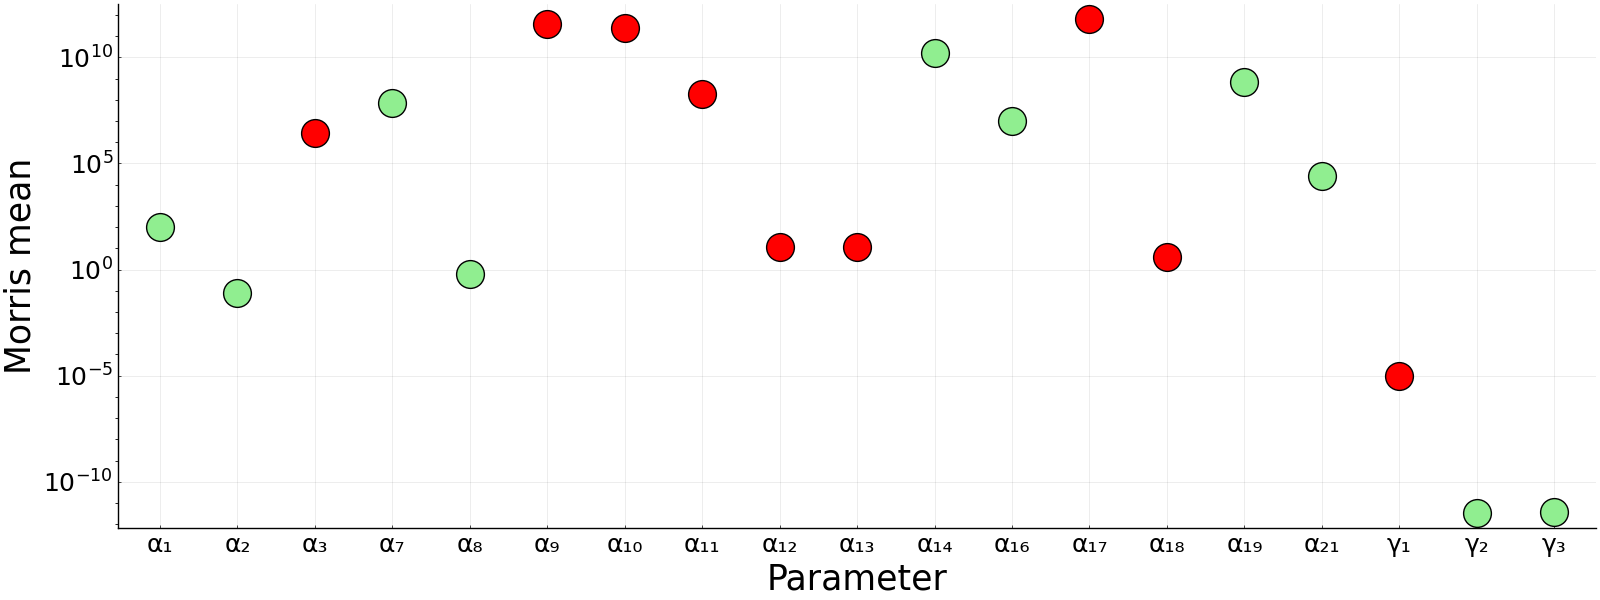

In [15]:
#plot results
plot_justmean = scatter(["α₁","α₂","α₃","α₇","α₈","α₉","α₁₀","α₁₁","α₁₂","α₁₃","α₁₄","α₁₆","α₁₇","α₁₈","α₁₉","α₂₁","γ₁","γ₂","γ₃"],means1,color=[:lightgreen, :lightgreen, :red, :lightgreen, :lightgreen, :red, :red, :red, :red, :red, :lightgreen, :lightgreen, :red, :red, :lightgreen, :lightgreen, :red, :lightgreen, :lightgreen],yscale=:log10,markersize=20,legend=false, title = "", xlabel = "Parameter", ylabel = "Morris mean") #mean of tumor population
plot(plot_justmean,size =(1600,600),xtickfont=font(18),ytickfont=font(18),guidefont=font(25),legendfont=font(25),titlefont=font(25), xticks = :all)

In [71]:
#plot results
vector_1 = ["α₁₇", "α₉", "α₁₀", "α₁₄", "α₁₉", "α₁₁", "α₇", "α₁₆", "α₃", "α₂₁", "α₁", "α₁₃", "α₁₂", "α₁₈", "α₈", "α₂", "γ₁", "γ₃", "γ₂"]
vector_2 = [6.60E+11,3.83E+11,2.51E+11,1.55E+10,6.60E+08,1.95E+08,6.98E+07,1.02E+07,2.78E+06,26002.62771,103.8344697,11.91689027,11.61676075,4.113746122,0.629535045,0.082723438,9.69E-06,3.86E-12,3.44E-12]

non_MDSC_size = 30
MDSC_size = 40

non_MDSC_alpha = 0.6
MDSC_alpha = 1

non_MDSC_strokewidth = 1
MDSC_strokewidth = 2

color_positive = [95,177,42]
color_negative = [226,58,52]

logocolors = Colors.JULIA_LOGO_COLORS

vector_size = [non_MDSC_size,non_MDSC_size,non_MDSC_size,MDSC_size,MDSC_size,non_MDSC_size,non_MDSC_size,non_MDSC_size,MDSC_size,non_MDSC_size,MDSC_size,non_MDSC_size,non_MDSC_size,non_MDSC_size,non_MDSC_size,MDSC_size,MDSC_size,non_MDSC_size,non_MDSC_size]
vector_alpha = [non_MDSC_alpha,non_MDSC_alpha,non_MDSC_alpha,MDSC_alpha,MDSC_alpha,non_MDSC_alpha,non_MDSC_alpha,non_MDSC_alpha,MDSC_alpha,non_MDSC_alpha,MDSC_alpha,non_MDSC_alpha,non_MDSC_alpha,non_MDSC_alpha,non_MDSC_alpha,MDSC_alpha,MDSC_alpha,non_MDSC_alpha,non_MDSC_alpha]
vector_color = [logocolors.red, logocolors.red, logocolors.red, logocolors.green, logocolors.green, logocolors.red, logocolors.green, logocolors.green, logocolors.red, logocolors.green, logocolors.green, logocolors.red, logocolors.red, logocolors.red, logocolors.green, logocolors.green, logocolors.red, logocolors.green, logocolors.green]
vector_strokewidth = [non_MDSC_strokewidth,non_MDSC_strokewidth,non_MDSC_strokewidth,MDSC_strokewidth,MDSC_strokewidth,non_MDSC_strokewidth,non_MDSC_strokewidth,non_MDSC_strokewidth,MDSC_strokewidth,non_MDSC_strokewidth,MDSC_strokewidth,non_MDSC_strokewidth,non_MDSC_strokewidth,non_MDSC_strokewidth,non_MDSC_strokewidth,MDSC_strokewidth,MDSC_strokewidth,non_MDSC_strokewidth,non_MDSC_strokewidth]
vector_shape = [:circle, :circle, :circle, :hexagon, :hexagon, :circle, :circle, :circle, :hexagon, :circle, :hexagon, :circle, :circle, :circle, :circle, :hexagon, :hexagon, :circle, :circle]

plot_justmean = scatter(vector_1,vector_2,color=vector_color,yscale=:log10,markersize=vector_size, alpha = vector_alpha, markerstrokewidth = vector_strokewidth, markershape = vector_shape, legend=false, title = "", xlabel = "Parameter", ylabel = "Mean", ylims = [10^(-12), 10^13])
plot(plot_justmean,size =(1600,600),font = "Ariel",xtickfont=font(25),ytickfont=font(25),guidefont=font(25),legendfont=font(25),titlefont=font(25),xticks = :all,plot_title="Morris global parameter sensitivity analysis",titlefontsize=25)

# Basic dynamics stochastic successful tumors

In [1]:
using DifferentialEquations
using Plots; pyplot()
using StochasticDelayDiffEq
using DiffEqCallbacks
using Statistics
import Random

In [2]:
#define model with delay
function dde_system(du,u,h,p,t)
    C,Mₘ,NK,T = u
    α₁,α₂,α₃,α₇,α₈,α₉,α₁₀,α₁₁,α₁₂,α₁₃,α₁₄,α₁₆,α₁₇,α₁₈,α₁₉,α₂₁ = p
    histC_MDSC = h(p, t-τ₁; idxs=1)
   
# Cancer cells (tumor)
    du[1] = dC = α₇*C*log(α₈/C) - α₉*C*NK - α₁₀*C*T - α₁₁*C
 # MDSC 
    du[2] = dMₘ = α₁ + α₂*histC_MDSC/(γ₁+(histC_MDSC^n)) - α₃*Mₘ 
 # NK cells
    du[3] = dNK = α₁₂ + α₁₃*(C^2)/(γ₂+(C^2)) - α₁₄*Mₘ*NK - α₁₆*NK 
 # T cells
    du[4] = dT = α₁₇*C*NK + α₁₈*(C^2)/(γ₃+(C^2)) - α₁₉*Mₘ*T - α₂₁*T
end

dde_system (generic function with 1 method)

In [3]:
#define model without delay
function ode_system(du,u,p,t)
    C,Mₘ,NK,T = u
    α₁,α₂,α₃,α₇,α₈,α₉,α₁₀,α₁₁,α₁₂,α₁₃,α₁₄,α₁₆,α₁₇,α₁₈,α₁₉,α₂₁ = p
   
# Cancer cells (tumor)
    du[1] = dC = α₇*C*log(α₈/C) - α₉*C*NK - α₁₀*C*T - α₁₁*C
 # MDSC 
    du[2] = dMₘ = α₁ + α₂*C/(γ₁+(C^n)) - α₃*Mₘ 
 # NK cells
    du[3] = dNK = α₁₂ + α₁₃*(C^2)/(γ₂+(C^2)) - α₁₄*Mₘ*NK - α₁₆*NK
 # T cells
    du[4] = dT = α₁₇*C*NK + α₁₈*(C^2)/(γ₃+(C^2)) - α₁₉*Mₘ*T - α₂₁*T
end

ode_system (generic function with 1 method)

In [4]:
#define initial number of tumor cells for delay model
h(p, t; idxs=nothing) = typeof(idxs) <: Number ? 2.0 : ones(4).+ 1
h(1,0)

4-element Vector{Float64}:
 2.0
 2.0
 2.0
 2.0

In [5]:
#set model parameters
n = 1.0

α₁ = 10.0*(10.0^1.0) #M-MDSCs production
α₂ = (10.0^8.0) #M-MDSCs expansion coefficient 
α₃ = 0.2 #M-MDSCs death rate

α₇ = 10.0^(-1.0) #tumor growth rate
α₈ = 10.0^7.0 #tumor maximum size
α₉ = 3.5*(10.0^(-6.0)) #tumor cells kill rate by NK cells
α₁₀ = 1.1*(10.0^(-7.0)) #tumor cells kill rate by T cells
α₁₁ = 0.0 #tumor cell death rate

α₁₂ = 1.4*(10.0^4.0) #NK cells production rate
α₁₃ = 2.5*(10.0^(-2.0)) #NK cells expansion coefficient
α₁₄ = 4*(10.0^(-5.0)) #NK cells inactivation rate by M-MDSCs
α₁₆ = 4.12*(10.0^(-2.0)) #NK cells death rate

α₁₇ = 1.1*(10.0^(-7.0)) #CTL stimulation as a result of tumor-NK cell interaction
α₁₈ = 10.0^(-1.0) #CTL expansion coefficient 
α₁₉ = (10.0^(-4.0)) #CTL inactivation rate by M-MDSCs
α₂₁ = 2.0*(10.0^(-2.0)) #CTL death rate

γ₁ = (10.0^(10.0)) #steepness coefficient of MDSC production curve
γ₂ = 2.02*(10.0^(7.0)) #steepness coefficient of NK production curve
γ₃ = 2.02*(10.0^(7.0)) #steepness coefficient of CTL production curve

p = (α₁,α₂,α₃,α₇,α₈,α₉,α₁₀,α₁₁,α₁₂,α₁₃,α₁₄,α₁₆,α₁₇,α₁₈,α₁₉,α₂₁)
tspan = (0.0,365.0)
u0 = [2.0;α₁/α₃;α₃*α₁₂/(α₁*α₁₄+α₃*α₁₆);0.0]

4-element Vector{Float64}:
      2.0
    500.0
 228758.1699346405
      0.0

In [6]:
#define stochastic noise
W = WienerProcess(0.0,0.0,0.0)

function σfunction(du,u,h,p,t)
  du[1] = u[1]
  du[2] = u[2]
  du[3] = u[3]
  du[4] = u[4]
end

function σfunction_nodelay(du,u,p,t)
  du[1] = u[1]
  du[2] = u[2]
  du[3] = u[3]
  du[4] = u[4]
end

σfunction_nodelay (generic function with 1 method)

In [7]:
#define conditions for simulation to end
function condition(u,t,integrator) 
  u[1] < 1.0
end

function floor_aff!(integrator)
    integrator.u[1]=1.0
end

function terminate_affect!(integrator)
    terminate!(integrator)
end

floor_event = DiscreteCallback(condition, terminate!)
floor_event2 = DiscreteCallback(condition, floor_aff!)

DiscreteCallback{typeof(condition), typeof(floor_aff!), typeof(DiffEqBase.INITIALIZE_DEFAULT), typeof(DiffEqBase.FINALIZE_DEFAULT)}(condition, floor_aff!, DiffEqBase.INITIALIZE_DEFAULT, DiffEqBase.FINALIZE_DEFAULT, Bool[1, 1])

## Panel a

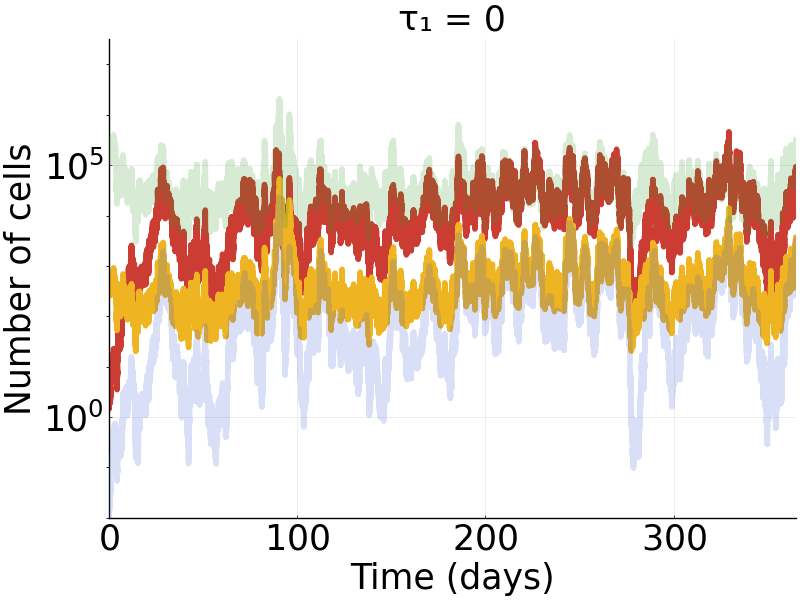

┌ Warning: Invalid negative or zero value 0.0 found at series index 1 for log10 based yscale
└ @ Plots /Users/jessekreger/.julia/packages/Plots/Xv2qA/src/utils.jl:95


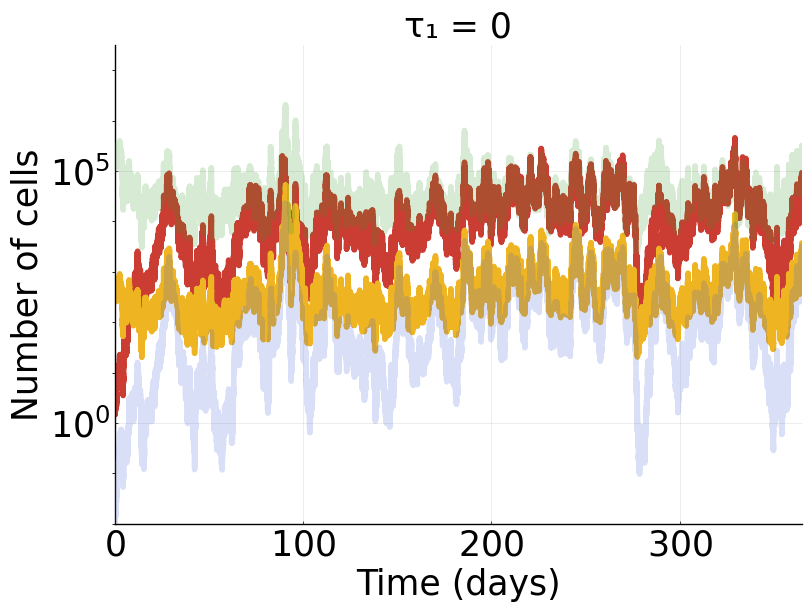

100.0
13917.114726692322

In [9]:
#solve with τ₁ = 0 (with set random seed for reproducibility)
runs = 1.0
tumorsuccess = 0.0
threshold = 1.0

Random.seed!(1236)

meanofsuccessfulltumors = 0.0;

logocolors = Colors.JULIA_LOGO_COLORS

prob_nodelay = SDEProblem(ode_system,σfunction_nodelay,u0,tspan,p,noise=W)
sol = solve(prob_nodelay,SOSRI(),callback=floor_event)

A = minimum(sol[1,:])    

if A ≥ threshold
    tumorsuccess = tumorsuccess + 1
    meanofsuccessfulltumors = meanofsuccessfulltumors + mean(sol[1,:])
    a = plot(sol, lw = 4, yaxis=:log, size =(800,600), font = "Ariel", ylims = (0.01,10^7.5), color = [logocolors.red "goldenrod2" logocolors.green logocolors.blue], alpha = [1 1 0.2 0.2], legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (days)",xguidefontsize=25,ylabel="Number of cells",yguidefontsize=25,title = "τ₁ = 0",titlefontsize=25) 

    display(a)
else
    for j in 1:length(sol[1,:])
        global BB = j
        if sol[1,j] < threshold
            break
        end
    end
    plot1 = plot(sol, lw = 4, yaxis=:log,size =(800,600), font = "Ariel", xlims = (0,sol.t[BB]), ylims = (0.01,10^7.5), color = [logocolors.red "goldenrod2" logocolors.green logocolors.blue], alpha = [1 1 0.2 0.2], legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (days)",xguidefontsize=25,ylabel="Number of cells",yguidefontsize=25,title = "τ₁ = 0",titlefontsize=25)
    display(plot1)
end
    
print(100*tumorsuccess/runs, "\n")

print(meanofsuccessfulltumors/tumorsuccess)

## Panel b

10.0


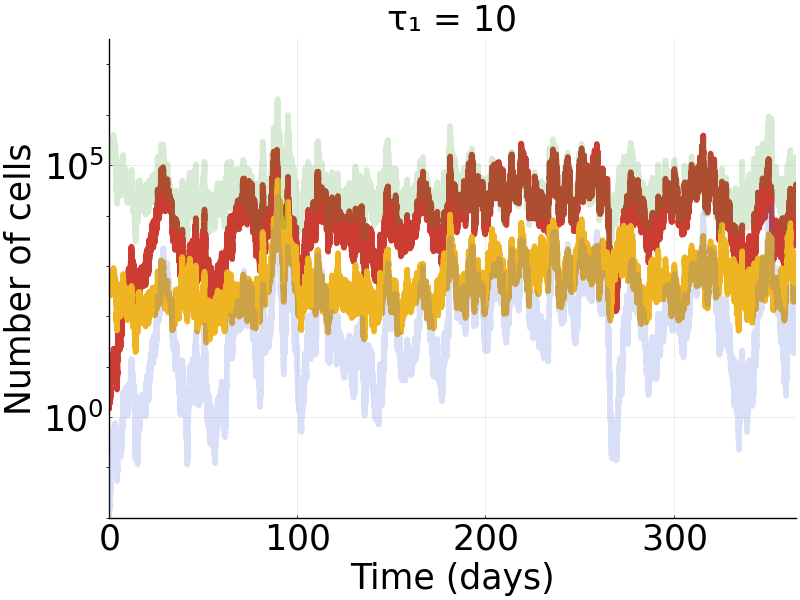

┌ Warning: Invalid negative or zero value 0.0 found at series index 1 for log10 based yscale
└ @ Plots /Users/jessekreger/.julia/packages/Plots/Xv2qA/src/utils.jl:95


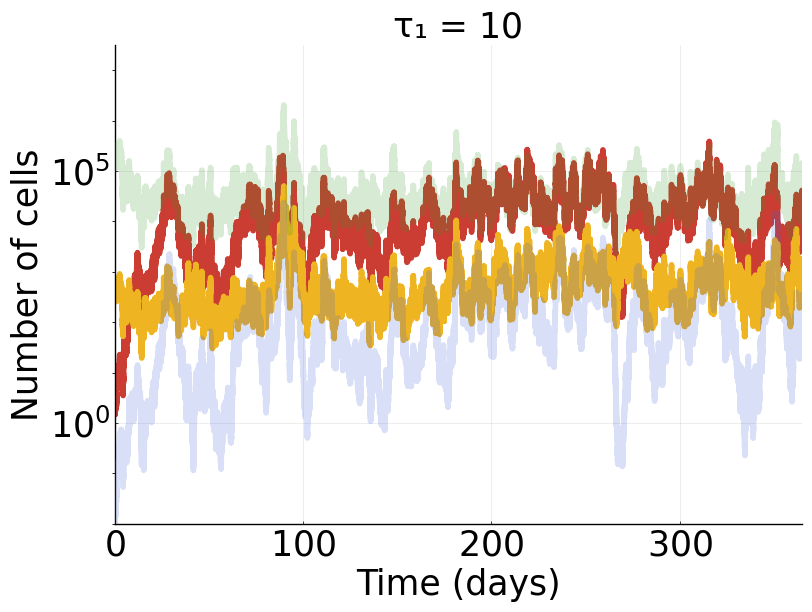

100.0
13841.3649855231

In [10]:
#solve with τ₁ = 10 (with set random seed for reproducibility)
τ₁ = 10.0
lags = [τ₁]

print(τ₁, "\n")

runs = 1.0
tumorsuccess = 0.0
threshold = 1.0

Random.seed!(1236)

meanofsuccessfulltumors = 0.0;

logocolors = Colors.JULIA_LOGO_COLORS
    
prob1 = SDDEProblem(dde_system,σfunction,u0,h,tspan,p; constant_lags=lags,noise=W)
sol = solve(prob1,SOSRI(),maxiters=10^8,callback=floor_event2)

A = minimum(sol[1,:])    

if A ≥ threshold
    tumorsuccess = tumorsuccess + 1
    meanofsuccessfulltumors = meanofsuccessfulltumors + mean(sol[1,:])
    b = plot(sol, lw = 4, yaxis=:log, size =(800,600), font = "Ariel", ylims = (0.01,10^7.5), color = [logocolors.red "goldenrod2" logocolors.green logocolors.blue], alpha = [1 1 0.2 0.2], legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (days)",xguidefontsize=25,ylabel="Number of cells",yguidefontsize=25,title = "τ₁ = 10",titlefontsize=25) 

    display(b)
else
    for j in 1:length(sol[1,:])
        global BB = j
        if sol[1,j] < threshold
            break
        end
    end
    plot1 = plot(sol, lw = 4, yaxis=:log,size =(800,600), font = "Ariel", xlims = (0,sol.t[BB]), ylims = (0.01,10^7.5), color = [logocolors.red "goldenrod2" logocolors.green logocolors.blue], alpha = [1 1 0.2 0.2], legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (days)",xguidefontsize=25,ylabel="Number of cells",yguidefontsize=25,title = "τ₁ = 10",titlefontsize=25)
    display(plot1)
end

print(100*tumorsuccess/runs, "\n")

print(meanofsuccessfulltumors/tumorsuccess)

## Panel c

50.0


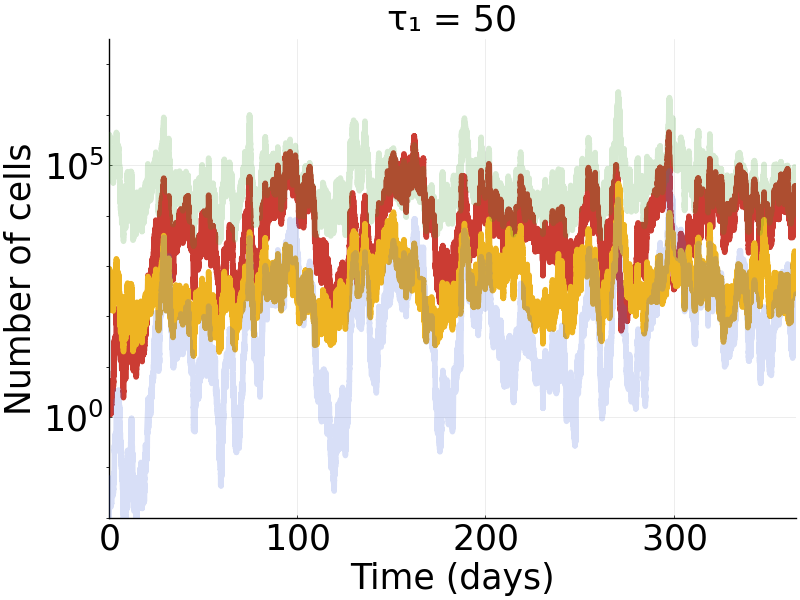

┌ Warning: Invalid negative or zero value 0.0 found at series index 1 for log10 based yscale
└ @ Plots /Users/jessekreger/.julia/packages/Plots/Xv2qA/src/utils.jl:95


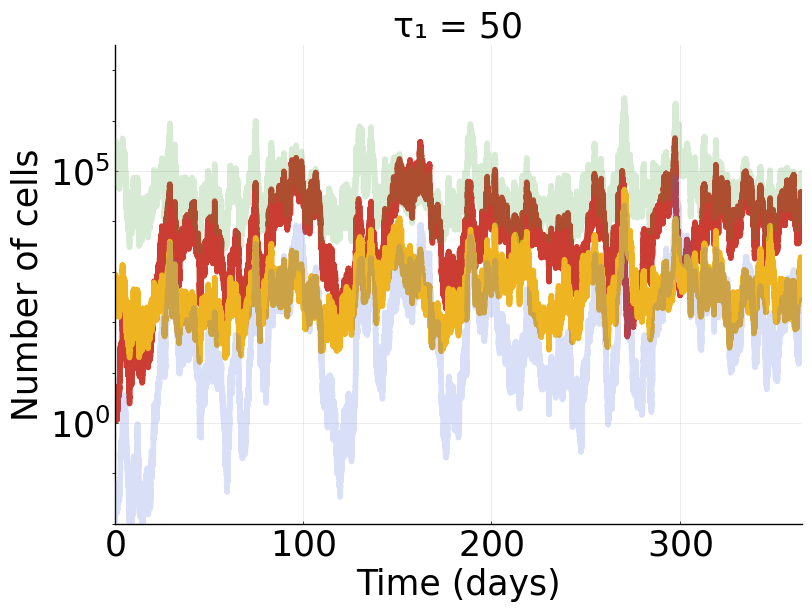

100.0
10707.268745950272

In [11]:
#solve with τ₁ = 50 (with set random seed for reproducibility)
τ₁ = 50.0
lags = [τ₁]

print(τ₁, "\n")

runs = 1.0
tumorsuccess = 0.0
threshold = 1.0

Random.seed!(1238)

meanofsuccessfulltumors = 0.0;

logocolors = Colors.JULIA_LOGO_COLORS

prob1 = SDDEProblem(dde_system,σfunction,u0,h,tspan,p; constant_lags=lags,noise=W)
sol = solve(prob1,SOSRI(),maxiters=10^8,callback=floor_event2)

A = minimum(sol[1,:])    

if A ≥ threshold
    tumorsuccess = tumorsuccess + 1
    meanofsuccessfulltumors = meanofsuccessfulltumors + mean(sol[1,:])
    c = plot(sol, lw = 4, yaxis=:log, size =(800,600), font = "Ariel", ylims = (0.01,10^7.5), color = [logocolors.red "goldenrod2" logocolors.green logocolors.blue], alpha = [1 1 0.2 0.2], legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (days)",xguidefontsize=25,ylabel="Number of cells",yguidefontsize=25,title = "τ₁ = 50",titlefontsize=25) 

    display(c)
else
    for j in 1:length(sol[1,:])
        global BB = j
        if sol[1,j] < threshold
            break
        end
    end
    plot1 = plot(sol, lw = 4, yaxis=:log,size =(800,600), font = "Ariel", xlims = (0,sol.t[BB]), ylims = (0.01,10^7.5), color = [logocolors.red "goldenrod2" logocolors.green logocolors.blue], alpha = [1 1 0.2 0.2], legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (days)",xguidefontsize=25,ylabel="Number of cells",yguidefontsize=25,title = "τ₁ = 50",titlefontsize=25)
    display(plot1)
end

print(100*tumorsuccess/runs, "\n")

print(meanofsuccessfulltumors/tumorsuccess)

## Panel d

365.0


┌ Warning: Invalid negative or zero value 0.0 found at series index 1 for log10 based yscale
└ @ Plots /Users/jessekreger/.julia/packages/Plots/Xv2qA/src/utils.jl:95


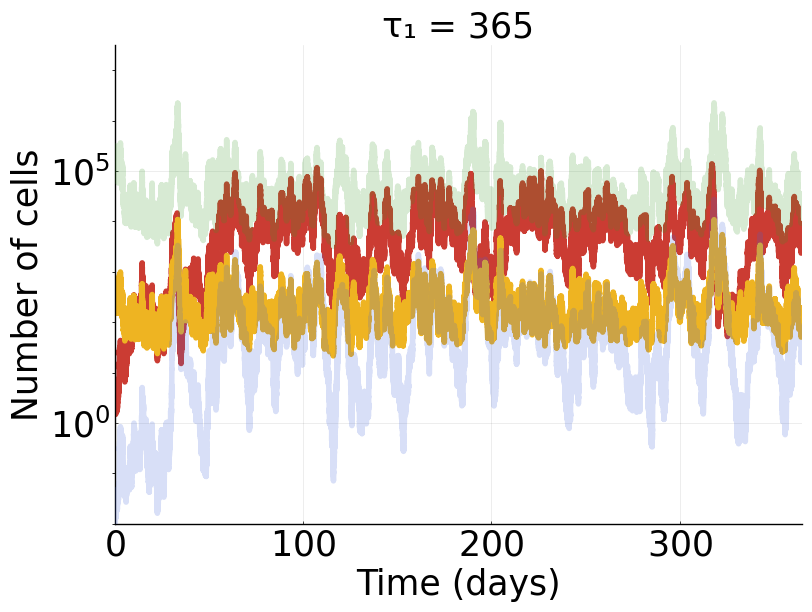

100.0
7103.147271711539

In [12]:
#solve with τ₁ = 365 (with set random seed for reproducibility)
τ₁ = 365.0
lags = [τ₁]

print(τ₁, "\n")

runs = 1.0
tumorsuccess = 0.0
threshold = 1.0

Random.seed!(1244)

meanofsuccessfulltumors = 0.0;

logocolors = Colors.JULIA_LOGO_COLORS
 
prob1 = SDDEProblem(dde_system,σfunction,u0,h,tspan,p; constant_lags=lags,noise=W)
sol = solve(prob1,SOSRI(),maxiters=10^8,callback=floor_event2)

A = minimum(sol[1,:])    

if A ≥ threshold
    tumorsuccess = tumorsuccess + 1
    meanofsuccessfulltumors = meanofsuccessfulltumors + mean(sol[1,:])
    d = plot(sol, lw = 4, yaxis=:log, size =(800,600), font = "Ariel", ylims = (0.01,10^7.5), color = [logocolors.red "goldenrod2" logocolors.green logocolors.blue], alpha = [1 1 0.2 0.2], legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (days)",xguidefontsize=25,ylabel="Number of cells",yguidefontsize=25,title = "τ₁ = 365",titlefontsize=25) 

    display(d)
else
    for j in 1:length(sol[1,:])
        global BB = j
        if sol[1,j] < threshold
            break
        end
    end
    plot1 = plot(sol, lw = 4, yaxis=:log,size =(800,600), font = "Ariel", xlims = (0,sol.t[BB]), ylims = (0.01,10^7.5), color = [logocolors.red "goldenrod2" logocolors.green logocolors.blue], alpha = [1 1 0.2 0.2], legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (days)",xguidefontsize=25,ylabel="Number of cells",yguidefontsize=25,title = "τ₁ = 365",titlefontsize=25)
    display(plot1)
end


print(100*tumorsuccess/runs, "\n")

print(meanofsuccessfulltumors/tumorsuccess)

┌ Warning: Invalid negative or zero value 0.0 found at series index 1 for log10 based yscale
└ @ Plots /Users/jessekreger/.julia/packages/Plots/Xv2qA/src/utils.jl:95
┌ Warning: Invalid negative or zero value 0.0 found at series index 1 for log10 based yscale
└ @ Plots /Users/jessekreger/.julia/packages/Plots/Xv2qA/src/utils.jl:95
┌ Warning: Invalid negative or zero value 0.0 found at series index 1 for log10 based yscale
└ @ Plots /Users/jessekreger/.julia/packages/Plots/Xv2qA/src/utils.jl:95
┌ Warning: Invalid negative or zero value 0.0 found at series index 1 for log10 based yscale
└ @ Plots /Users/jessekreger/.julia/packages/Plots/Xv2qA/src/utils.jl:95


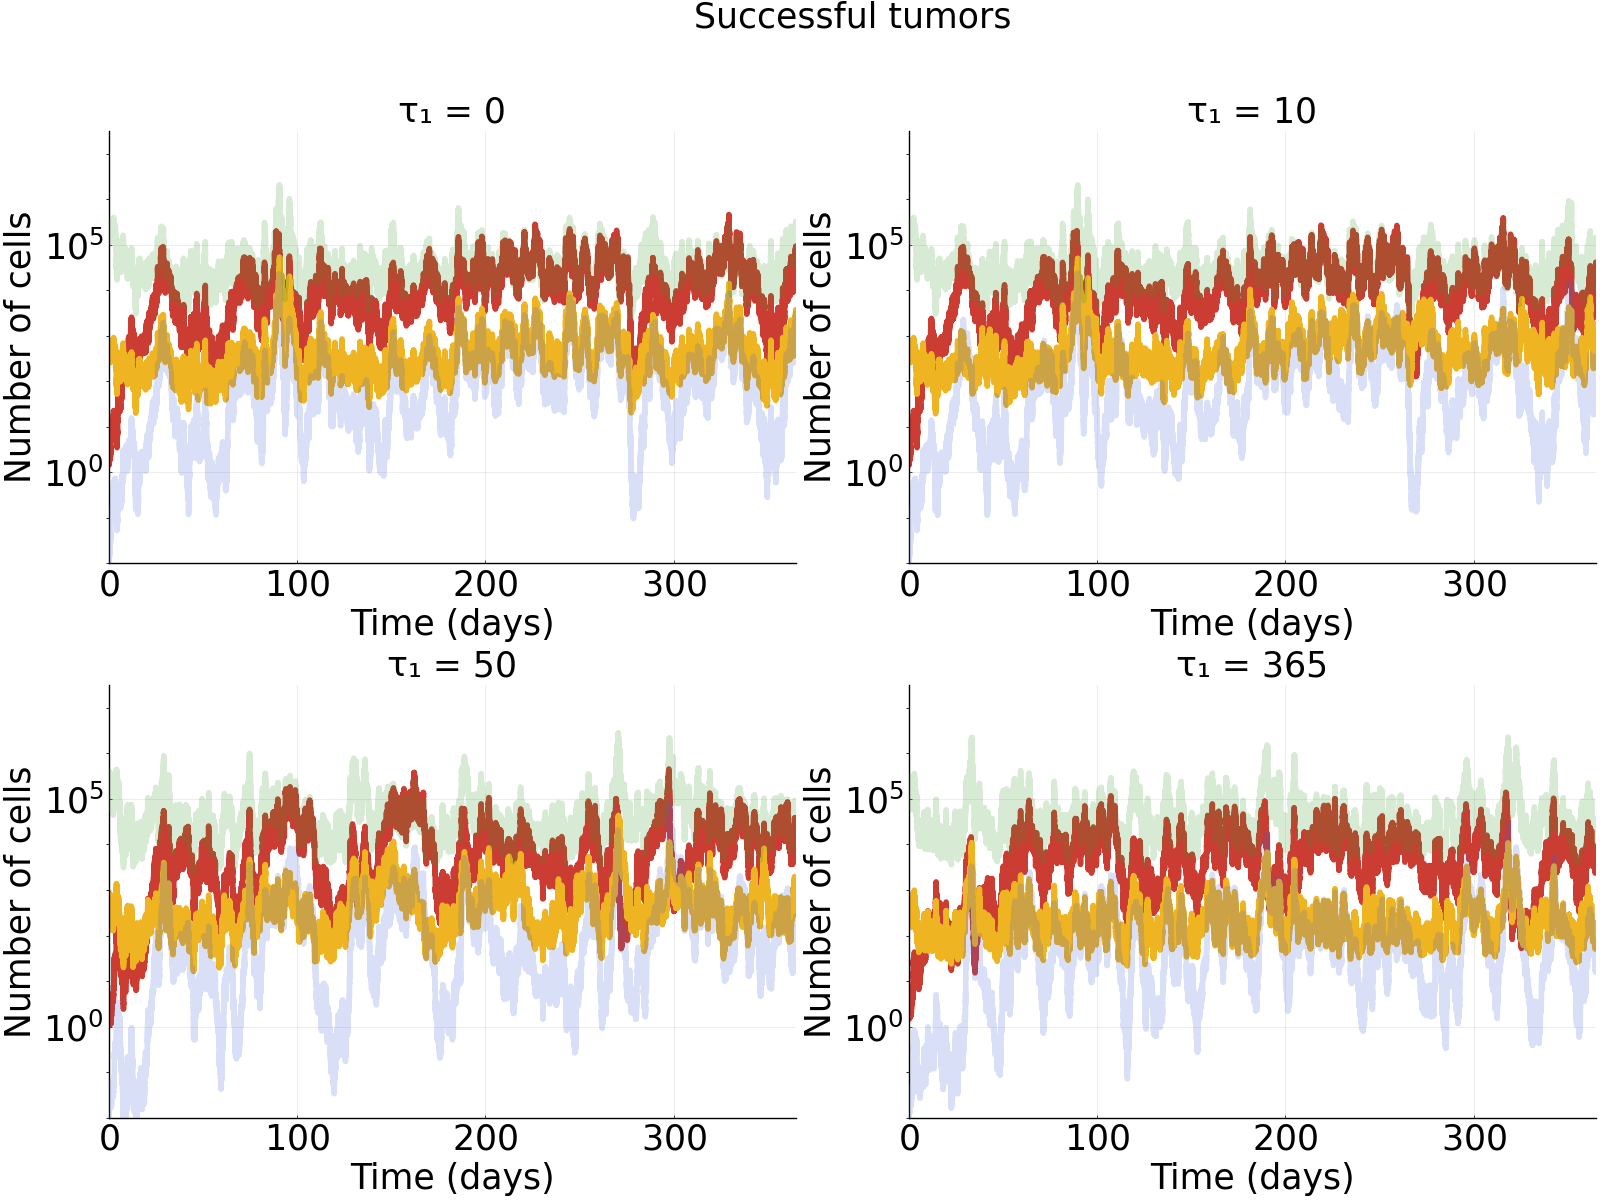

In [13]:
#plot results
l = @layout [a b; c d]
logocolors = Colors.JULIA_LOGO_COLORS
plot(a, b, c, d, layout = l,size =(1600,1200),xtickfont=font(25),ytickfont=font(25),guidefont=font(25),legendfont=font(25),plot_title="Successful tumors", font = "Ariel",titlefontsize=25)

# Basic dynamics stochastic unsuccessful tumors

In [1]:
using DifferentialEquations
using Plots; pyplot()
using StochasticDelayDiffEq
using DiffEqCallbacks
using Statistics 
import Random

In [2]:
#define model with delay
function dde_system(du,u,h,p,t)
    C,Mₘ,NK,T = u
    α₁,α₂,α₃,α₇,α₈,α₉,α₁₀,α₁₁,α₁₂,α₁₃,α₁₄,α₁₆,α₁₇,α₁₈,α₁₉,α₂₁ = p
    histC_MDSC = h(p, t-τ₁; idxs=1)
   
# Cancer cells (tumor)
    du[1] = dC = α₇*C*log(α₈/C) - α₉*C*NK - α₁₀*C*T - α₁₁*C
 # MDSC 
    du[2] = dMₘ = α₁ + α₂*histC_MDSC/(γ₁+(histC_MDSC^n)) - α₃*Mₘ 
 # NK cells
    du[3] = dNK = α₁₂ + α₁₃*(C^2)/(γ₂+(C^2)) - α₁₄*Mₘ*NK - α₁₆*NK 
 # T cells
    du[4] = dT = α₁₇*C*NK + α₁₈*(C^2)/(γ₃+(C^2)) - α₁₉*Mₘ*T - α₂₁*T
end

dde_system (generic function with 1 method)

In [3]:
#define model without delay
function ode_system(du,u,p,t)
    C,Mₘ,NK,T = u
    α₁,α₂,α₃,α₇,α₈,α₉,α₁₀,α₁₁,α₁₂,α₁₃,α₁₄,α₁₆,α₁₇,α₁₈,α₁₉,α₂₁ = p
   
# Cancer cells (tumor)
    du[1] = dC = α₇*C*log(α₈/C) - α₉*C*NK - α₁₀*C*T - α₁₁*C
 # MDSC 
    du[2] = dMₘ = α₁ + α₂*C/(γ₁+(C^n)) - α₃*Mₘ 
 # NK cells
    du[3] = dNK = α₁₂ + α₁₃*(C^2)/(γ₂+(C^2)) - α₁₄*Mₘ*NK - α₁₆*NK
 # T cells
    du[4] = dT = α₁₇*C*NK + α₁₈*(C^2)/(γ₃+(C^2)) - α₁₉*Mₘ*T - α₂₁*T 
end

ode_system (generic function with 1 method)

In [4]:
#define initial number of tumor cells for delay model
h(p, t; idxs=nothing) = typeof(idxs) <: Number ? 2.0 : ones(4).+ 1
h(1,0)

4-element Vector{Float64}:
 2.0
 2.0
 2.0
 2.0

In [5]:
#set model parameters
n = 1.0

α₁ = 10.0*(10.0^1.0) #M-MDSCs production
α₂ = (10.0^8.0) #M-MDSCs expansion coefficient 
α₃ = 0.2 #M-MDSCs death rate

α₇ = 10.0^(-1.0) #tumor growth rate
α₈ = 10.0^7.0 #tumor maximum size
α₉ = 3.5*(10.0^(-6.0)) #tumor cells kill rate by NK cells
α₁₀ = 1.1*(10.0^(-7.0)) #tumor cells kill rate by T cells
α₁₁ = 0.0 #tumor cell death rate

α₁₂ = 1.4*(10.0^4.0) #NK cells production rate
α₁₃ = 2.5*(10.0^(-2.0)) #NK cells expansion coefficient
α₁₄ = 4*(10.0^(-5.0)) #NK cells inactivation rate by M-MDSCs
α₁₆ = 4.12*(10.0^(-2.0)) #NK cells death rate

α₁₇ = 1.1*(10.0^(-7.0)) #CTL stimulation as a result of tumor-NK cell interaction
α₁₈ = 10.0^(-1.0) #CTL expansion coefficient 
α₁₉ = (10.0^(-4.0)) #CTL inactivation rate by M-MDSCs
α₂₁ = 2.0*(10.0^(-2.0)) #CTL death rate

γ₁ = (10.0^(10.0)) #steepness coefficient of MDSC production curve
γ₂ = 2.02*(10.0^(7.0)) #steepness coefficient of NK production curve
γ₃ = 2.02*(10.0^(7.0)) #steepness coefficient of CTL production curve

p = (α₁,α₂,α₃,α₇,α₈,α₉,α₁₀,α₁₁,α₁₂,α₁₃,α₁₄,α₁₆,α₁₇,α₁₈,α₁₉,α₂₁)
tspan = (0.0,365.0)
u0 = [2.0;α₁/α₃;α₃*α₁₂/(α₁*α₁₄+α₃*α₁₆);0.0]

4-element Vector{Float64}:
      2.0
    500.0
 228758.1699346405
      0.0

In [6]:
#define stochastic noise
W = WienerProcess(0.0,0.0,0.0)

function σfunction(du,u,h,p,t)
  du[1] = u[1]
  du[2] = u[2]
  du[3] = u[3]
  du[4] = u[4]
end

function σfunction_nodelay(du,u,p,t)
  du[1] = u[1]
  du[2] = u[2]
  du[3] = u[3]
  du[4] = u[4]
end

σfunction_nodelay (generic function with 1 method)

In [28]:
#define conditions for simulation to end
function condition(u,t,integrator) 
  u[1] < 1.0
end

function floor_aff!(integrator)
    integrator.u[1]=1.0
end

function terminate_affect!(integrator)
    terminate!(integrator)
end

floor_event = DiscreteCallback(condition, terminate!)
floor_event2 = DiscreteCallback(condition, floor_aff!)

DiscreteCallback{typeof(condition), typeof(floor_aff!), typeof(DiffEqBase.INITIALIZE_DEFAULT), typeof(DiffEqBase.FINALIZE_DEFAULT)}(condition, floor_aff!, DiffEqBase.INITIALIZE_DEFAULT, DiffEqBase.FINALIZE_DEFAULT, Bool[1, 1])

## Panel a

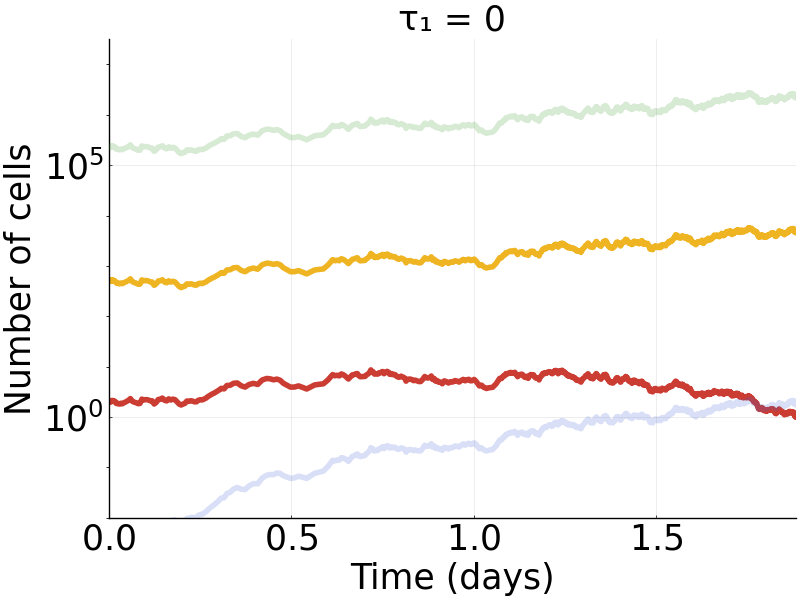

┌ Warning: Invalid negative or zero value 0.0 found at series index 1 for log10 based yscale
└ @ Plots /Users/jessekreger/.julia/packages/Plots/Xv2qA/src/utils.jl:95
┌ Warning: Invalid negative or zero value 0.0 found at series index 1 for log10 based yscale
└ @ Plots /Users/jessekreger/.julia/packages/Plots/Xv2qA/src/utils.jl:95


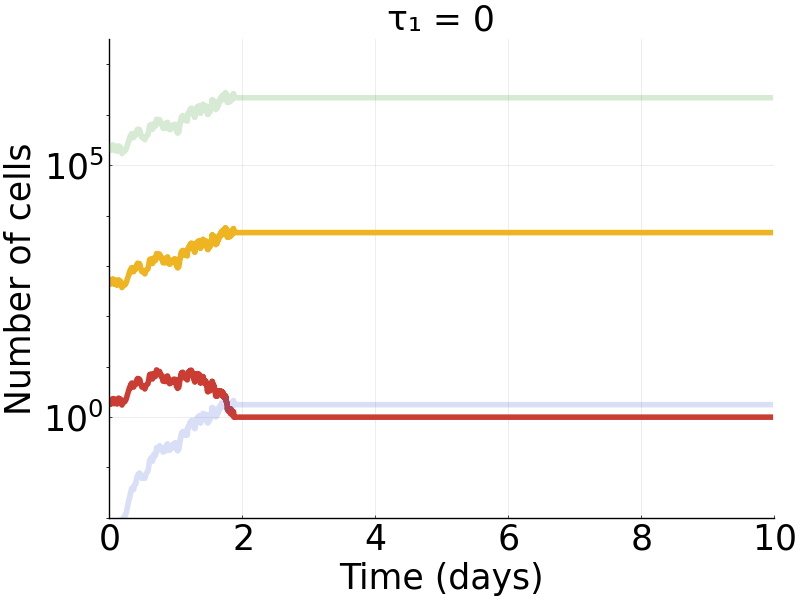

0.0
NaN

In [29]:
#solve with τ₁ = 0 (with set random seed for reproducibility)
runs = 1.0
tumorsuccess = 0.0
threshold = 1.0

Random.seed!(1234)

meanofsuccessfulltumors = 0.0;

logocolors = Colors.JULIA_LOGO_COLORS

prob_nodelay = SDEProblem(ode_system,σfunction_nodelay,u0,tspan,p,noise=W)
sol = solve(prob_nodelay,SOSRI(),callback=floor_event)

A = minimum(sol[1,:])    

if A ≥ threshold
    tumorsuccess = tumorsuccess + 1
    meanofsuccessfulltumors = meanofsuccessfulltumors + mean(sol[1,:])
    plot1 = plot(sol, lw = 4, yaxis=:log, size =(800,600), font = "Ariel", ylims = (0.01,10^7.5), color = [logocolors.red "goldenrod2" logocolors.green logocolors.blue], alpha = [1 1 0.2 0.2], legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (days)",xguidefontsize=25,ylabel="Number of cells",yguidefontsize=25,title = "τ₁ = 0",titlefontsize=25) 

    display(plot1)
else
    for j in 1:length(sol[1,:])
        global BB = j
        if sol[1,j] < threshold
            break
        end
    end

    for i in sol.t[BB]:0.1:10.0
        push!(sol.t,i)
        push!(sol,sol[:,BB])
    end

    a = plot(sol, lw = 4, yaxis=:log,size =(800,600), font = "Ariel", xlims = (0,sol.t[BB]), ylims = (0.01,10^7.5), color = [logocolors.red "goldenrod2" logocolors.green logocolors.blue], alpha = [1 1 0.2 0.2], legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (days)",xguidefontsize=25,ylabel="Number of cells",yguidefontsize=25,title = "τ₁ = 0",titlefontsize=25)
    a_extended = plot(sol, lw = 4, yaxis=:log,size =(800,600), font = "Ariel", xlims = (0,10.0), ylims = (0.01,10^7.5), color = [logocolors.red "goldenrod2" logocolors.green logocolors.blue], alpha = [1 1 0.2 0.2], legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (days)",xguidefontsize=25,ylabel="Number of cells",yguidefontsize=25,title = "τ₁ = 0",titlefontsize=25)
    display(a)
    display(a_extended)
end
    
print(100*tumorsuccess/runs, "\n")

print(meanofsuccessfulltumors/tumorsuccess)

## Panel b

10.0


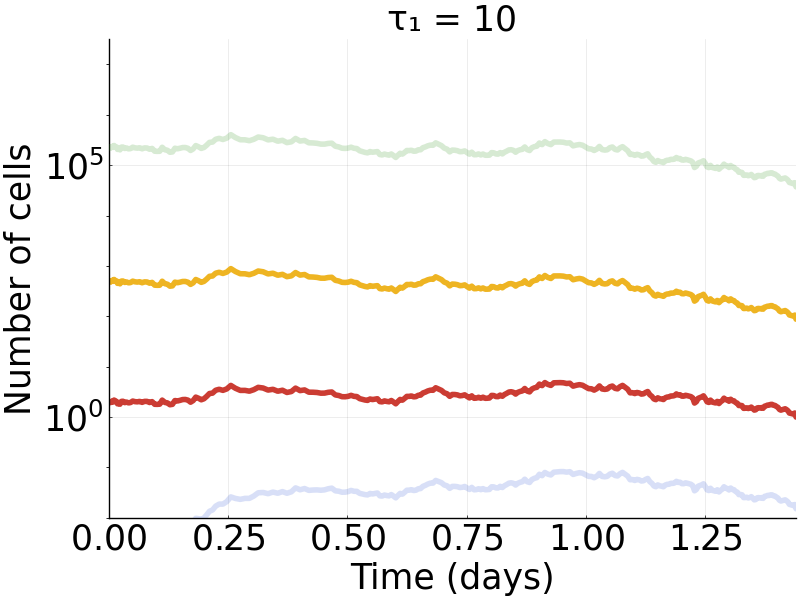

┌ Warning: Invalid negative or zero value 0.0 found at series index 1 for log10 based yscale
└ @ Plots /Users/jessekreger/.julia/packages/Plots/Xv2qA/src/utils.jl:95
┌ Warning: Invalid negative or zero value 0.0 found at series index 1 for log10 based yscale
└ @ Plots /Users/jessekreger/.julia/packages/Plots/Xv2qA/src/utils.jl:95


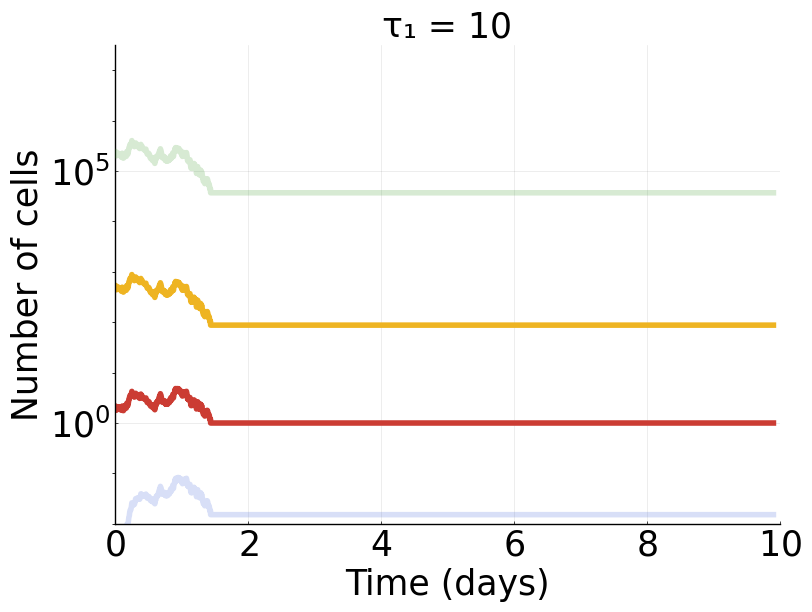

0.0
NaN

In [37]:
#solve with τ₁ = 10 (with set random seed for reproducibility)
τ₁ = 10.0
lags = [τ₁]

print(τ₁, "\n")

runs = 1.0
tumorsuccess = 0.0
threshold = 1.0

Random.seed!(1230)

meanofsuccessfulltumors = 0.0;

logocolors = Colors.JULIA_LOGO_COLORS

prob1 = SDDEProblem(dde_system,σfunction,u0,h,tspan,p; constant_lags=lags,noise=W)
sol = solve(prob1,SOSRI(),maxiters=10^8,callback=floor_event2)

A = minimum(sol[1,:])    

if A ≥ threshold
    tumorsuccess = tumorsuccess + 1
    meanofsuccessfulltumors = meanofsuccessfulltumors + mean(sol[1,:])
    plot1 = plot(sol, lw = 4, yaxis=:log, size =(800,600), font = "Ariel", ylims = (0.01,10^7.5), color = [logocolors.red "goldenrod2" logocolors.green logocolors.blue], alpha = [1 1 0.2 0.2], legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (days)",xguidefontsize=25,ylabel="Number of cells",yguidefontsize=25,title = "τ₁ = 10",titlefontsize=25) 

    display(plot1)
else
    for j in 1:length(sol[1,:])
        global BB = j
        if sol[1,j] < threshold
            break
        end
    end

    time_vector = sol.t[1:BB]   
    sol1 = sol[:,1:BB]
    for i in sol.t[BB]:0.1:10.0
        push!(time_vector,i)
        sol1 = [sol1 sol[:,BB]]
    end

    b = plot(sol, lw = 4, yaxis=:log,size =(800,600), font = "Ariel", xlims = (0,sol.t[BB]), ylims = (0.01,10^7.5), color = [logocolors.red "goldenrod2" logocolors.green logocolors.blue], alpha = [1 1 0.2 0.2], legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (days)",xguidefontsize=25,ylabel="Number of cells",yguidefontsize=25,title = "τ₁ = 10",titlefontsize=25)
    b_extended = plot(time_vector, transpose(sol1), lw = 4, yaxis=:log,size =(800,600), font = "Ariel", xlims = (0,10.0), ylims = (0.01,10^7.5), color = [logocolors.red "goldenrod2" logocolors.green logocolors.blue], alpha = [1 1 0.2 0.2], legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (days)",xguidefontsize=25,ylabel="Number of cells",yguidefontsize=25,title = "τ₁ = 10",titlefontsize=25)

    display(b)
    display(b_extended)
end

print(100*tumorsuccess/runs, "\n")

print(meanofsuccessfulltumors/tumorsuccess)

## Panel c

50.0


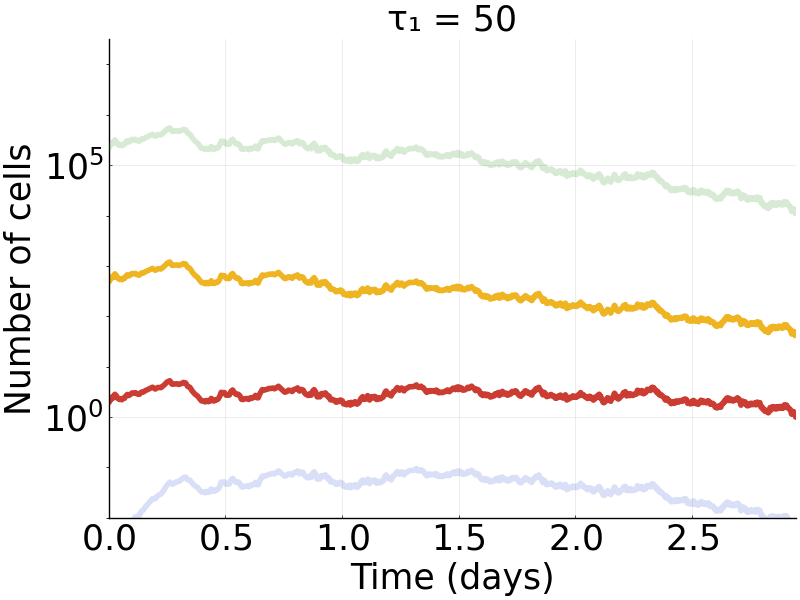

┌ Warning: Invalid negative or zero value 0.0 found at series index 1 for log10 based yscale
└ @ Plots /Users/jessekreger/.julia/packages/Plots/Xv2qA/src/utils.jl:95
┌ Warning: Invalid negative or zero value 0.0 found at series index 1 for log10 based yscale
└ @ Plots /Users/jessekreger/.julia/packages/Plots/Xv2qA/src/utils.jl:95


0.0
NaN

In [38]:
#solve with τ₁ = 50 (with set random seed for reproducibility)
τ₁ = 50.0
lags = [τ₁]

print(τ₁, "\n")

runs = 1.0
tumorsuccess = 0.0
threshold = 1.0

Random.seed!(1269)

meanofsuccessfulltumors = 0.0;

logocolors = Colors.JULIA_LOGO_COLORS
  
prob1 = SDDEProblem(dde_system,σfunction,u0,h,tspan,p; constant_lags=lags,noise=W)
sol = solve(prob1,SOSRI(),maxiters=10^8,callback=floor_event2)

A = minimum(sol[1,:])    

if A ≥ threshold
    tumorsuccess = tumorsuccess + 1
    meanofsuccessfulltumors = meanofsuccessfulltumors + mean(sol[1,:])
    plot1 = plot(sol, lw = 4, yaxis=:log, size =(800,600), font = "Ariel", ylims = (0.01,10^7.5), color = [logocolors.red "goldenrod2" logocolors.green logocolors.blue], alpha = [1 1 0.2 0.2], legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (days)",xguidefontsize=25,ylabel="Number of cells",yguidefontsize=25,title = "τ₁ = 50",titlefontsize=25) 

    display(plot1)
else
    for j in 1:length(sol[1,:])
        global BB = j
        if sol[1,j] < threshold
            break
        end
    end

    time_vector = sol.t[1:BB]   
    sol1 = sol[:,1:BB]
    for i in sol.t[BB]:0.1:10.0
        push!(time_vector,i)
        sol1 = [sol1 sol[:,BB]]
    end

    c = plot(sol, lw = 4, yaxis=:log,size =(800,600), font = "Ariel", xlims = (0,sol.t[BB]), ylims = (0.01,10^7.5), color = [logocolors.red "goldenrod2" logocolors.green logocolors.blue], alpha = [1 1 0.2 0.2], legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (days)",xguidefontsize=25,ylabel="Number of cells",yguidefontsize=25,title = "τ₁ = 50",titlefontsize=25)
    c_extended = plot(time_vector, transpose(sol1), lw = 4, yaxis=:log,size =(800,600), font = "Ariel", xlims = (0,10.0), ylims = (0.01,10^7.5), color = [logocolors.red "goldenrod2" logocolors.green logocolors.blue], alpha = [1 1 0.2 0.2], legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (days)",xguidefontsize=25,ylabel="Number of cells",yguidefontsize=25,title = "τ₁ = 50",titlefontsize=25)

    display(c)
    display(c_extended)
end

print(100*tumorsuccess/runs, "\n")

print(meanofsuccessfulltumors/tumorsuccess)

## Panel d

365.0


┌ Warning: Invalid negative or zero value 0.0 found at series index 1 for log10 based yscale
└ @ Plots /Users/jessekreger/.julia/packages/Plots/Xv2qA/src/utils.jl:95
┌ Warning: Invalid negative or zero value 0.0 found at series index 1 for log10 based yscale
└ @ Plots /Users/jessekreger/.julia/packages/Plots/Xv2qA/src/utils.jl:95


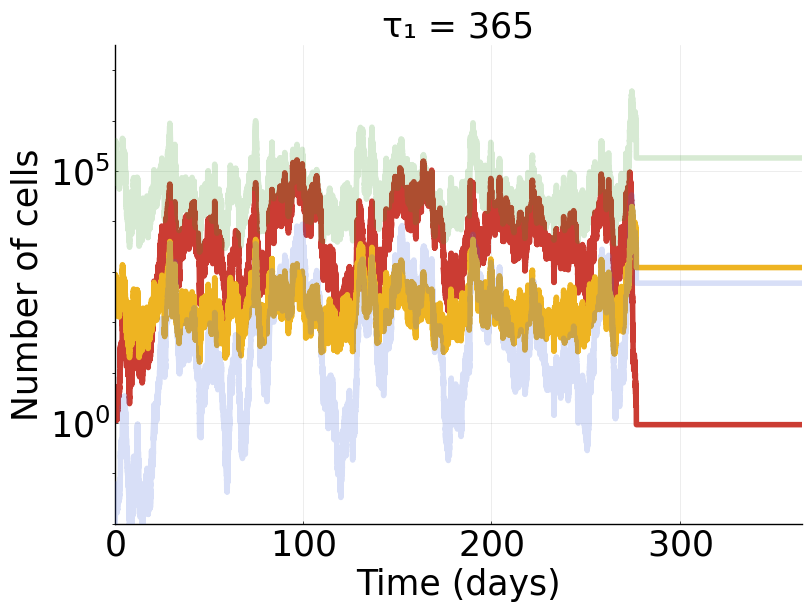

0.0
NaN

In [42]:
#solve with τ₁ = 365 (with set random seed for reproducibility)
τ₁ = 365.0
lags = [τ₁]

print(τ₁, "\n")

runs = 1.0
tumorsuccess = 0.0
threshold = 1.0

Random.seed!(1238)

meanofsuccessfulltumors = 0.0;

logocolors = Colors.JULIA_LOGO_COLORS

prob1 = SDDEProblem(dde_system,σfunction,u0,h,tspan,p; constant_lags=lags,noise=W)
sol = solve(prob1,SOSRI(),maxiters=10^8,callback=floor_event2)

A = minimum(sol[1,:])    

if A ≥ threshold
    tumorsuccess = tumorsuccess + 1
    meanofsuccessfulltumors = meanofsuccessfulltumors + mean(sol[1,:])
    plot1 = plot(sol, lw = 4, yaxis=:log, size =(800,600), font = "Ariel", ylims = (0.01,10^7.5), color = [logocolors.red "goldenrod2" logocolors.green logocolors.blue], alpha = [1 1 0.2 0.2], legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (days)",xguidefontsize=25,ylabel="Number of cells",yguidefontsize=25,title = "τ₁ = 365",titlefontsize=25) 

    display(plot1)
else
    for j in 1:length(sol[1,:])
        global BB = j
        if sol[1,j] < threshold
            break
        end
    end

     time_vector = sol.t[1:BB]   
    sol1 = sol[:,1:BB]
    for i in sol.t[BB]:0.1:365.0
        push!(time_vector,i)
        sol1 = [sol1 sol[:,BB]]
    end

    d = plot(sol, lw = 4, yaxis=:log,size =(800,600), font = "Ariel", xlims = (0,sol.t[BB]), ylims = (0.01,10^7.5), color = [logocolors.red "goldenrod2" logocolors.green logocolors.blue], alpha = [1 1 0.2 0.2], legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (days)",xguidefontsize=25,ylabel="Number of cells",yguidefontsize=25,title = "τ₁ = 365",titlefontsize=25)
    d_extended = plot(time_vector, transpose(sol1), lw = 4, yaxis=:log,size =(800,600), font = "Ariel", xlims = (0,365.0), ylims = (0.01,10^7.5), color = [logocolors.red "goldenrod2" logocolors.green logocolors.blue], alpha = [1 1 0.2 0.2], legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (days)",xguidefontsize=25,ylabel="Number of cells",yguidefontsize=25,title = "τ₁ = 365",titlefontsize=25)

    display(d)
    display(d_extended)
end

print(100*tumorsuccess/runs, "\n")

print(meanofsuccessfulltumors/tumorsuccess)

┌ Warning: Invalid negative or zero value 0.0 found at series index 1 for log10 based yscale
└ @ Plots /Users/jessekreger/.julia/packages/Plots/Xv2qA/src/utils.jl:95
┌ Warning: Invalid negative or zero value 0.0 found at series index 1 for log10 based yscale
└ @ Plots /Users/jessekreger/.julia/packages/Plots/Xv2qA/src/utils.jl:95
┌ Warning: Invalid negative or zero value 0.0 found at series index 1 for log10 based yscale
└ @ Plots /Users/jessekreger/.julia/packages/Plots/Xv2qA/src/utils.jl:95
┌ Warning: Invalid negative or zero value 0.0 found at series index 1 for log10 based yscale
└ @ Plots /Users/jessekreger/.julia/packages/Plots/Xv2qA/src/utils.jl:95


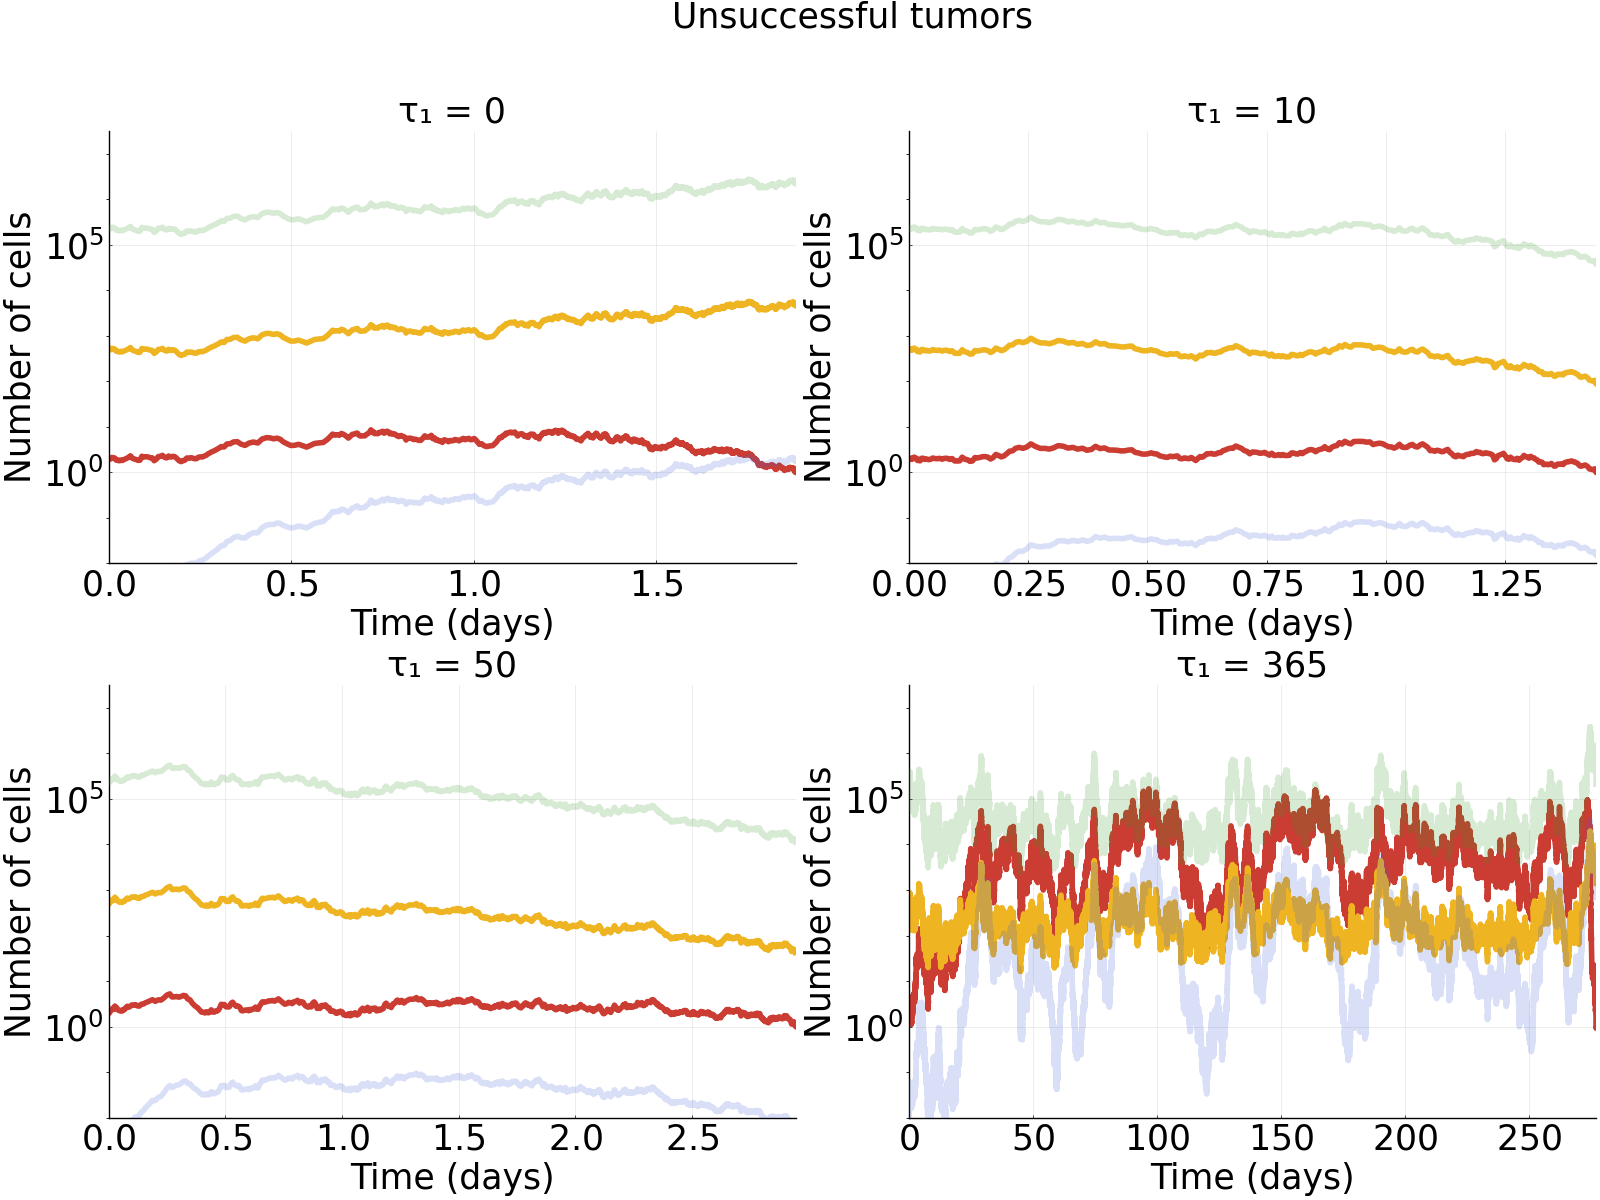

In [43]:
#plot results
l = @layout [a b; c d]
logocolors = Colors.JULIA_LOGO_COLORS
plot(a, b, c, d, layout = l,size =(1600,1200),xtickfont=font(25),ytickfont=font(25),guidefont=font(25),legendfont=font(25),plot_title="Unsuccessful tumors", font = "Ariel",titlefontsize=25)

┌ Warning: Invalid negative or zero value 0.0 found at series index 1 for log10 based yscale
└ @ Plots /Users/jessekreger/.julia/packages/Plots/Xv2qA/src/utils.jl:95
┌ Warning: Invalid negative or zero value 0.0 found at series index 1 for log10 based yscale
└ @ Plots /Users/jessekreger/.julia/packages/Plots/Xv2qA/src/utils.jl:95
┌ Warning: Invalid negative or zero value 0.0 found at series index 1 for log10 based yscale
└ @ Plots /Users/jessekreger/.julia/packages/Plots/Xv2qA/src/utils.jl:95
┌ Warning: Invalid negative or zero value 0.0 found at series index 1 for log10 based yscale
└ @ Plots /Users/jessekreger/.julia/packages/Plots/Xv2qA/src/utils.jl:95


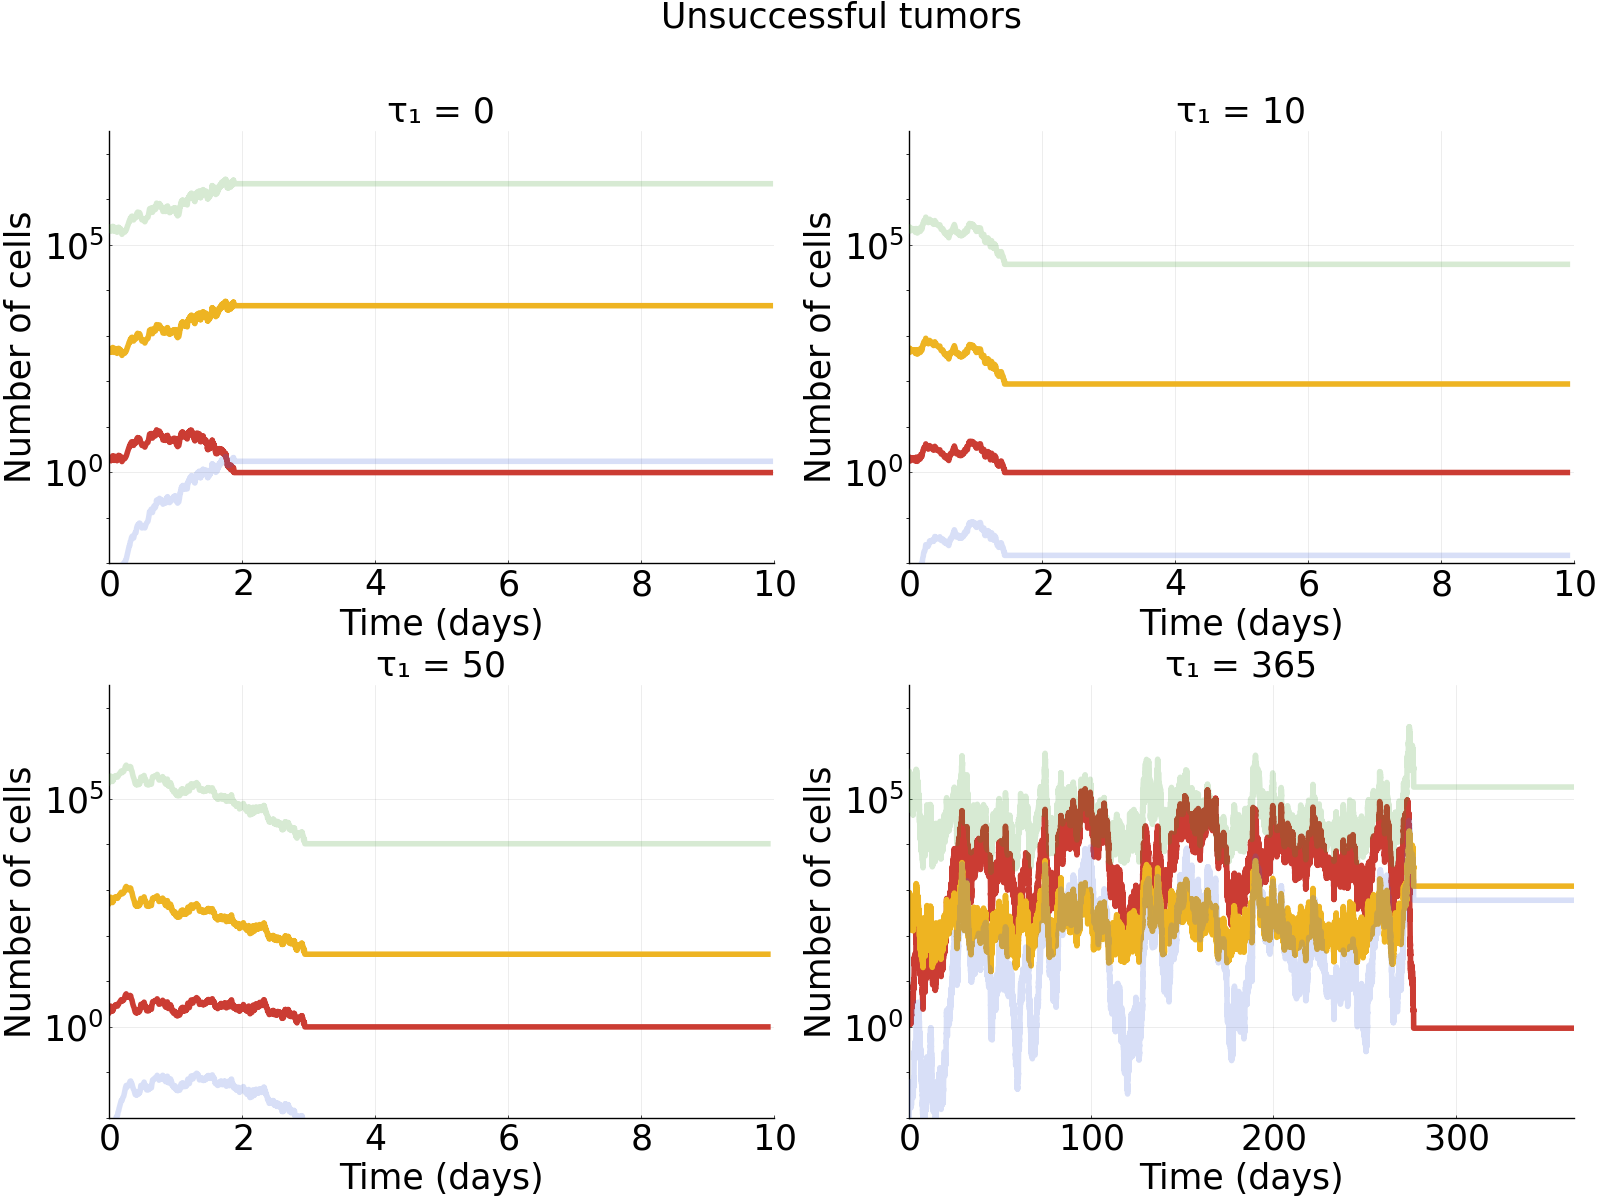

In [44]:
#plot results
l = @layout [a b; c d]
logocolors = Colors.JULIA_LOGO_COLORS
plot(a_extended, b_extended, c_extended, d_extended, layout = l,size =(1600,1200),xtickfont=font(25),ytickfont=font(25),guidefont=font(25),legendfont=font(25),plot_title="Unsuccessful tumors", font = "Ariel",titlefontsize=25)

# Delay plots

In [1]:
using Plots; pyplot()

Plots.PyPlotBackend()

sys:1: UserWarning: You passed a edgecolor/edgecolors ((0.0, 0.0, 0.0, 0.7)) for an unfilled marker ('_').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
sys:1: UserWarning: You passed a edgecolor/edgecolors ((0.0, 0.0, 0.0, 0.7)) for an unfilled marker ('_').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
sys:1: UserWarning: You passed a edgecolor/edgecolors ((0.0, 0.0, 0.0, 0.7)) for an unfilled marker ('_').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
sys:1: UserWarning: You passed a edgecolor/edgecolors ((0.0, 0.0, 0.0, 0.7)) for an unfilled marker ('_').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
sys:1: UserWarning: You passed a edgecolor/edgecolors ((0.0, 0.0, 0.0, 0.7)) for an unfilled marker ('_').  Matplotlib is ignoring the edgecolor in 

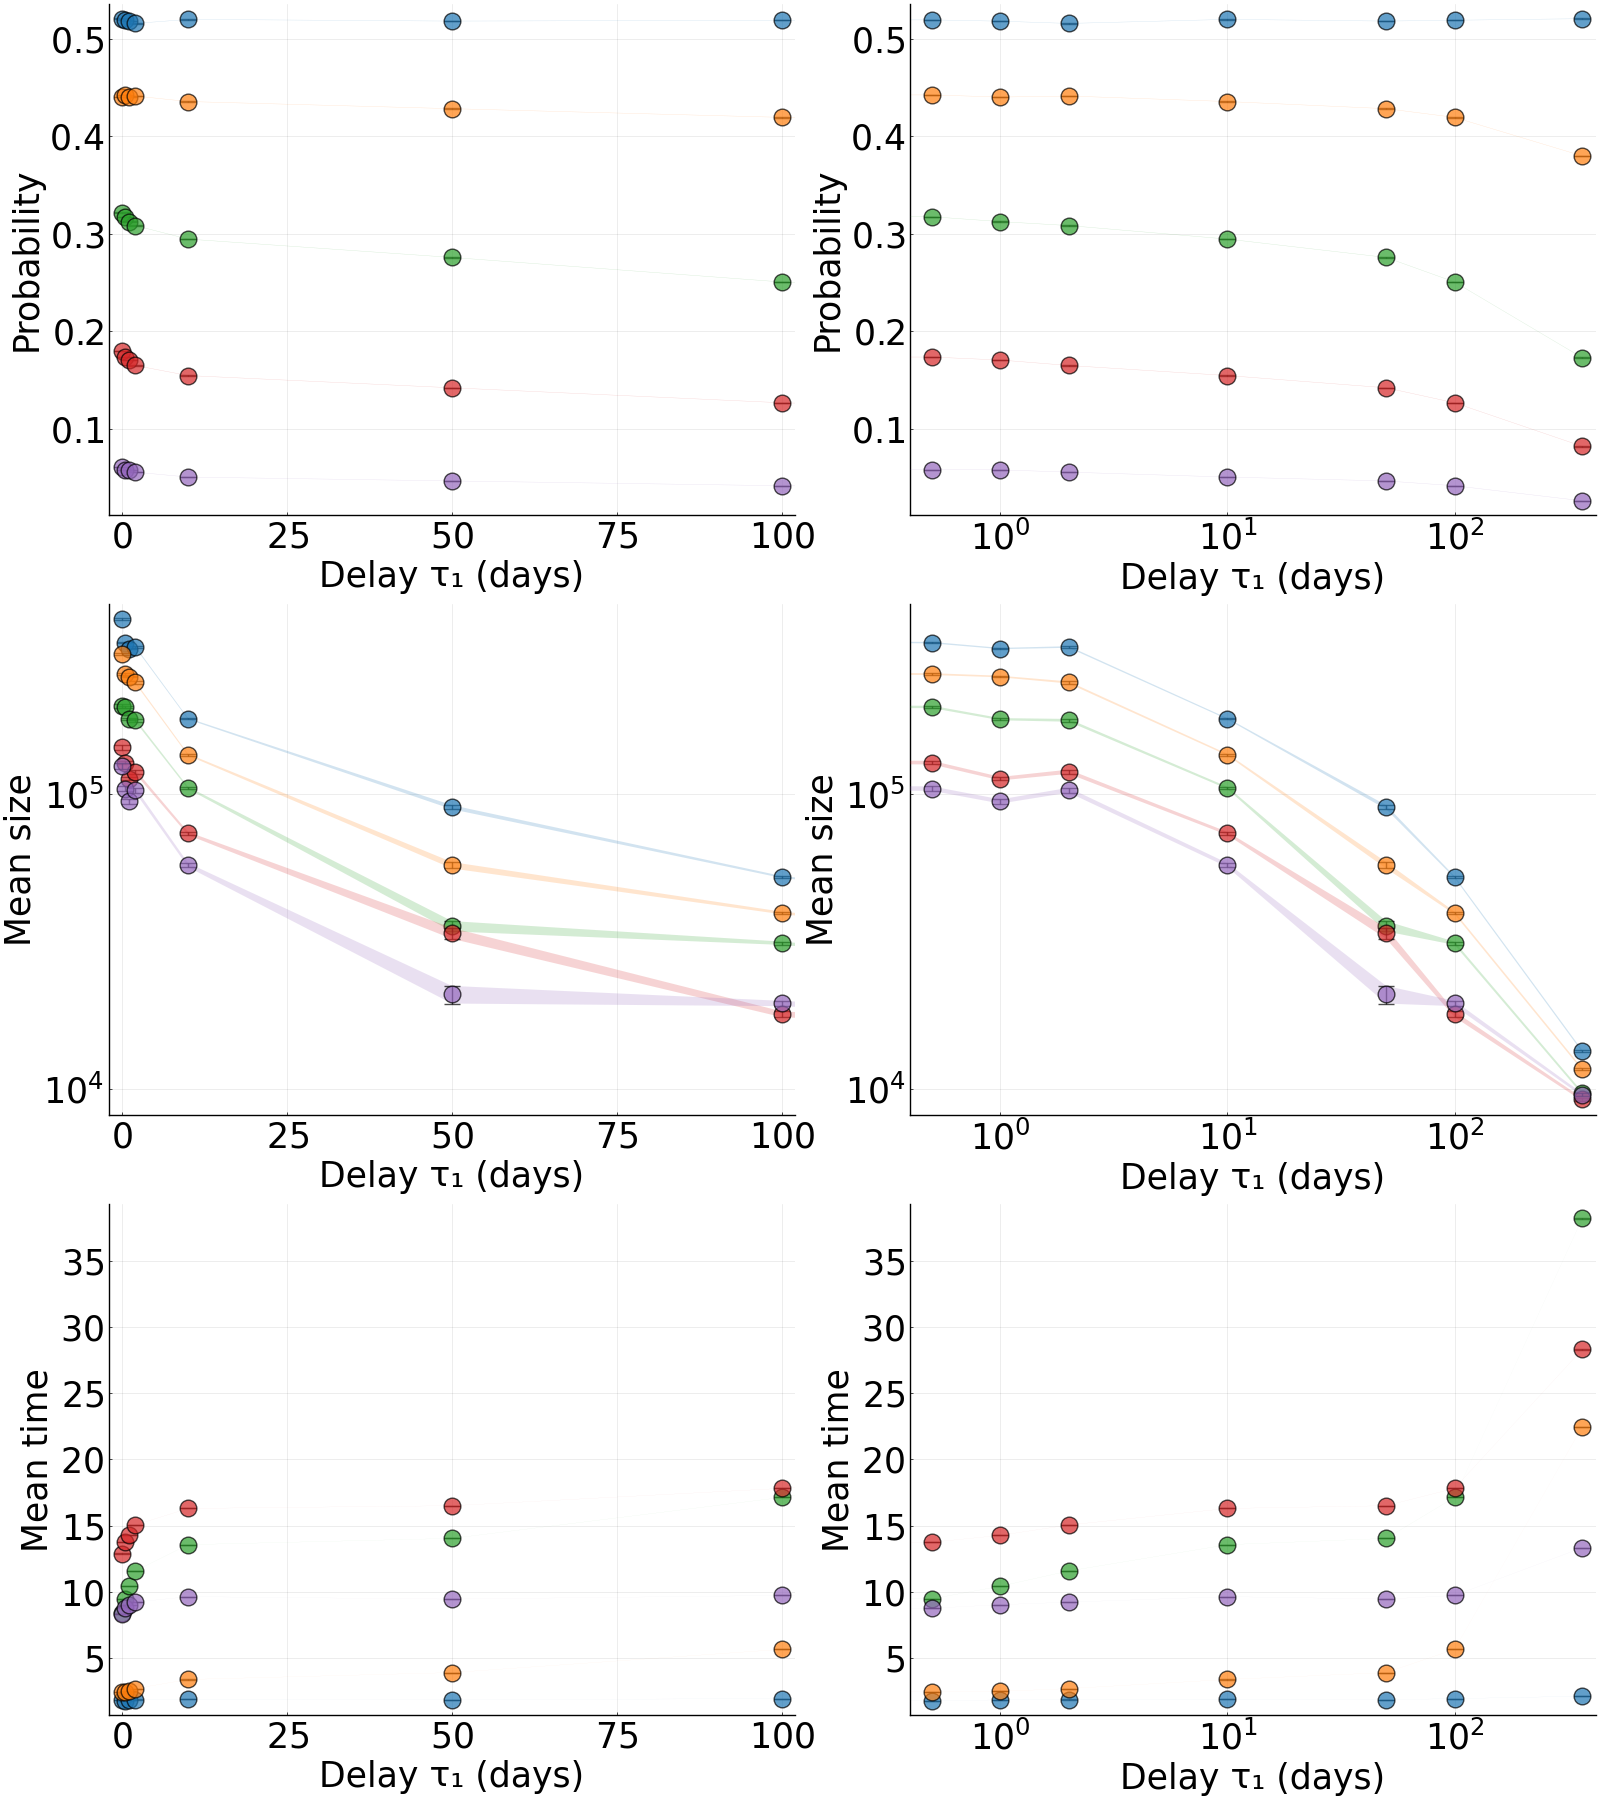

sys:1: UserWarning: You passed a edgecolor/edgecolors ((0.0, 0.0, 0.0, 0.7)) for an unfilled marker ('_').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
sys:1: UserWarning: You passed a edgecolor/edgecolors ((0.0, 0.0, 0.0, 0.7)) for an unfilled marker ('_').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
sys:1: UserWarning: You passed a edgecolor/edgecolors ((0.0, 0.0, 0.0, 0.7)) for an unfilled marker ('_').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
sys:1: UserWarning: You passed a edgecolor/edgecolors ((0.0, 0.0, 0.0, 0.7)) for an unfilled marker ('_').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
sys:1: UserWarning: You passed a edgecolor/edgecolors ((0.0, 0.0, 0.0, 0.7)) for an unfilled marker ('_').  Matplotlib is ignoring the edgecolor in 

In [2]:
#plot for α₁
l = @layout [a b; c d; e f]
delays = [0,0.5,1,2,10,50,100,365]

prob_success200 = [0.52067,0.51936,0.51802,0.51573,0.51987,0.51813,0.51899,0.5206]
prob_sigma200 = [0.499575,0.499628,0.499678,0.499755,0.499608,0.499674,0.499642,0.499578]
mean200 = [390917,325657,311041,314798,179711,90063.8,52208,13398.2]
mean_sigma200 = [6.57092*10^6,4.59642*10^6,3.87981*10^6,4.90952*10^6,2.29257*10^6,3.62887*10^6,1.01787*10^6,276487]
number_of_sims200 = [sqrt(100000),sqrt(100000),sqrt(100000),sqrt(100000),sqrt(100000),sqrt(100000),sqrt(100000),sqrt(100000)]
time200 = [1.8359,1.79055,1.87445,1.8974,1.93117,1.88062,1.96586,2.14636]
time_sigma200 =[7.96526,7.4512,8.39377,8.61256,9.12563,8.11352,9.15333,11.7485]

prob_success150 = [0.440281,0.442417,0.440206,0.441288,0.435629,0.428312,0.419405,0.379864]
prob_sigma150 = [0.496423,0.496676,0.496414,0.496543,0.495841,0.494836,0.493464,0.485355]
mean150 = [297352,254711,249961,238555,135733,57244.9,39425.7,11631.9]
mean_sigma150 = [5.20893*10^6,4.16001*10^6,3.57743*10^6,5.68132*10^6,1.59068*10^6,1.02464*10^6,1.32366*10^6,190806]
number_of_sims150 = [sqrt(120230),sqrt(104311),sqrt(105696),sqrt(104816),sqrt(105459),sqrt(108540),sqrt(110218),sqrt(126453)]
time150 = [2.43575,2.47981,2.51275,2.72231,3.409,3.92847,5.68224,22.4496]
time_sigma150 =[12.7222,13.0423,12.9583,15.0331,18.4065,18.3952,22.9263,67.3271]

prob_success100 = [0.321711,0.317475,0.3125,0.30843,0.294564,0.275741,0.250585,0.172958]
prob_sigma100 = [0.467133,0.465496,0.463514,0.461847,0.455848,0.446889,0.433351,0.378212]
mean100 = [198535.,197124.,179085.,177517.,104698.,35567.,31121.6,9651.81]
mean_sigma100 = [3.93484*10^6,6.08296*10^6,3.69632*10^6,6.68483*10^6,3.79012*10^6,351135.,1.0642*10^6,2443.94]
number_of_sims100 = [sqrt(634443),sqrt(150188),sqrt(147523),sqrt(140800),sqrt(148501),sqrt(152400),sqrt(156390),sqrt(173221)]
time100 = [8.4226,9.49264,10.4432,11.5911,13.5737,14.048,17.1391,38.1711]
time_sigma100 =[38.7737,41.7508,44.3292,46.8041,50.5953,48.1733,50.771,83.0854]

prob_success50 = [0.179698,0.17358,0.170547,0.164953,0.154619,0.142073,0.126716,0.0820594]
prob_sigma50 = [0.383937,0.37875,0.376114,0.37114,0.361543,0.349127,0.332656,0.274456]
mean50 = [143826.,127601.,112551.,118862.,73341.7,33654.7,17877.6,9187.57]
mean_sigma50 = [2.15731*10^6,2.31411*10^6,1.63087*10^6,2.63169*10^6,1.08651*10^6,659450.,176773.,2301.57]
number_of_sims50 = [sqrt(134175),sqrt(100029),sqrt(103086),sqrt(103381),sqrt(102730),sqrt(105664),sqrt(108487),sqrt(121473)]
time50 = [12.9067,13.7628,14.2784,15.0591,16.3064,16.512,17.8204,28.2929]
time_sigma50 =[49.884,51.9084,52.5574,54.2098,55.9658,54.2856,54.3863,71.7908]

prob_success0 = [0.0609653,0.0580386,0.0579275,0.0555649,0.0505348,0.0465496,0.0416369,0.0262047]
prob_sigma0 = [0.239267,0.233818,0.233607,0.22908,0.219047,0.210673,0.199759,0.159744]
mean0 = [124420.,104145.,94199.3,102888.,57298.3,20862.6,19442.7,9534.08]
mean_sigma0 = [3.38188*10^6,2.07578*10^6,1.06524*10^6,1.47331*10^6,1.12906*10^6,149171.,352002.,2386.96]
number_of_sims0 = [sqrt(1342140),sqrt(104999),sqrt(152501),sqrt(148007),sqrt(105175),sqrt(134244),sqrt(137114),sqrt(104981)]
time0 = [8.35639,8.78197,9.04973,9.23944,9.65523,9.46847,9.74487,13.3427]
time_sigma0 =[39.5505,40.7133,41.3733,41.7399,42.4668,40.7554,40.3345,49.0281]


prob_success = [prob_success200 prob_success150 prob_success100 prob_success50 prob_success0]
prob_sigma = [prob_sigma200/number_of_sims200 prob_sigma150/number_of_sims150 prob_sigma100/number_of_sims100 prob_sigma50/number_of_sims50 prob_sigma0/number_of_sims0]

mean = [mean200 mean150 mean100 mean50 mean0]
mean_sigma = [mean_sigma200/number_of_sims200 mean_sigma150/number_of_sims150 mean_sigma100/number_of_sims100 mean_sigma50/number_of_sims50 mean_sigma0/number_of_sims0]

time = [time200 time150 time100 time50 time0]
time_sigma = [time_sigma200/number_of_sims200 time_sigma150/number_of_sims150 time_sigma100/number_of_sims100 time_sigma50/number_of_sims50 time_sigma0/number_of_sims0]

p1 = plot(delays,prob_success,yerror=prob_sigma,ribbon=prob_sigma,fillalpha= 0.2,grid=true,palette=:tab10,align="center",alpha=0.7,label = "",xlabel = "Delay τ₁ (days)",ylabel = "Probability", seriestype =:scatter,xlims = (-2,102),markersize = 12,font = "Ariel") #xlims = (-15,380)
p3 = plot(delays,mean,yerror=mean_sigma,grid=true,ribbon=mean_sigma,fillalpha= 0.2,yaxis=:log,palette=:tab10,align="center",alpha=0.7,label = "",xlabel = "Delay τ₁ (days)",ylabel = "Mean size", seriestype =:scatter,xlims = (-2,102),markersize = 12,font = "Ariel")
p2 = plot(delays,prob_success,yerror=prob_sigma,grid=true,ribbon=prob_sigma,fillalpha= 0.2,xaxis=:log,palette=:tab10,align="center",alpha=0.7,label = "",xlabel = "Delay τ₁ (days)",ylabel = "Probability", seriestype =:scatter,xlims = (0.4,420),markersize = 12,font = "Ariel")
p4 = plot(delays,mean,yerror=mean_sigma,grid=true,ribbon=mean_sigma,fillalpha= 0.2,yaxis=:log,xaxis=:log,palette=:tab10,align="center",alpha=0.7,label = "",xlabel = "Delay τ₁ (days)",ylabel = "Mean size", seriestype =:scatter,xlims = (0.4,420),markersize = 12,font = "Ariel")
p5 = plot(delays,time,yerror=time_sigma,grid=true,ribbon=time_sigma,fillalpha= 0.2,palette=:tab10,align="center",alpha=0.7,label = "",xlabel = "Delay τ₁ (days)",ylabel = "Mean time", seriestype =:scatter,xlims = (-2,102),markersize = 12,font = "Ariel")
p6 = plot(delays,time,yerror=time_sigma,grid=true,ribbon=time_sigma,fillalpha= 0.2,xaxis=:log,palette=:tab10,align="center",alpha=0.7,label = "",xlabel = "Delay τ₁ (days)",ylabel = "Mean time", seriestype =:scatter,xlims = (0.4,420),markersize = 12,font = "Ariel")
plot(p1, p2, p3, p4, p5, p6, layout = l,size =(1600,1800),xtickfont=font(25),ytickfont=font(25),guidefont=font(25),legendfont=font(25))

sys:1: UserWarning: You passed a edgecolor/edgecolors ((0.0, 0.0, 0.0, 0.7)) for an unfilled marker ('_').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
sys:1: UserWarning: You passed a edgecolor/edgecolors ((0.0, 0.0, 0.0, 0.7)) for an unfilled marker ('_').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
sys:1: UserWarning: You passed a edgecolor/edgecolors ((0.0, 0.0, 0.0, 0.7)) for an unfilled marker ('_').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
┌ Warning: Invalid negative or zero value 0.0 found at series index 2 for log10 based xscale
└ @ Plots /Users/jessekreger/.julia/packages/Plots/Xv2qA/src/utils.jl:95
sys:1: UserWarning: You passed a edgecolor/edgecolors ((0.0, 0.0, 0.0, 0.7)) for an unfilled marker ('_').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may chan

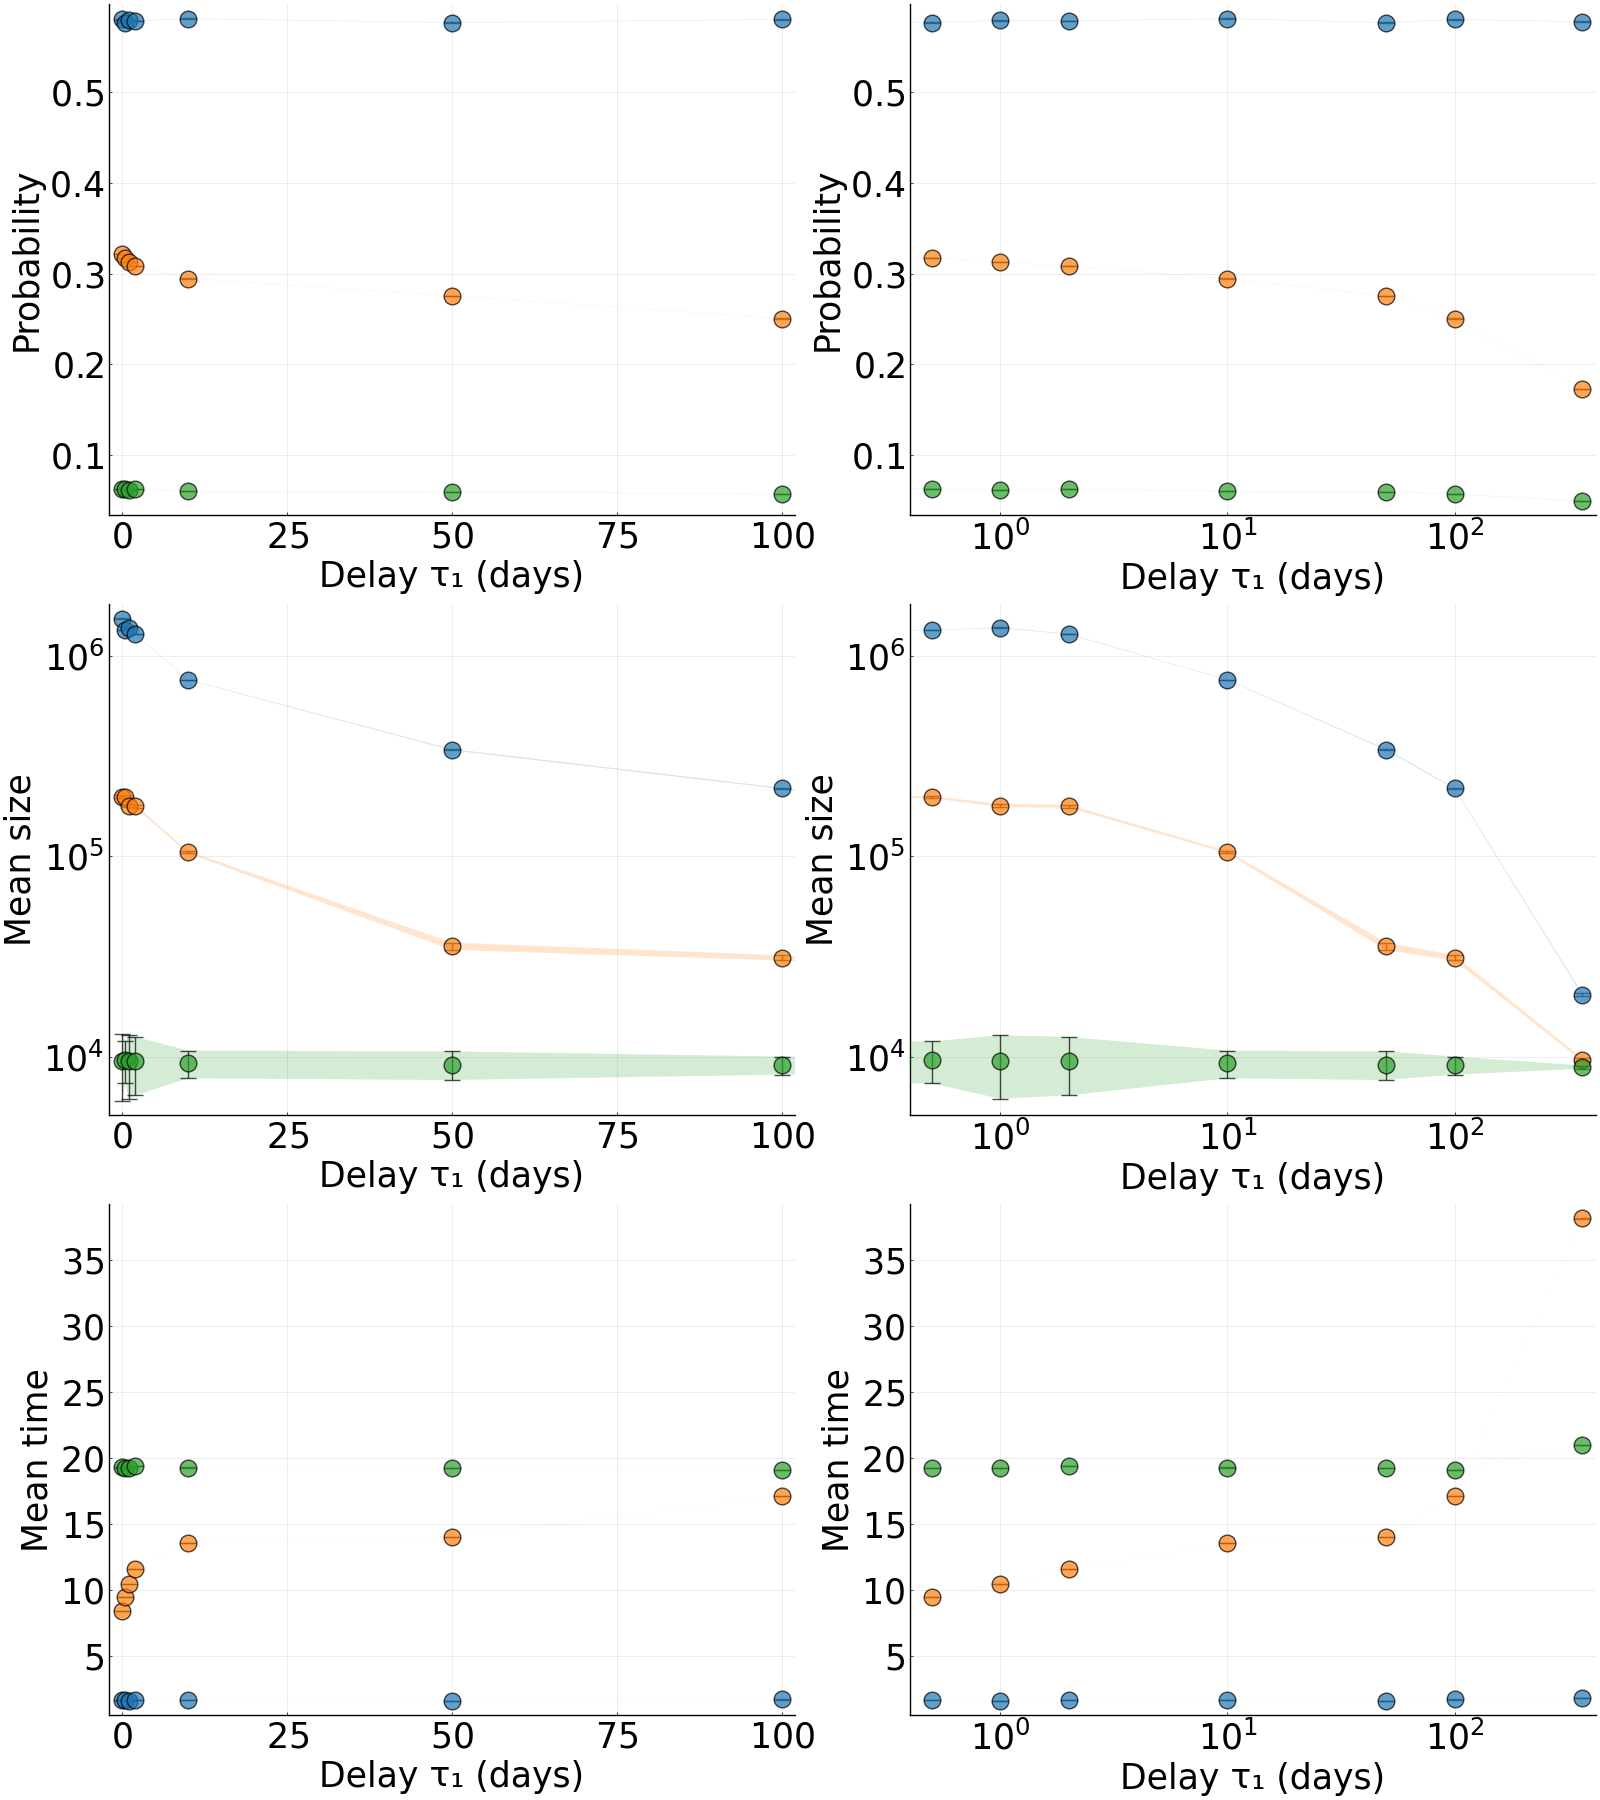

sys:1: UserWarning: You passed a edgecolor/edgecolors ((0.0, 0.0, 0.0, 0.7)) for an unfilled marker ('_').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
sys:1: UserWarning: You passed a edgecolor/edgecolors ((0.0, 0.0, 0.0, 0.7)) for an unfilled marker ('_').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
sys:1: UserWarning: You passed a edgecolor/edgecolors ((0.0, 0.0, 0.0, 0.7)) for an unfilled marker ('_').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
sys:1: UserWarning: You passed a edgecolor/edgecolors ((0.0, 0.0, 0.0, 0.7)) for an unfilled marker ('_').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
┌ Warning: Invalid negative or zero value 0.0 found at series index 2 for log10 based xscale
└ @ Plots /Users/jessekreger/.julia/packages/Plots/Xv2q

In [2]:
#plot for α₁₄
l = @layout [a b; c d; e f]
delays = [0,0.5,1,2,10,50,100,365]

prob_success10n4 = [0.580016,0.576499,0.578837,0.578279,0.580816,0.576478,0.579891,0.577501]
prob_sigma10n4 = [0.493557,0.494116,0.493748,0.493837,0.493428,0.494119,0.493578,0.493959]
mean10n4 = [1.53191*10^6,1.34259*10^6,1.38166*10^6,1.28288*10^6,759544,340114,217968,20408.3]
mean_sigma10n4 = [1.13528*10^7,7.40251*10^6,1.08067*10^7,9.9858*10^6,4.75756*10^6,4.85713*10^6,3.0557*10^6,527350]
number_of_sims10n4 = [sqrt(256731),sqrt(106538),sqrt(105705),sqrt(105501),sqrt(105617),sqrt(114105),sqrt(121666),sqrt(143418)]
time10n4 = [1.64546,1.67286,1.62925,1.68716,1.68003,1.61089,1.71913,1.86218]
time_sigma10n4 =[7.9846,8.53064,8.04551,8.79182,8.63927,7.44698,8.66009,10.9508]

prob_success4t10n5 = [0.321711,0.317475,0.3125,0.30843,0.294564,0.275741,0.250585,0.172958]
prob_sigma4t10n5 = [0.467133,0.465496,0.463514,0.461847,0.455848,0.446889,0.433351,0.378212]
mean4t10n5 = [198535.,197124.,179085.,177517.,104698.,35567.,31121.6,9651.81]
mean_sigma4t10n5 = [3.93484*10^6,6.08296*10^6,3.69632*10^6,6.68483*10^6,3.79012*10^6,351135.,1.0642*10^6,2443.94]
number_of_sims4t10n5 = [sqrt(634443),sqrt(150188),sqrt(147523),sqrt(140800),sqrt(148501),sqrt(152400),sqrt(156390),sqrt(173221)]
time4t10n5 = [8.4226,9.49264,10.4432,11.5911,13.5737,14.048,17.1391,38.1711]
time_sigma4t10n5 =[38.7737,41.7508,44.3292,46.8041,50.5953,48.1733,50.771,83.0854]

prob_success10n5 = [0.0626245,0.0630946,0.0618317,0.0630908,0.0603281,0.0597871,0.0571256,0.0498191]
prob_sigma10n5 = [0.242287,0.243134,0.240851,0.243127,0.238095,0.237093,0.232084,0.217572]
mean10n5 = [9489.89,9626.14,9471.38,9471.57,9255.95,9130.65,9068.35,8862.56]
mean_sigma10n5 = [4057.02,5268.35,2538.75,4847.29,2827.06,2398.44,2381.86,2249.34]
number_of_sims10n5 = [sqrt(127490),sqrt(100595),sqrt(100434),sqrt(101140),sqrt(102357),sqrt(104454),sqrt(106257),sqrt(119934)]
time10n5 = [19.3006,19.2903,19.2524,19.4266,19.2971,19.2389,19.1301,21.0142]
time_sigma10n5 =[60.0717,60.0054,60.2217,60.0074,59.8518,59.5921,58.7898,61.7948]



prob_success = [prob_success10n4 prob_success4t10n5 prob_success10n5]
prob_sigma = [prob_sigma10n4/number_of_sims10n4 prob_sigma4t10n5/number_of_sims4t10n5 prob_sigma10n5/number_of_sims10n5]

mean = [mean10n4 mean4t10n5 mean10n5]
mean_sigma = [mean_sigma10n4/number_of_sims10n4 mean_sigma4t10n5/number_of_sims4t10n5 mean_sigma10n5/number_of_sims10n5]

time = [time10n4 time4t10n5 time10n5]
time_sigma = [time_sigma10n4/number_of_sims10n4 time_sigma4t10n5/number_of_sims4t10n5 time_sigma10n5/number_of_sims10n5]

p1 = plot(delays,prob_success,yerror=prob_sigma,ribbon=prob_sigma,fillalpha= 0.2,grid=true,palette=:tab10,align="center",alpha=0.7,label = "",xlabel = "Delay τ₁ (days)",ylabel = "Probability", seriestype =:scatter,xlims = (-2,102),markersize = 12,font = "Ariel") #xlims = (-15,380)
p3 = plot(delays,mean,yerror=mean_sigma,grid=true,ribbon=mean_sigma,fillalpha= 0.2,yaxis=:log,palette=:tab10,align="center",alpha=0.7,label = "",xlabel = "Delay τ₁ (days)",ylabel = "Mean size", seriestype =:scatter,xlims = (-2,102),markersize = 12,font = "Ariel")
p2 = plot(delays,prob_success,yerror=prob_sigma,grid=true,ribbon=prob_sigma,fillalpha= 0.2,xaxis=:log,palette=:tab10,align="center",alpha=0.7,label = "",xlabel = "Delay τ₁ (days)",ylabel = "Probability", seriestype =:scatter,xlims = (0.4,420),markersize = 12,font = "Ariel")
p4 = plot(delays,mean,yerror=mean_sigma,grid=true,ribbon=mean_sigma,fillalpha= 0.2,yaxis=:log,xaxis=:log,palette=:tab10,align="center",alpha=0.7,label = "",xlabel = "Delay τ₁ (days)",ylabel = "Mean size", seriestype =:scatter,xlims = (0.4,420),markersize = 12,font = "Ariel")
p5 = plot(delays,time,yerror=time_sigma,grid=true,ribbon=time_sigma,fillalpha= 0.2,palette=:tab10,align="center",alpha=0.7,label = "",xlabel = "Delay τ₁ (days)",ylabel = "Mean time", seriestype =:scatter,xlims = (-2,102),markersize = 12,font = "Ariel")
p6 = plot(delays,time,yerror=time_sigma,grid=true,ribbon=time_sigma,fillalpha= 0.2,xaxis=:log,palette=:tab10,align="center",alpha=0.7,label = "",xlabel = "Delay τ₁ (days)",ylabel = "Mean time", seriestype =:scatter,xlims = (0.4,420),markersize = 12,font = "Ariel")
plot(p1, p2, p3, p4, p5, p6, layout = l,size =(1600,1800),xtickfont=font(25),ytickfont=font(25),guidefont=font(25),legendfont=font(25))

sys:1: UserWarning: You passed a edgecolor/edgecolors ((0.0, 0.0, 0.0, 0.7)) for an unfilled marker ('_').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
sys:1: UserWarning: You passed a edgecolor/edgecolors ((0.0, 0.0, 0.0, 0.7)) for an unfilled marker ('_').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
sys:1: UserWarning: You passed a edgecolor/edgecolors ((0.0, 0.0, 0.0, 0.7)) for an unfilled marker ('_').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
┌ Warning: Invalid negative or zero value 0.0 found at series index 2 for log10 based xscale
└ @ Plots /Users/jessekreger/.julia/packages/Plots/Xv2qA/src/utils.jl:95
sys:1: UserWarning: You passed a edgecolor/edgecolors ((0.0, 0.0, 0.0, 0.7)) for an unfilled marker ('_').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may chan

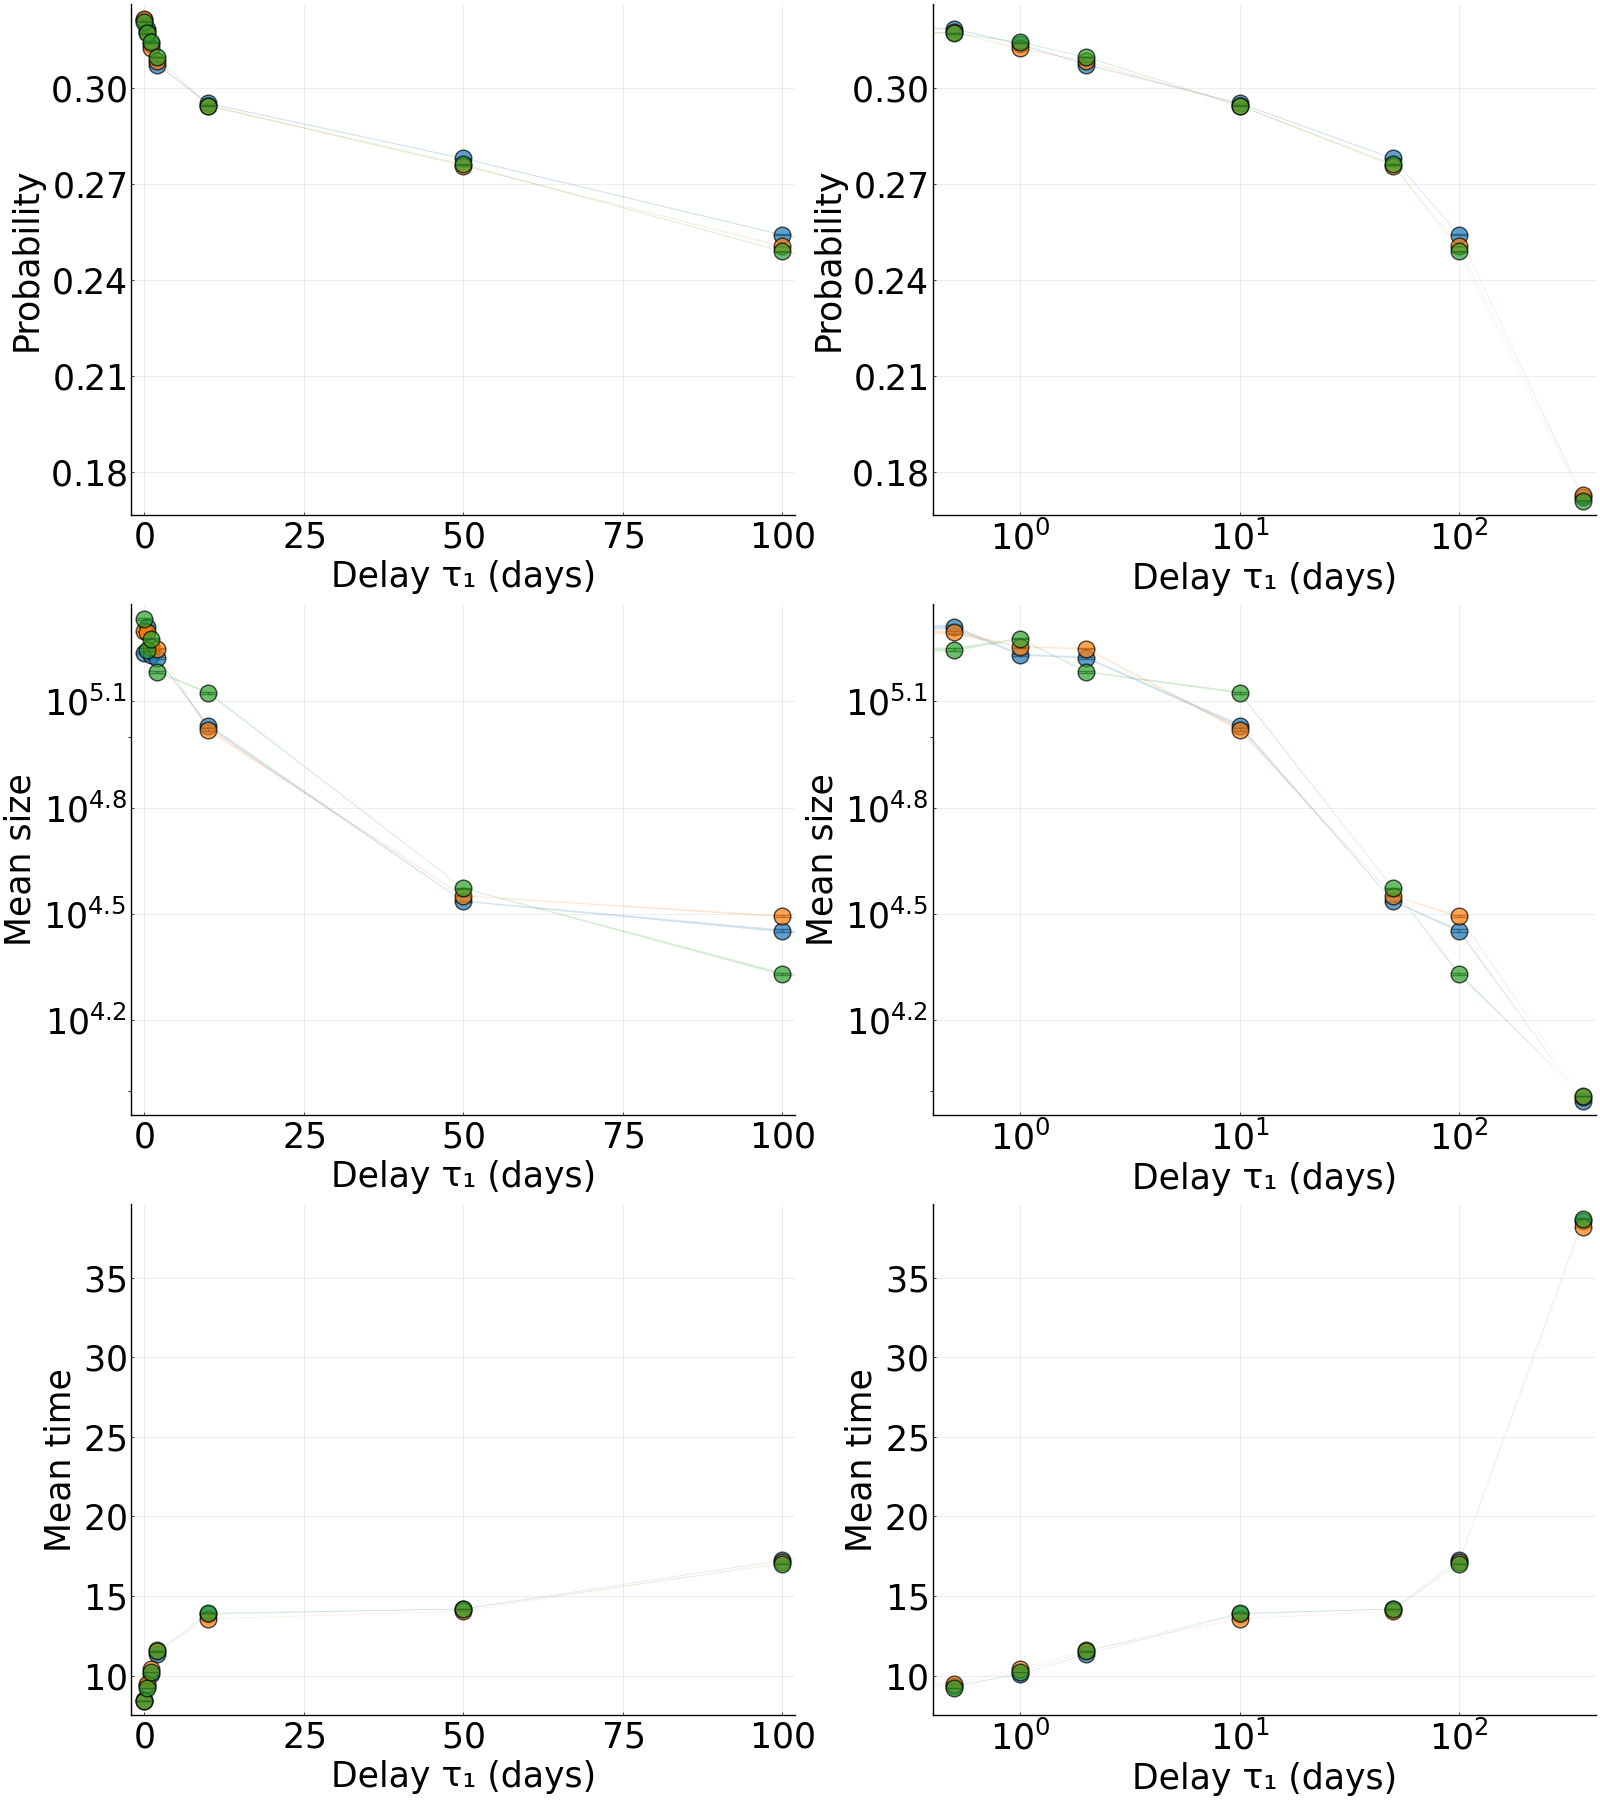

sys:1: UserWarning: You passed a edgecolor/edgecolors ((0.0, 0.0, 0.0, 0.7)) for an unfilled marker ('_').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
sys:1: UserWarning: You passed a edgecolor/edgecolors ((0.0, 0.0, 0.0, 0.7)) for an unfilled marker ('_').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
sys:1: UserWarning: You passed a edgecolor/edgecolors ((0.0, 0.0, 0.0, 0.7)) for an unfilled marker ('_').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
sys:1: UserWarning: You passed a edgecolor/edgecolors ((0.0, 0.0, 0.0, 0.7)) for an unfilled marker ('_').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
┌ Warning: Invalid negative or zero value 0.0 found at series index 2 for log10 based xscale
└ @ Plots /Users/jessekreger/.julia/packages/Plots/Xv2q

In [2]:
#plot for α₁₉
l = @layout [a b; c d; e f]
delays = [0,0.5,1,2,10,50,100,365]

prob_success5t10n4 = [0.321253,0.318637,0.313757,0.307416,0.295281,0.278051,0.254158,0.172117]
prob_sigma5t10n4 = [0.466959,0.46595,0.464021,0.461425,0.456171,0.448041,0.435389,0.377483]
mean5t10n4 = [172414,204083,170563,167353,107548,34361.6,28335.5,9377.94]
mean_sigma5t10n4 = [3.2732*10^6,6.77102*10^6,2.42371*10^6,2.44056*10^6,2.74728*10^6,323682,609004,2387.1]
number_of_sims5t10n4 = [sqrt(217738),sqrt(124518),sqrt(125441),sqrt(124395),sqrt(125589),sqrt(127980),sqrt(129805),sqrt(146017)]
time5t10n4 = [8.46267,9.37942,10.072,11.3366,13.8726,14.1926,17.2497,38.5379]
time_sigma5t10n4 =[39.0201,41.382,43.2191,46.4694,51.5219,48.7865,50.8526,83.7162]

prob_success10n4 = [0.321711,0.317475,0.3125,0.30843,0.294564,0.275741,0.250585,0.172958]
prob_sigma10n4 = [0.467133,0.465496,0.463514,0.461847,0.455848,0.446889,0.433351,0.378212]
mean10n4 = [198535.,197124.,179085.,177517.,104698.,35567.,31121.6,9651.81]
mean_sigma10n4 = [3.93484*10^6,6.08296*10^6,3.69632*10^6,6.68483*10^6,3.79012*10^6,351135.,1.0642*10^6,2443.94]
number_of_sims10n4 = [sqrt(634443),sqrt(150188),sqrt(147523),sqrt(140800),sqrt(148501),sqrt(152400),sqrt(156390),sqrt(173221)]
time10n4 = [8.4226,9.49264,10.4432,11.5911,13.5737,14.048,17.1391,38.1711]
time_sigma10n4 =[38.7737,41.7508,44.3292,46.8041,50.5953,48.1733,50.771,83.0854]

prob_success5t10n5 = [0.320807,0.317287,0.314393,0.309786,0.294581,0.276185,0.249058,0.171064]
prob_sigma5t10n5 = [0.466787,0.465423,0.464276,0.462408,0.455856,0.447112,0.43247,0.376566]
mean5t10n5 = [214865,176308,189249,152551,133333,37374.8,21412,9684.41]
mean_sigma5t10n5 = [5.89724*10^6,2.21887*10^6,3.03558*10^6,1.87603*10^6,3.96456*10^6,548492,194234,2452.99]
number_of_sims5t10n5 = [sqrt(431599),sqrt(102144),sqrt(101599),sqrt(100876),sqrt(101439),sqrt(102663),sqrt(106449),sqrt(118903)]
time5t10n5 = [8.42075,9.23028,10.2403,11.52,13.9203,14.1769,17.0167,38.684]
time_sigma5t10n5 =[38.8021,40.6315,43.6771,46.7931,51.5811,48.3473,49.916,84.0469]


prob_success = [prob_success5t10n4 prob_success10n4 prob_success5t10n5]
prob_sigma = [prob_sigma5t10n4/number_of_sims5t10n4 prob_sigma10n4/number_of_sims10n4 prob_sigma5t10n5/number_of_sims5t10n5]

mean = [mean5t10n4 mean10n4 mean5t10n5]
mean_sigma = [mean_sigma5t10n4/number_of_sims5t10n4 mean_sigma10n4/number_of_sims10n4 mean_sigma5t10n5/number_of_sims5t10n5]

time = [time5t10n4 time10n4 time5t10n5]
time_sigma = [time_sigma5t10n4/number_of_sims5t10n4 time_sigma10n4/number_of_sims10n4 time_sigma5t10n5/number_of_sims5t10n5]

p1 = plot(delays,prob_success,yerror=prob_sigma,ribbon=prob_sigma,fillalpha= 0.2,grid=true,palette=:tab10,align="center",alpha=0.7,label = "",xlabel = "Delay τ₁ (days)",ylabel = "Probability", seriestype =:scatter,xlims = (-2,102),markersize = 12,font = "Ariel") #xlims = (-15,380)
p3 = plot(delays,mean,yerror=mean_sigma,grid=true,ribbon=mean_sigma,fillalpha= 0.2,yaxis=:log,palette=:tab10,align="center",alpha=0.7,label = "",xlabel = "Delay τ₁ (days)",ylabel = "Mean size", seriestype =:scatter,xlims = (-2,102),markersize = 12,font = "Ariel")
p2 = plot(delays,prob_success,yerror=prob_sigma,grid=true,ribbon=prob_sigma,fillalpha= 0.2,xaxis=:log,palette=:tab10,align="center",alpha=0.7,label = "",xlabel = "Delay τ₁ (days)",ylabel = "Probability", seriestype =:scatter,xlims = (0.4,420),markersize = 12,font = "Ariel")
p4 = plot(delays,mean,yerror=mean_sigma,grid=true,ribbon=mean_sigma,fillalpha= 0.2,yaxis=:log,xaxis=:log,palette=:tab10,align="center",alpha=0.7,label = "",xlabel = "Delay τ₁ (days)",ylabel = "Mean size", seriestype =:scatter,xlims = (0.4,420),markersize = 12,font = "Ariel")
p5 = plot(delays,time,yerror=time_sigma,grid=true,ribbon=time_sigma,fillalpha= 0.2,palette=:tab10,align="center",alpha=0.7,label = "",xlabel = "Delay τ₁ (days)",ylabel = "Mean time", seriestype =:scatter,xlims = (-2,102),markersize = 12,font = "Ariel")
p6 = plot(delays,time,yerror=time_sigma,grid=true,ribbon=time_sigma,fillalpha= 0.2,xaxis=:log,palette=:tab10,align="center",alpha=0.7,label = "",xlabel = "Delay τ₁ (days)",ylabel = "Mean time", seriestype =:scatter,xlims = (0.4,420),markersize = 12,font = "Ariel")
plot(p1, p2, p3, p4, p5, p6, layout = l,size =(1600,1800),xtickfont=font(25),ytickfont=font(25),guidefont=font(25),legendfont=font(25))

# Time plot

In [1]:
using Plots; pyplot()

Plots.PyPlotBackend()

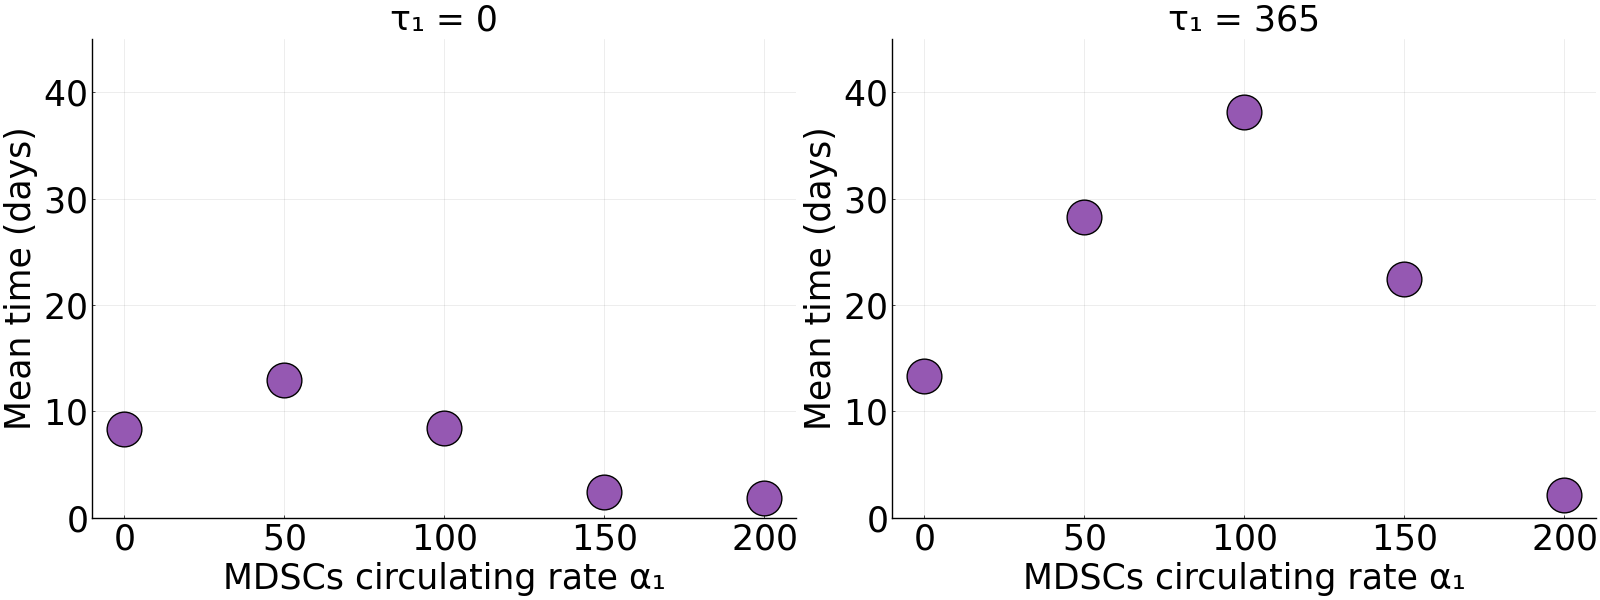

In [3]:
#time to extinction plot
l = @layout [a b]
delays = [0,0.5,1,2,10,50,100,365]
alpha1 = [0,50,100,150,200]
times0 = [8.35639,12.9067,8.4226,2.43575,1.8359]
times365 = [13.3427,28.2929,38.1711,22.4496,2.14636]

logocolors = Colors.JULIA_LOGO_COLORS

p1 = plot(alpha1,times0,grid=true,color=logocolors.purple,align="center",title = "τ₁ = 0",xlabel = "MDSCs circulating rate α₁",ylabel = "Mean time (days)",legend = false,seriestype =:scatter,markersize = 25,font = "Ariel",xlims = (-10,210),ylims = (0,45))
p2 = plot(alpha1,times365,grid=true,color=logocolors.purple,align="center",title = "τ₁ = 365",xlabel = "MDSCs circulating rate α₁",ylabel = "Mean time (days)",legend = false,seriestype =:scatter,markersize = 25,font = "Ariel",xlims = (-10,210),ylims = (0,45))
plot(p1,p2,layout = l,size =(1600,600),xtickfont=font(25),ytickfont=font(25),guidefont=font(25),legendfont=font(25),titlefont=font(25))

# Stochastic Gillespie simulations

In [1]:
using Catalyst
using DifferentialEquations
using ModelingToolkit
using Plots; pyplot()
using Statistics
using ParameterizedFunctions
using DiffEqJump
using DelimitedFiles
using CSV
using DataFrames
using Random
logocolors = Colors.JULIA_LOGO_COLORS

(red = RGB{N0f8}(0.796,0.235,0.2), green = RGB{N0f8}(0.22,0.596,0.149), blue = RGB{N0f8}(0.251,0.388,0.847), purple = RGB{N0f8}(0.584,0.345,0.698))

In [2]:
# model definition 

system = @reaction_network begin
  α₇*C*log(α₈/C),  0 --> C
  α₁, 0 --> M
  α₉*NK, C --> 0
  α₁₀*T, C --> 0
  α₁₁, C --> 0
  α₂*C/(γ₁+(C)), 0 --> M
  α₃, M --> 0
  α₁₂, 0 --> NK
  α₁₃*(C^2)/(γ₂+(C^2)), 0 --> NK
  α₁₄*M, NK --> 0
  α₁₆, NK --> 0
  α₁₇*C*NK, 0 --> T
  α₁₈*(C^2)/(γ₃+(C^2)), 0 --> T
  α₁₉*M, T --> 0
  α₂₁, T --> 0
end α₁ α₂ α₃ α₇ α₈ α₉ α₁₀ α₁₁ α₁₂ α₁₃ α₁₄ α₁₆ α₁₇ α₁₈ α₁₉ α₂₁ γ₁ γ₂ γ₃

Model ##ReactionSystem#257 with 15 equations
States (4):
  C(t)
  M(t)
  NK(t)
  T(t)
Parameters (19):
  α₁
  α₂
  α₃
  α₇
  α₈
  α₉
⋮

In [3]:
fullsystem = convert(ODESystem, system)

Model ##ReactionSystem#257 with 4 equations
States (4):
  C(t)
  M(t)
  NK(t)
  T(t)
Parameters (19):
  α₁
  α₂
  α₃
  α₇
  α₈
  α₉
⋮

In [4]:
#set model parameters
n = 1.0

α₁ = 10.0*(10.0^1.0) #M-MDSCs production rate
α₂ = (10.0^8.0) #M-MDSCs expansion coefficient 
α₃ = 0.2 #M-MDSCs death rate

α₇ = 10.0^(-1.0) #tumor growth rate
α₈ = 10.0^7.0 #tumor maximum size
α₉ = 3.5*(10.0^(-6.0)) #tumor cells kill rate by NK cells
α₁₀ = 1.1*(10.0^(-7.0)) #tumor cells kill rate by T cells
α₁₁ = 0.0 #tumor cell death rate

α₁₂ = 1.4*(10.0^4.0) #NK cells production rate
α₁₃ = 2.5*(10.0^(-2.0)) #NK cells expansion coefficient
α₁₄ = 4*(10.0^(-5.0)) #NK cells inactivation rate by M-MDSCs
α₁₆ = 4.12*(10.0^(-2.0)) #NK cells death rate

α₁₇ = 1.1*(10.0^(-7.0)) #CTL stimulation as a result of tumor-NK cell interaction
α₁₈ = 10.0^(-1.0) #CTL expansion coefficient 
α₁₉ = (10.0^(-4.0)) #CTL inactivation rate by M-MDSCs
α₂₁ = 2.0*(10.0^(-2.0)) #CTL death rate

γ₁ = (10.0^(10.0)) #steepness coefficient of MDSC production curve
γ₂ = 2.02*(10.0^(7.0)) #steepness coefficient of NK production curve
γ₃ = 2.02*(10.0^(7.0)) #steepness coefficient of CTL production curve

p = (α₁,α₂,α₃,α₇,α₈,α₉,α₁₀,α₁₁,α₁₂,α₁₃,α₁₄,α₁₆,α₁₇,α₁₈,α₁₉,α₂₁,γ₁,γ₂,γ₃)
tspan = (0.0,365.0)
u0 = [1.0;α₁/α₃;α₃*α₁₂/(α₁*α₁₄+α₃*α₁₆);0.0]

4-element Vector{Float64}:
      1.0
    500.0
 228758.1699346405
      0.0

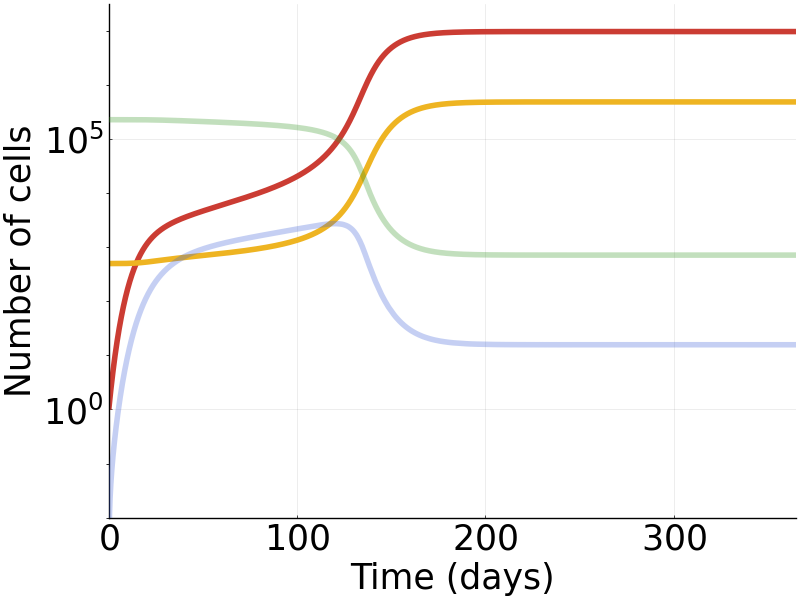

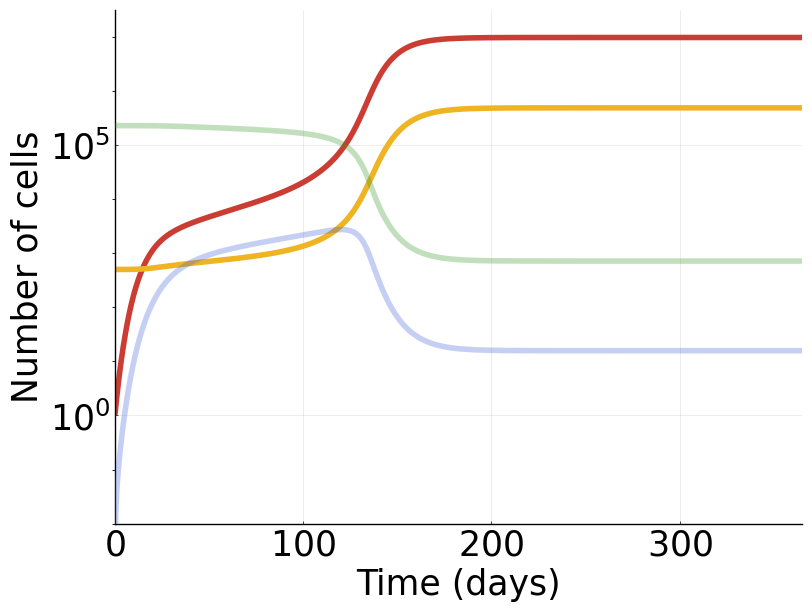

┌ Warning: Invalid negative or zero value 0.0 found at series index 1 for log10 based yscale
└ @ Plots /Users/jessekreger/.julia/packages/Plots/Xv2qA/src/utils.jl:95


retcode: Success
Interpolation: specialized 4th order "free" interpolation
t: 2929-element Vector{Float64}:
   0.0
   0.060256944660698405
   0.2658731855330636
   0.6178678412300449
   1.08210261861819
   1.684126310943165
   2.4317786018601573
   3.34578128252542
   4.446307229515896
   5.765151525342025
   7.3470861647998404
   9.261456882988949
  11.618070929491504
   ⋮
 364.2352349769921
 364.3071204329561
 364.3790058955852
 364.4508913553578
 364.52277680751314
 364.594662256812
 364.666547712776
 364.7384331754051
 364.8103186351777
 364.8822040920938
 364.95408954615345
 365.0
u: 2929-element Vector{Vector{Float64}}:
 [1.0, 500.0, 228758.1699346405, 0.0]
 [1.0499376846703614, 500.0006138318529, 228758.1697666647, 0.0015506139550194307]
 [1.2371655191044952, 500.00288952088306, 228758.16653464, 0.007392474870977418]
 [1.6258290254875443, 500.0075401967587, 228758.15023991073, 0.019676561729973757]
 [2.2977508055193905, 500.01551776993205, 228758.10325701066, 0.04142467882334979

In [5]:
# deterministic simulation of system

op    = ODEProblem(system, u0, tspan, p)
sol   = solve(op, Tsit5()) 
plot2 = plot(sol, lw = 4, yaxis=:log,size =(1600/2,600), font = "Ariel", ylims = (0.01,10^7.5), color = [logocolors.red "goldenrod2" logocolors.green logocolors.blue], alpha = [1 1 0.3 0.3], legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (days)",xguidefontsize=25,ylabel="Number of cells",yguidefontsize=25,title = "",titlefontsize=25)

display(plot2)
sol

In [9]:
#define conditions for simulation to end
function condition(u,t,integrator) 
  u[1] <= 0 
end
floor_event = DiscreteCallback(condition, terminate!)

DiscreteCallback{typeof(condition), typeof(terminate!), typeof(DiffEqBase.INITIALIZE_DEFAULT), typeof(DiffEqBase.FINALIZE_DEFAULT)}(condition, SciMLBase.terminate!, DiffEqBase.INITIALIZE_DEFAULT, DiffEqBase.FINALIZE_DEFAULT, Bool[1, 1])

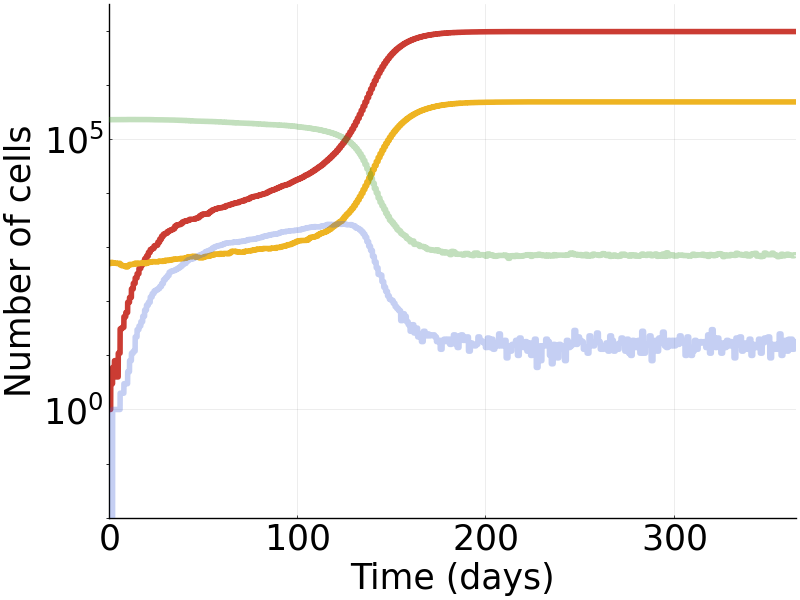

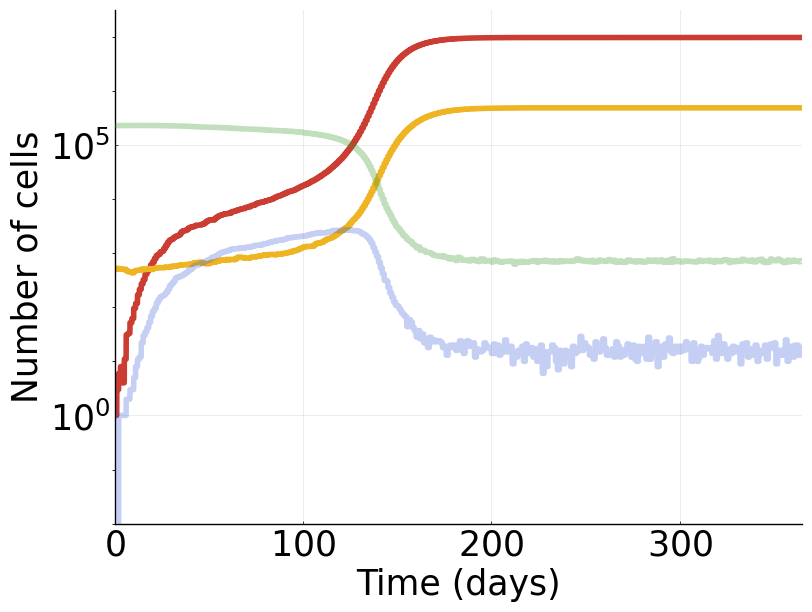

┌ Warning: Invalid negative or zero value 0.0 found at series index 1 for log10 based yscale
└ @ Plots /Users/jessekreger/.julia/packages/Plots/Xv2qA/src/utils.jl:95


retcode: Default
Interpolation: Piecewise constant interpolation
t: 366-element Vector{Float64}:
   0.0
   1.0
   2.0
   3.0
   4.0
   5.0
   6.0
   7.0
   8.0
   9.0
  10.0
  11.0
  12.0
   ⋮
 354.0
 355.0
 356.0
 357.0
 358.0
 359.0
 360.0
 361.0
 362.0
 363.0
 364.0
 365.0
u: 366-element Vector{Vector{Float64}}:
 [1.0, 500.0, 228758.1699346405, 0.0]
 [3.0, 525.0, 228734.1699346405, 0.0]
 [6.0, 513.0, 228512.1699346405, 1.0]
 [8.0, 508.0, 228586.1699346405, 1.0]
 [4.0, 502.0, 228423.1699346405, 1.0]
 [11.0, 505.0, 228620.1699346405, 1.0]
 [31.0, 472.0, 228689.1699346405, 2.0]
 [33.0, 454.0, 229092.1699346405, 2.0]
 [52.0, 452.0, 229596.1699346405, 3.0]
 [62.0, 432.0, 229832.1699346405, 3.0]
 [96.0, 460.0, 230319.1699346405, 5.0]
 [118.0, 482.0, 230543.1699346405, 8.0]
 [170.0, 482.0, 230679.1699346405, 11.0]
 ⋮
 [9.752449e6, 487974.0, 712.169934640493, 16.0]
 [9.75248e6, 487980.0, 670.169934640493, 13.0]
 [9.752752e6, 487866.0, 685.169934640493, 25.0]
 [9.752697e6, 488129.0, 744.1699

In [41]:
# stochastic simulation of system

# successful tumor

Random.seed!(1234)

dprob = DiscreteProblem(system, u0, tspan, p)
jprob = JumpProblem(system, dprob, Direct(), save_positions=(false,false)) 
jsol = solve(jprob, SSAStepper(), saveat=1.0, callback=floor_event)
plot1 = plot(jsol, lw = 4, yaxis=:log,size =(1600/2,600), font = "Ariel", ylims = (0.01,10^7.5), color = [logocolors.red "goldenrod2" logocolors.green logocolors.blue], alpha = [1 1 0.3 0.3], legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (days)",xguidefontsize=25,ylabel="Number of cells",yguidefontsize=25,title = "",titlefontsize=25)

display(plot1)

jsol

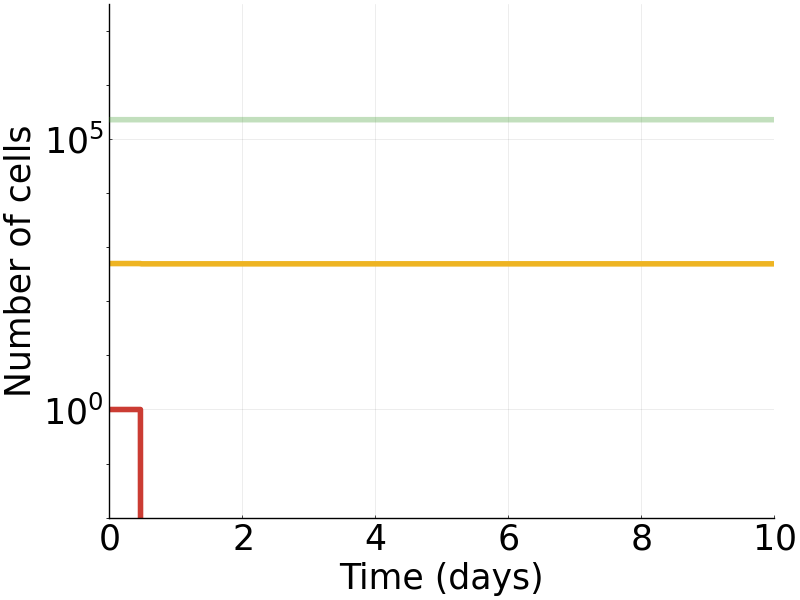

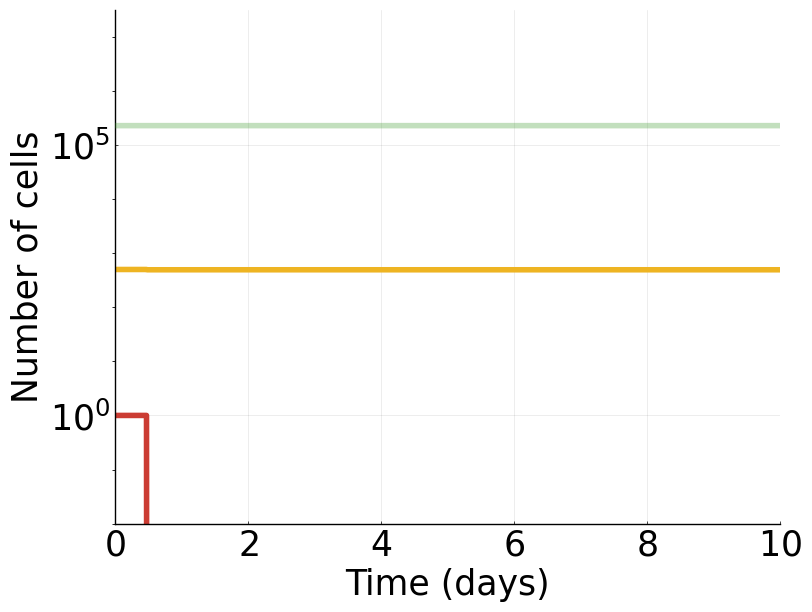

┌ Warning: Invalid negative or zero value 0.0 found at series index 50 for log10 based yscale
└ @ Plots /Users/jessekreger/.julia/packages/Plots/Xv2qA/src/utils.jl:95
┌ Warning: Invalid negative or zero value 0.0 found at series index 1 for log10 based yscale
└ @ Plots /Users/jessekreger/.julia/packages/Plots/Xv2qA/src/utils.jl:95


retcode: Terminated
Interpolation: Piecewise constant interpolation
t: 368-element Vector{Float64}:
   0.0
   0.4781712957391987
   0.4781712957391987
   1.0
   2.0
   3.0
   4.0
   5.0
   6.0
   7.0
   8.0
   9.0
  10.0
   ⋮
 354.0
 355.0
 356.0
 357.0
 358.0
 359.0
 360.0
 361.0
 362.0
 363.0
 364.0
 365.0
u: 368-element Vector{Vector{Float64}}:
 [1.0, 500.0, 228758.1699346405, 0.0]
 [0.0, 494.0, 228612.1699346405, 0.0]
 [0.0, 494.0, 228612.1699346405, 0.0]
 [0.0, 494.0, 228612.1699346405, 0.0]
 [0.0, 494.0, 228612.1699346405, 0.0]
 [0.0, 494.0, 228612.1699346405, 0.0]
 [0.0, 494.0, 228612.1699346405, 0.0]
 [0.0, 494.0, 228612.1699346405, 0.0]
 [0.0, 494.0, 228612.1699346405, 0.0]
 [0.0, 494.0, 228612.1699346405, 0.0]
 [0.0, 494.0, 228612.1699346405, 0.0]
 [0.0, 494.0, 228612.1699346405, 0.0]
 [0.0, 494.0, 228612.1699346405, 0.0]
 ⋮
 [0.0, 494.0, 228612.1699346405, 0.0]
 [0.0, 494.0, 228612.1699346405, 0.0]
 [0.0, 494.0, 228612.1699346405, 0.0]
 [0.0, 494.0, 228612.1699346405, 0.0]
 

In [42]:
# stochastic simulation of system

# unsuccessful tumor

Random.seed!(1240)

dprob = DiscreteProblem(system, u0, tspan, p)
jprob = JumpProblem(system, dprob, Direct(), save_positions=(false,false)) 
jsol = solve(jprob, SSAStepper(), saveat=1.0, callback=floor_event)
plot1 = plot(jsol, lw = 4, yaxis=:log,size =(1600/2,600), font = "Ariel", xlims = (0.0,10.0), ylims = (0.01,10^7.5), color = [logocolors.red "goldenrod2" logocolors.green logocolors.blue], alpha = [1 1 0.3 0.3], legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (days)",xguidefontsize=25,ylabel="Number of cells",yguidefontsize=25,title = "",titlefontsize=25)

display(plot1)

jsol

In [34]:
α₇ = 10.0^(-1.0) #tumor growth rate
α₈ = 10.0^7.0 #tumor maximum size
α₉ = 3.5*(10.0^(-6.0)) #tumor cells kill rate by NK cells

1 / (α₇*1.0*log(α₈/1.0) / (α₉*228758.1699346405))

0.49674205446450365

In [44]:
df = DataFrame(CSV.File("gillespie.csv"))
list = Matrix(df)
list2 = zeros(length(list))
for i = 1:length(list)
    list2[i] = mean(list[1:i])
end
vector = LinRange(1, length(list2), length(list2)) 

25030-element LinRange{Float64}:
 1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,…,25027.0,25028.0,25029.0,25030.0

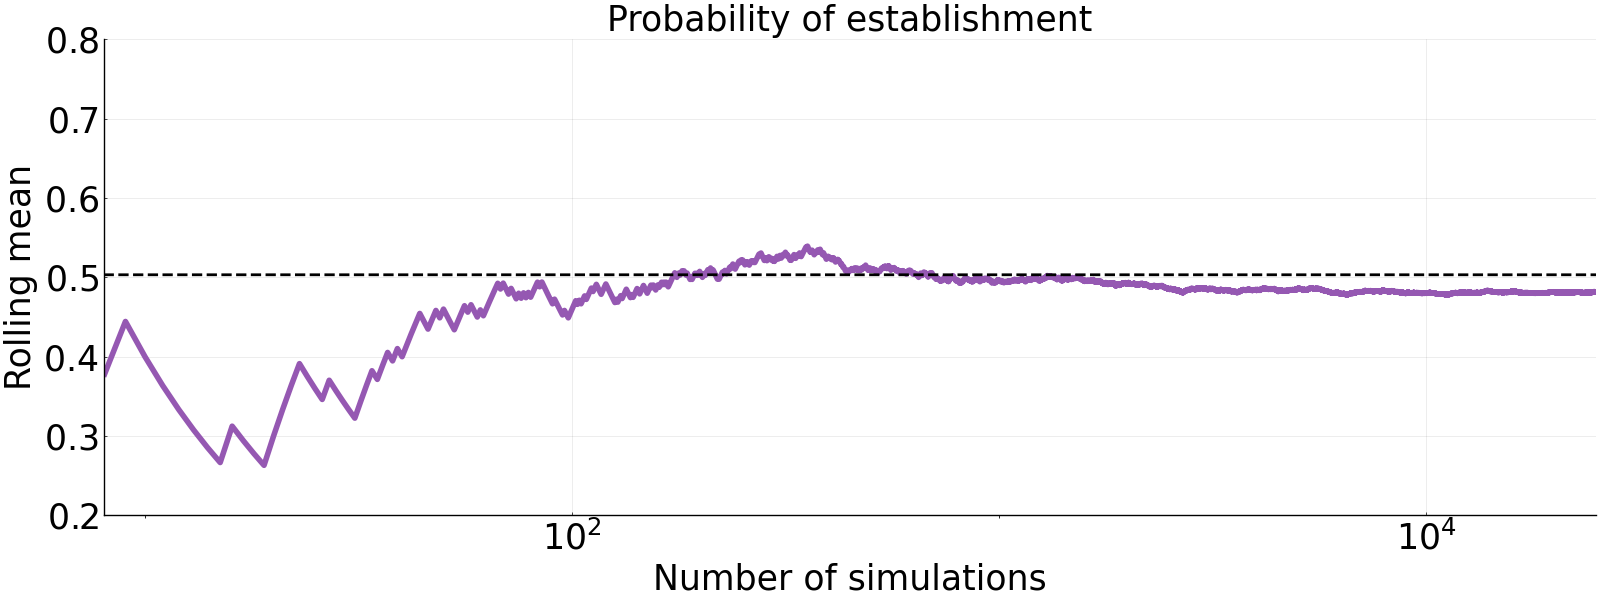

┌ Warning: Indices Base.OneTo(1) of attribute `seriesalpha` does not match data indices 1:25030.
└ @ Plots /Users/jessekreger/.julia/packages/Plots/Xv2qA/src/utils.jl:132
┌ Warning: Indices Base.OneTo(1) of attribute `linealpha` does not match data indices 1:25030.
└ @ Plots /Users/jessekreger/.julia/packages/Plots/Xv2qA/src/utils.jl:132
┌ Warning: Indices Base.OneTo(1) of attribute `fillalpha` does not match data indices 1:25030.
└ @ Plots /Users/jessekreger/.julia/packages/Plots/Xv2qA/src/utils.jl:132
┌ Warning: Indices Base.OneTo(1) of attribute `markeralpha` does not match data indices 1:25030.
└ @ Plots /Users/jessekreger/.julia/packages/Plots/Xv2qA/src/utils.jl:132
┌ Warning: Indices Base.OneTo(1) of attribute `markerstrokealpha` does not match data indices 1:25030.
└ @ Plots /Users/jessekreger/.julia/packages/Plots/Xv2qA/src/utils.jl:132
┌ Warning: Indices Base.OneTo(1) of attribute `seriesalpha` does not match data indices 1:25030.
└ @ Plots /Users/jessekreger/.julia/packages/P

In [45]:
plot()

success = 1 - (1 / (α₇*log(α₈) / (α₉*(α₃*α₁₂/(α₁*α₁₄+α₃*α₁₆))-α₁₁)))

plot!(vector, list2, xlims = (8, 25000), ylims = (0.2,0.8), xaxis = :log, lw = 4, size =(1600,600), font = "Ariel", color = logocolors.purple, alpha = [1], legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Number of simulations",xguidefontsize=25,ylabel="Rolling mean",yguidefontsize=25,title = "Probability of establishment",titlefontsize=25)
plot!(vector, [success], lw = 2, linestyle = :dash, size =(1600,600), font = "Ariel", color = "Black", alpha = [1], legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Number of simulations",xguidefontsize=25,ylabel="Rolling mean",yguidefontsize=25,title = "Probability of establishment",titlefontsize=25)

# Tumor fitting using Bayesian parameter estimation

In [146]:
using Turing, Distributions, DifferentialEquations

# Import MCMCChain, Plots, and StatsPlots for visualizations and diagnostics.
using MCMCChains, Plots, StatsPlots
using Plots; pyplot()

# Set a seed for reproducibility.
using Random
Random.seed!(14);

logocolors = Colors.JULIA_LOGO_COLORS

using KernelDensity

In [231]:
color1 = RGBA(113/255,46/255,103/255,1)
color2 = RGBA(38/255,117/255,146/255,1)
color3 = RGBA(95/255,177/255,42/255,1)
color4 = RGBA(199/255,200/255,0/255,1)
color5 = RGBA(255/255,121/255,23/255,1)
color6 = RGBA(226/255,58/255,52/255,1)

## Data

In [2]:
time_1 = [0,82,151,194,257,306,403]

tumor_1 = [1.15035E+11,1.24407E+11,37699111843.0,32044245067.0,6544984695.0,10995574288.0,0.0]
for i = 2:convert(Int64, length(tumor_1))
    tumor_1[i] = (tumor_1[i]-tumor_1[1])./tumor_1[1]
end
tumor_1[1] = 0


time_2 = [0,80,139,195,225,296]

tumor_2 = [1.12312E+11,51836278784.0,10995574288.0,17592918860.0,17592918860.0,26808257311.0]
for i = 2:convert(Int64, length(tumor_2))
    tumor_2[i] = (tumor_2[i]-tumor_2[1])./tumor_2[1]
end
tumor_2[1] = 0


time_3 = [0,82,125]

tumor_3 = [60475658.58,38170350.74,79482294.14]
for i = 2:convert(Int64, length(tumor_3))
    tumor_3[i] = (tumor_3[i]-tumor_3[1])./tumor_3[1]
end
tumor_3[1] = 0

time_4 = [0,76,132,189,244,301,356,412,475]

tumor_4 = [964633616.5,978113666.9,1019389796.0,1103437034.0,1227024723.0,1244837239.0,1626451211.0,1217072629.0,1917056386.0]
for i = 2:convert(Int64, length(tumor_4))
    tumor_4[i] = (tumor_4[i]-tumor_4[1])./tumor_4[1]
end
tumor_4[1] = 0

time_5 = [0,84,138]

tumor_5 = [1.02102E+11,1.42942E+11,1.43676E+11]
for i = 2:convert(Int64, length(tumor_5))
    tumor_5[i] = (tumor_5[i]-tumor_5[1])./tumor_5[1]
end
tumor_5[1] = 0

time_6 = [0,88,144,200]

tumor_6 = [2040618838.0,2651291357.0,3340932991.0,3879680945.0]
for i = 2:convert(Int64, length(tumor_6))
    tumor_6[i] = (tumor_6[i]-tumor_6[1])./tumor_6[1]
end
tumor_6[1] = 0

0

In [3]:
popfirst!(tumor_1)
popfirst!(time_1)
popfirst!(tumor_2)
popfirst!(time_2)
popfirst!(tumor_3)
popfirst!(time_3)
popfirst!(tumor_4)
popfirst!(time_4)
popfirst!(tumor_5)
popfirst!(time_5)
popfirst!(tumor_6)
popfirst!(time_6)

0

In [4]:
tumor_1

6-element Vector{Float64}:
  0.08147085669578824
 -0.6722813765984266
 -0.7214391701047508
 -0.9431044056591472
 -0.9044154015038901
 -1.0

In [5]:
tumor_2

5-element Vector{Float64}:
 -0.5384617958544056
 -0.902097956692072
 -0.8433567307144384
 -0.8433567307144384
 -0.7613054944173374

In [6]:
tumor_3

2-element Vector{Float64}:
 -0.36883116883288675
  0.31428571438965225

In [7]:
tumor_4

8-element Vector{Float64}:
 0.013974269784324872
 0.05676370651343561
 0.1438923702489483
 0.2720111574092131
 0.29047673407512853
 0.6860818275246164
 0.26169418956798296
 0.9873414664478469

In [8]:
tumor_5

2-element Vector{Float64}:
 0.39999216469804705
 0.40718105423987777

In [9]:
tumor_6

3-element Vector{Float64}:
 0.29925849336886307
 0.6372155979283378
 0.9012276436703168

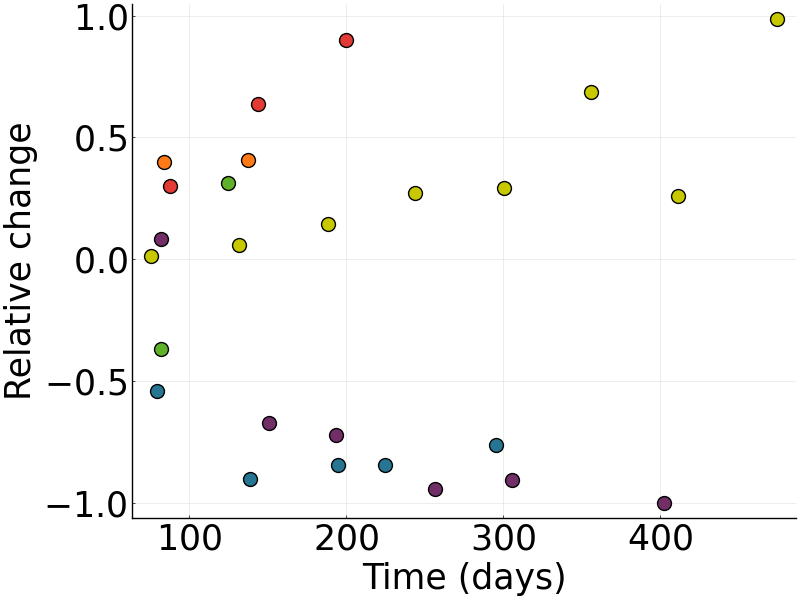

In [230]:
scatter()
scatter!(time_1, tumor_1, markersize = 10, size =(1600/2,600), font = "Ariel", color_palette = palette([color1, color1],2), legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (days)",xguidefontsize=25,ylabel="Relative change",yguidefontsize=25,title = "",titlefontsize=25)
scatter!(time_2, tumor_2, markersize = 10, size =(1600/2,600), font = "Ariel", color_palette = palette([color2, color2],2), legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (days)",xguidefontsize=25,ylabel="Relative change",yguidefontsize=25,title = "",titlefontsize=25)
scatter!(time_3, tumor_3, markersize = 10, size =(1600/2,600), font = "Ariel", color_palette = palette([color3, color3],2), legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (days)",xguidefontsize=25,ylabel="Relative change",yguidefontsize=25,title = "",titlefontsize=25)
scatter!(time_4, tumor_4, markersize = 10, size =(1600/2,600), font = "Ariel", color_palette = palette([color4, color4],2), legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (days)",xguidefontsize=25,ylabel="Relative change",yguidefontsize=25,title = "",titlefontsize=25)
scatter!(time_5, tumor_5, markersize = 10, size =(1600/2,600), font = "Ariel", color_palette = palette([color5, color5],2), legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (days)",xguidefontsize=25,ylabel="Relative change",yguidefontsize=25,title = "",titlefontsize=25)
scatter!(time_6, tumor_6, markersize = 10, size =(1600/2,600), font = "Ariel", color_palette = palette([color6, color6],2), legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (days)",xguidefontsize=25,ylabel="Relative change",yguidefontsize=25,title = "",titlefontsize=25)

## Model

In [11]:
#define model without delay
function ode_system(du,u,p,t)
    C,Mₘ,NK,T = u
    α₁₄, α₁₇, α₇ = p 
   
# Cancer cells (tumor)
    du[1] = α₇*C*log(abs(α₈/C)) - α₉*C*NK - α₁₀*C*T - α₁₁*C 
 # MDSC 
    du[2] = α₁ + α₂*C/(γ₁+(C^n)) - α₃*Mₘ 
 # NK cells
    du[3] = α₁₂ + α₁₃*(C^2)/(γ₂+(C^2)) - α₁₄*Mₘ*NK - α₁₆*NK 
 # T cells
    du[4] = α₁₇*C*NK + α₁₈*(C^2)/(γ₃+(C^2)) - α₁₉*Mₘ*T - α₂₁*T 
end

ode_system (generic function with 1 method)

In [12]:
#set numerical solution algorithm
alg = MethodOfSteps(Tsit5())

MethodOfSteps{Tsit5, NLFunctional{Rational{Int64}, Rational{Int64}}, false}(Tsit5(), NLFunctional{Rational{Int64}, Rational{Int64}}(1//100, 1//5, 10))

In [13]:
#define condition for simulation to end
function condition(u,t,integrator) 
  u[1] < 0.0 || u[2] < 0.0 || u[3] < 0.0 || u[4] < 0.0
end

floor_event = DiscreteCallback(condition, terminate!)

DiscreteCallback{typeof(condition), typeof(terminate!), typeof(DiffEqBase.INITIALIZE_DEFAULT), typeof(DiffEqBase.FINALIZE_DEFAULT)}(condition, SciMLBase.terminate!, DiffEqBase.INITIALIZE_DEFAULT, DiffEqBase.FINALIZE_DEFAULT, Bool[1, 1])

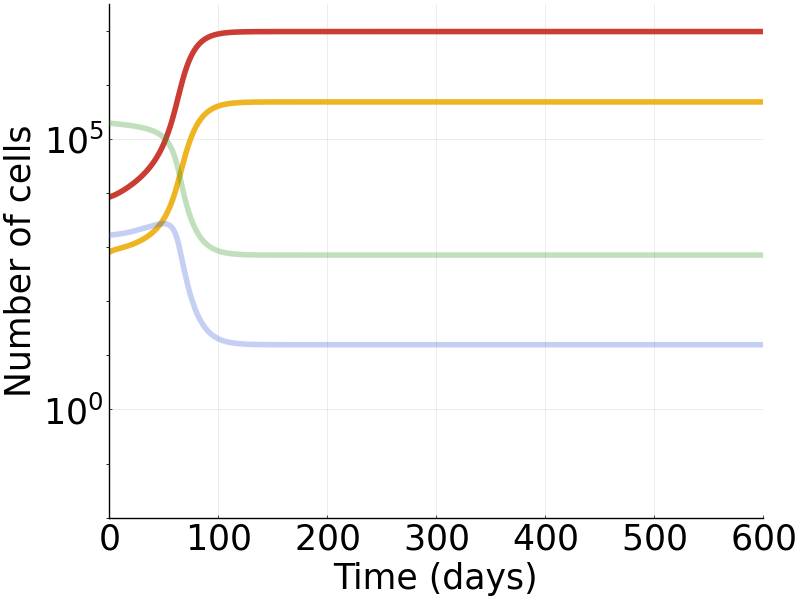

In [14]:
#set model parameters
n = 1.0

α₁ = 10.0*(10.0^1.0) #M-MDSCs production rate
α₂ = (10.0^8.0) #M-MDSCs expansion coefficient 
α₃ = 0.2 #M-MDSCs death rate

α₇ = 10.0^(-1.0) #tumor growth rate
α₈ = 10.0^7.0 #tumor maximum size 
α₉ = 3.5*(10.0^(-6.0)) #tumor cells kill rate by NK cells
α₁₀ = 1.1*(10.0^(-7.0)) #tumor cells kill rate by T cells
α₁₁ = 0.0 #tumor cell death rate

α₁₂ = 1.4*(10.0^4.0) #NK cells production rate
α₁₃ = 2.5*(10.0^(-2.0)) #NK cells expansion coefficient
α₁₄ = 4*(10.0^(-5.0)) #4*(10.0^(-5.0)) #NK cells inactivation rate by M-MDSCs
α₁₆ = 4.12*(10.0^(-2.0)) #NK cells death rate

α₁₇ = 1.1*(10.0^(-7.0)) #CTL stimulation as a result of tumor-NK cell interaction
α₁₈ = 10.0^(-1.0) #CTL expansion coefficient 
α₁₉ = (10.0^(-4.0)) #(10.0^(-4.0)) #CTL inactivation rate by M-MDSCs
α₂₁ = 2.0*(10.0^(-2.0)) #CTL death rate

γ₁ = (10.0^(10.0)) #steepness coefficient of MDSC production curve
γ₂ = 2.02*(10.0^(7.0)) #steepness coefficient of NK production curve
γ₃ = 2.02*(10.0^(7.0)) #steepness coefficient of CTL production curve

p = (α₁₄, α₁₇, α₇) 

tspan = (0.0,600.0)
u0 = [8395.368084462818, 804.0710624094437, 197565.74910954377, 1654.4182572290226] #100

prob1 = ODEProblem(ode_system,u0,tspan,p)
sol = solve(prob1,alg,saveat=0.1,callback=floor_event)
plot(sol, lw = 4, yaxis=:log,size =(1600/2,600), font = "Ariel", ylims = (0.01,10^7.5), color = [logocolors.red "goldenrod2" logocolors.green logocolors.blue], alpha = [1 1 0.3 0.3], legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (days)",xguidefontsize=25,ylabel="Number of cells",yguidefontsize=25,title = "",titlefontsize=25)

In [15]:
sol

retcode: Success
Interpolation: 1st order linear
t: 6001-element Vector{Float64}:
   0.0
   0.1
   0.2
   0.3
   0.4
   0.5
   0.6
   0.7
   0.8
   0.9
   1.0
   1.1
   1.2
   ⋮
 598.9
 599.0
 599.1
 599.2
 599.3
 599.4
 599.5
 599.6
 599.7
 599.8
 599.9
 600.0
u: 6001-element Vector{Vector{Float64}}:
 [8395.368084462818, 804.0710624094437, 197565.74910954377, 1654.4182572290226]
 [8409.322769759292, 806.3689447928673, 197515.62561503315, 1656.0451022156317]
 [8423.310448374805, 808.635158137783, 197464.07266011802, 1657.6435846504921]
 [8437.335287298156, 810.8703643080235, 197411.12639749824, 1659.2143607493174]
 [8451.401343192872, 813.0752158872804, 197356.82223281093, 1660.7580832581473]
 [8465.512475445648, 815.25035630204, 197301.1945533594, 1662.2754096788485]
 [8479.672443673388, 817.3964203029312, 197244.27705712392, 1663.7669929953026]
 [8493.884911492849, 819.5140339769426, 197186.1027652246, 1665.233481314969]
 [8508.153446520653, 821.6038147474236, 197126.70402192144, 166

## Fitting

In [16]:
Threads.nthreads()

10

In [17]:
α₈ = 10.0^(5.0)
α₈

100000.0

In [18]:
(α₈-u0[1])./u0[1]

10.911330032696064

In [19]:
time_to_fit1 = time_1
tumor_to_fit1 = tumor_1
tumor_curve_fit1 = zeros(length(tumor_to_fit1))
for i = 1:convert(Int64, length(tumor_to_fit1))
    tumor_curve_fit1[i] = tumor_to_fit1[i].*u0[1]+u0[1]
end

In [20]:
Turing.setadbackend(:forwarddiff)

@model function fitlv(data, prob1)
    
    α₁₄ ~ truncated(Normal(4.0*10.0^(-5.0),10.0^(-4.0)),0.0,10.0^(-2.0))
    α₁₇ ~ truncated(Normal(1.1*(10.0^(-7.0)),(10.0^(-6.0))),0.0,10.0^(-2.0))
    α₇ ~ truncated(Normal(10.0^(-1.0),3.0*10.0^(-1.0)),0.0,1.0)
    σ ~ InverseGamma(2, 3) 


    p = [α₁₄, α₁₇, α₇] 
    prob = remake(prob1, p=p)
    predicted = solve(prob,Tsit5(),saveat=time_to_fit1,callback=floor_event,reltol=1e-6,isoutofdomain=(u,p,t)->any(x->x<0,u)) 
    

    for i = 1:min(length(predicted),length(tumor_curve_fit1)) 

        data[i] ~ Normal(log.(predicted[i][1].+1), σ) 
    end

end

model = fitlv(log.(tumor_curve_fit1.+1), prob1) 

@time chain1 = sample(model, NUTS(0.65), MCMCThreads(), 2000, 4, progress=true)

┌ Warning: The current proposal will be rejected due to numerical error(s).
│   isfinite.((θ, r, ℓπ, ℓκ)) = (true, false, false, false)
└ @ AdvancedHMC /Users/jessekreger/.julia/packages/AdvancedHMC/kB7Xa/src/hamiltonian.jl:47
┌ Warning: The current proposal will be rejected due to numerical error(s).
│   isfinite.((θ, r, ℓπ, ℓκ)) = (true, false, false, false)
└ @ AdvancedHMC /Users/jessekreger/.julia/packages/AdvancedHMC/kB7Xa/src/hamiltonian.jl:47
┌ Warning: The current proposal will be rejected due to numerical error(s).
│   isfinite.((θ, r, ℓπ, ℓκ)) = (true, false, false, false)
└ @ AdvancedHMC /Users/jessekreger/.julia/packages/AdvancedHMC/kB7Xa/src/hamiltonian.jl:47
┌ Warning: The current proposal will be rejected due to numerical error(s).
│   isfinite.((θ, r, ℓπ, ℓκ)) = (true, false, false, false)
└ @ AdvancedHMC /Users/jessekreger/.julia/packages/AdvancedHMC/kB7Xa/src/hamiltonian.jl:47
┌ Warning: The current proposal will be rejected due to numerical error(s).
│   isfinite.((θ

150.298741 seconds (6.32 G allocations: 283.698 GiB, 36.61% gc time, 7.40% compilation time)


Chains MCMC chain (2000×16×4 Array{Float64, 3}):

Iterations        = 1001:1:3000
Number of chains  = 4
Samples per chain = 2000
Wall duration     = 125.86 seconds
Compute duration  = 492.8 seconds
parameters        = α₁₇, σ, α₁₄, α₇
internals         = lp, n_steps, is_accept, acceptance_rate, log_density, hamiltonian_energy, hamiltonian_energy_error, max_hamiltonian_energy_error, tree_depth, numerical_error, step_size, nom_step_size

Summary Statistics
  parameters      mean       std   naive_se      mcse         ess      rhat    ⋯
      Symbol   Float64   Float64    Float64   Float64     Float64   Float64    ⋯

         α₁₄    0.0001    0.0001     0.0000    0.0000   1398.5455    1.0013    ⋯
         α₁₇    0.0000    0.0000     0.0000    0.0000   2450.8177    1.0018    ⋯
          α₇    0.1633    0.0870     0.0010    0.0024   1387.3137    1.0036    ⋯
           σ    3.4419    1.1984     0.0134    0.0245   1807.4084    1.0013    ⋯
                                                       

In [21]:
time_to_fit2 = time_2
tumor_to_fit2 = tumor_2
tumor_curve_fit2 = zeros(length(tumor_to_fit2))
for i = 1:convert(Int64, length(tumor_to_fit2))
    tumor_curve_fit2[i] = tumor_to_fit2[i].*u0[1]+u0[1]
end

In [22]:
Turing.setadbackend(:forwarddiff)

@model function fitlv(data, prob1)
    
    α₁₄ ~ truncated(Normal(4.0*10.0^(-5.0),10.0^(-4.0)),0.0,10.0^(-2.0))
    α₁₇ ~ truncated(Normal(1.1*(10.0^(-7.0)),(10.0^(-6.0))),0.0,10.0^(-2.0))
    α₇ ~ truncated(Normal(10.0^(-1.0),3.0*10.0^(-1.0)),0.0,1.0)
    σ ~ InverseGamma(2, 3) 


    p = [α₁₄, α₁₇, α₇] 
    prob = remake(prob1, p=p)
    predicted = solve(prob,Tsit5(),saveat=time_to_fit2,callback=floor_event,reltol=1e-6,isoutofdomain=(u,p,t)->any(x->x<0,u)) 
    

    for i = 1:min(length(predicted),length(tumor_curve_fit2))

        data[i] ~ Normal(log.(predicted[i][1].+1), σ) 
    end

end

model = fitlv(log.(tumor_curve_fit2.+1), prob1) 

@time chain2 = sample(model, NUTS(0.65), MCMCThreads(), 2000, 4, progress=true)

┌ Warning: The current proposal will be rejected due to numerical error(s).
│   isfinite.((θ, r, ℓπ, ℓκ)) = (true, false, false, false)
└ @ AdvancedHMC /Users/jessekreger/.julia/packages/AdvancedHMC/kB7Xa/src/hamiltonian.jl:47
┌ Warning: The current proposal will be rejected due to numerical error(s).
│   isfinite.((θ, r, ℓπ, ℓκ)) = (true, false, false, false)
└ @ AdvancedHMC /Users/jessekreger/.julia/packages/AdvancedHMC/kB7Xa/src/hamiltonian.jl:47
┌ Warning: The current proposal will be rejected due to numerical error(s).
│   isfinite.((θ, r, ℓπ, ℓκ)) = (true, false, false, false)
└ @ AdvancedHMC /Users/jessekreger/.julia/packages/AdvancedHMC/kB7Xa/src/hamiltonian.jl:47
┌ Warning: The current proposal will be rejected due to numerical error(s).
│   isfinite.((θ, r, ℓπ, ℓκ)) = (true, false, false, false)
└ @ AdvancedHMC /Users/jessekreger/.julia/packages/AdvancedHMC/kB7Xa/src/hamiltonian.jl:47
┌ Warning: The current proposal will be rejected due to numerical error(s).
│   isfinite.((θ

145.504915 seconds (8.29 G allocations: 372.423 GiB, 48.45% gc time, 6.47% compilation time)


Chains MCMC chain (2000×16×4 Array{Float64, 3}):

Iterations        = 1001:1:3000
Number of chains  = 4
Samples per chain = 2000
Wall duration     = 143.49 seconds
Compute duration  = 537.61 seconds
parameters        = α₁₇, σ, α₁₄, α₇
internals         = lp, n_steps, is_accept, acceptance_rate, log_density, hamiltonian_energy, hamiltonian_energy_error, max_hamiltonian_energy_error, tree_depth, numerical_error, step_size, nom_step_size

Summary Statistics
  parameters      mean       std   naive_se      mcse        ess      rhat   e ⋯
      Symbol   Float64   Float64    Float64   Float64    Float64   Float64     ⋯

         α₁₄    0.0001    0.0001     0.0000    0.0000    29.5691    1.3689     ⋯
         α₁₇    0.0000    0.0000     0.0000    0.0000    89.9702    1.0841     ⋯
          α₇    0.1698    0.0669     0.0007    0.0052    48.2840    1.1763     ⋯
           σ    0.8941    0.4185     0.0047    0.0206   191.7411    1.0379     ⋯
                                                      

In [23]:
time_to_fit3 = time_3
tumor_to_fit3 = tumor_3
tumor_curve_fit3 = zeros(length(tumor_to_fit3))
for i = 1:convert(Int64, length(tumor_to_fit3))
    tumor_curve_fit3[i] = tumor_to_fit3[i].*u0[1]+u0[1]
end

In [24]:
Turing.setadbackend(:forwarddiff)

@model function fitlv(data, prob1)
    
    α₁₄ ~ truncated(Normal(4.0*10.0^(-5.0),10.0^(-4.0)),0.0,10.0^(-2.0))
    α₁₇ ~ truncated(Normal(1.1*(10.0^(-7.0)),(10.0^(-6.0))),0.0,10.0^(-2.0))
    α₇ ~ truncated(Normal(10.0^(-1.0),3.0*10.0^(-1.0)),0.0,1.0)
    σ ~ InverseGamma(2, 3) 


    p = [α₁₄, α₁₇, α₇] 
    prob = remake(prob1, p=p)
    predicted = solve(prob,Tsit5(),saveat=time_to_fit3,callback=floor_event,reltol=1e-6,isoutofdomain=(u,p,t)->any(x->x<0,u)) 
    

    for i = 1:min(length(predicted),length(tumor_curve_fit3)) 

        data[i] ~ Normal(log.(predicted[i][1].+1), σ) 
    end

end

model = fitlv(log.(tumor_curve_fit3.+1), prob1) 

@time chain3 = sample(model, NUTS(0.65), MCMCThreads(), 2000, 4, progress=true)

┌ Warning: The current proposal will be rejected due to numerical error(s).
│   isfinite.((θ, r, ℓπ, ℓκ)) = (true, false, false, false)
└ @ AdvancedHMC /Users/jessekreger/.julia/packages/AdvancedHMC/kB7Xa/src/hamiltonian.jl:47
┌ Warning: The current proposal will be rejected due to numerical error(s).
│   isfinite.((θ, r, ℓπ, ℓκ)) = (true, false, false, false)
└ @ AdvancedHMC /Users/jessekreger/.julia/packages/AdvancedHMC/kB7Xa/src/hamiltonian.jl:47
┌ Warning: The current proposal will be rejected due to numerical error(s).
│   isfinite.((θ, r, ℓπ, ℓκ)) = (true, false, false, false)
└ @ AdvancedHMC /Users/jessekreger/.julia/packages/AdvancedHMC/kB7Xa/src/hamiltonian.jl:47
┌ Warning: The current proposal will be rejected due to numerical error(s).
│   isfinite.((θ, r, ℓπ, ℓκ)) = (true, false, false, false)
└ @ AdvancedHMC /Users/jessekreger/.julia/packages/AdvancedHMC/kB7Xa/src/hamiltonian.jl:47
┌ Warning: The current proposal will be rejected due to numerical error(s).
│   isfinite.((θ

130.571914 seconds (7.56 G allocations: 339.462 GiB, 49.24% gc time, 2.80% compilation time)


Chains MCMC chain (2000×16×4 Array{Float64, 3}):

Iterations        = 1001:1:3000
Number of chains  = 4
Samples per chain = 2000
Wall duration     = 128.45 seconds
Compute duration  = 502.82 seconds
parameters        = α₁₇, σ, α₁₄, α₇
internals         = lp, n_steps, is_accept, acceptance_rate, log_density, hamiltonian_energy, hamiltonian_energy_error, max_hamiltonian_energy_error, tree_depth, numerical_error, step_size, nom_step_size

Summary Statistics
  parameters      mean       std   naive_se      mcse        ess      rhat   e ⋯
      Symbol   Float64   Float64    Float64   Float64    Float64   Float64     ⋯

         α₁₄    0.0001    0.0001     0.0000    0.0000   992.0375    1.0026     ⋯
         α₁₇    0.0000    0.0000     0.0000    0.0000   982.9415    1.0008     ⋯
          α₇    0.2833    0.1480     0.0017    0.0062   314.3805    1.0265     ⋯
           σ    1.6782    1.2074     0.0135    0.0459   345.4885    1.0268     ⋯
                                                      

In [25]:
time_to_fit4 = time_4
tumor_to_fit4 = tumor_4
tumor_curve_fit4 = zeros(length(tumor_to_fit4))
for i = 1:convert(Int64, length(tumor_to_fit4))
    tumor_curve_fit4[i] = tumor_to_fit4[i].*u0[1]+u0[1]
end

In [26]:
Turing.setadbackend(:forwarddiff)

@model function fitlv(data, prob1)
    
    α₁₄ ~ truncated(Normal(4.0*10.0^(-5.0),10.0^(-4.0)),0.0,10.0^(-2.0))
    α₁₇ ~ truncated(Normal(1.1*(10.0^(-7.0)),(10.0^(-6.0))),0.0,10.0^(-2.0))
    α₇ ~ truncated(Normal(10.0^(-1.0),3.0*10.0^(-1.0)),0.0,1.0)
    σ ~ InverseGamma(2, 3) 


    p = [α₁₄, α₁₇, α₇] 
    prob = remake(prob1, p=p)
    predicted = solve(prob,Tsit5(),saveat=time_to_fit4,callback=floor_event,reltol=1e-6,isoutofdomain=(u,p,t)->any(x->x<0,u)) 
    

    for i = 1:min(length(predicted),length(tumor_curve_fit4)) 

        data[i] ~ Normal(log.(predicted[i][1].+1), σ)
    end

end

model = fitlv(log.(tumor_curve_fit4.+1), prob1) 

@time chain4 = sample(model, NUTS(0.65), MCMCThreads(), 2000, 4, progress=true)

┌ Warning: The current proposal will be rejected due to numerical error(s).
│   isfinite.((θ, r, ℓπ, ℓκ)) = (true, false, false, false)
└ @ AdvancedHMC /Users/jessekreger/.julia/packages/AdvancedHMC/kB7Xa/src/hamiltonian.jl:47
┌ Warning: The current proposal will be rejected due to numerical error(s).
│   isfinite.((θ, r, ℓπ, ℓκ)) = (true, false, false, false)
└ @ AdvancedHMC /Users/jessekreger/.julia/packages/AdvancedHMC/kB7Xa/src/hamiltonian.jl:47
┌ Warning: The current proposal will be rejected due to numerical error(s).
│   isfinite.((θ, r, ℓπ, ℓκ)) = (true, false, false, false)
└ @ AdvancedHMC /Users/jessekreger/.julia/packages/AdvancedHMC/kB7Xa/src/hamiltonian.jl:47
┌ Warning: The current proposal will be rejected due to numerical error(s).
│   isfinite.((θ, r, ℓπ, ℓκ)) = (true, false, false, false)
└ @ AdvancedHMC /Users/jessekreger/.julia/packages/AdvancedHMC/kB7Xa/src/hamiltonian.jl:47
┌ Warning: The current proposal will be rejected due to numerical error(s).
│   isfinite.((θ

226.222891 seconds (11.59 G allocations: 520.971 GiB, 43.88% gc time, 4.18% compilation time)


Chains MCMC chain (2000×16×4 Array{Float64, 3}):

Iterations        = 1001:1:3000
Number of chains  = 4
Samples per chain = 2000
Wall duration     = 224.15 seconds
Compute duration  = 707.1 seconds
parameters        = α₁₇, σ, α₁₄, α₇
internals         = lp, n_steps, is_accept, acceptance_rate, log_density, hamiltonian_energy, hamiltonian_energy_error, max_hamiltonian_energy_error, tree_depth, numerical_error, step_size, nom_step_size

Summary Statistics
  parameters      mean       std   naive_se      mcse       ess      rhat   es ⋯
      Symbol   Float64   Float64    Float64   Float64   Float64   Float64      ⋯

         α₁₄    0.0000    0.0000     0.0000    0.0000   69.3349    1.1038      ⋯
         α₁₇    0.0000    0.0000     0.0000    0.0000   95.0390    1.0778      ⋯
          α₇    0.3600    0.0914     0.0010    0.0065   87.5633    1.0788      ⋯
           σ    0.4978    0.1852     0.0021    0.0133   76.9523    1.0468      ⋯
                                                       

In [27]:
time_to_fit5 = time_5
tumor_to_fit5 = tumor_5
tumor_curve_fit5 = zeros(length(tumor_to_fit5))
for i = 1:convert(Int64, length(tumor_to_fit5))
    tumor_curve_fit5[i] = tumor_to_fit5[i].*u0[1]+u0[1]
end

In [28]:
Turing.setadbackend(:forwarddiff)

@model function fitlv(data, prob1)
    
    α₁₄ ~ truncated(Normal(4.0*10.0^(-5.0),10.0^(-4.0)),0.0,10.0^(-2.0))
    α₁₇ ~ truncated(Normal(1.1*(10.0^(-7.0)),(10.0^(-6.0))),0.0,10.0^(-2.0))
    α₇ ~ truncated(Normal(10.0^(-1.0),3.0*10.0^(-1.0)),0.0,1.0)
    σ ~ InverseGamma(2, 3) 


    p = [α₁₄, α₁₇, α₇] 
    prob = remake(prob1, p=p)
    predicted = solve(prob,Tsit5(),saveat=time_to_fit5,callback=floor_event,reltol=1e-6,isoutofdomain=(u,p,t)->any(x->x<0,u)) 
    

    for i = 1:min(length(predicted),length(tumor_curve_fit5)) 

        data[i] ~ Normal(log.(predicted[i][1].+1), σ) 
    end

end

model = fitlv(log.(tumor_curve_fit5.+1), prob1) 

@time chain5 = sample(model, NUTS(0.65), MCMCThreads(), 2000, 4, progress=true)

┌ Warning: The current proposal will be rejected due to numerical error(s).
│   isfinite.((θ, r, ℓπ, ℓκ)) = (true, false, false, false)
└ @ AdvancedHMC /Users/jessekreger/.julia/packages/AdvancedHMC/kB7Xa/src/hamiltonian.jl:47
┌ Warning: The current proposal will be rejected due to numerical error(s).
│   isfinite.((θ, r, ℓπ, ℓκ)) = (true, false, false, false)
└ @ AdvancedHMC /Users/jessekreger/.julia/packages/AdvancedHMC/kB7Xa/src/hamiltonian.jl:47
┌ Warning: The current proposal will be rejected due to numerical error(s).
│   isfinite.((θ, r, ℓπ, ℓκ)) = (true, false, false, false)
└ @ AdvancedHMC /Users/jessekreger/.julia/packages/AdvancedHMC/kB7Xa/src/hamiltonian.jl:47
┌ Warning: The current proposal will be rejected due to numerical error(s).
│   isfinite.((θ, r, ℓπ, ℓκ)) = (true, false, false, false)
└ @ AdvancedHMC /Users/jessekreger/.julia/packages/AdvancedHMC/kB7Xa/src/hamiltonian.jl:47
┌ Warning: The current proposal will be rejected due to numerical error(s).
│   isfinite.((θ

125.464468 seconds (7.19 G allocations: 322.832 GiB, 48.54% gc time, 1.94% compilation time)


Chains MCMC chain (2000×16×4 Array{Float64, 3}):

Iterations        = 1001:1:3000
Number of chains  = 4
Samples per chain = 2000
Wall duration     = 123.48 seconds
Compute duration  = 478.18 seconds
parameters        = α₁₇, σ, α₁₄, α₇
internals         = lp, n_steps, is_accept, acceptance_rate, log_density, hamiltonian_energy, hamiltonian_energy_error, max_hamiltonian_energy_error, tree_depth, numerical_error, step_size, nom_step_size

Summary Statistics
  parameters      mean       std   naive_se      mcse         ess      rhat    ⋯
      Symbol   Float64   Float64    Float64   Float64     Float64   Float64    ⋯

         α₁₄    0.0001    0.0001     0.0000    0.0000   2037.9641    1.0014    ⋯
         α₁₇    0.0000    0.0000     0.0000    0.0000   1577.3670    1.0030    ⋯
          α₇    0.3306    0.1531     0.0017    0.0040   1540.3498    1.0010    ⋯
           σ    1.6737    1.1690     0.0131    0.0328   1558.0410    1.0024    ⋯
                                                      

In [29]:
time_to_fit6 = time_6
tumor_to_fit6 = tumor_6
tumor_curve_fit6 = zeros(length(tumor_to_fit6))
for i = 1:convert(Int64, length(tumor_to_fit6))
    tumor_curve_fit6[i] = tumor_to_fit6[i].*u0[1]+u0[1]
end

In [30]:
Turing.setadbackend(:forwarddiff)

@model function fitlv(data, prob1)
    
    α₁₄ ~ truncated(Normal(4.0*10.0^(-5.0),10.0^(-4.0)),0.0,10.0^(-2.0))
    α₁₇ ~ truncated(Normal(1.1*(10.0^(-7.0)),(10.0^(-6.0))),0.0,10.0^(-2.0))
    α₇ ~ truncated(Normal(10.0^(-1.0),3.0*10.0^(-1.0)),0.0,1.0)
    σ ~ InverseGamma(2, 3) 


    p = [α₁₄, α₁₇, α₇] 
    prob = remake(prob1, p=p)
    predicted = solve(prob,Tsit5(),saveat=time_to_fit6,callback=floor_event,reltol=1e-6,isoutofdomain=(u,p,t)->any(x->x<0,u)) 
    

    for i = 1:min(length(predicted),length(tumor_curve_fit6)) 

        data[i] ~ Normal(log.(predicted[i][1].+1), σ) 
    end

end

model = fitlv(log.(tumor_curve_fit6.+1), prob1) 

@time chain6 = sample(model, NUTS(0.65), MCMCThreads(), 2000, 4, progress=true)

┌ Warning: The current proposal will be rejected due to numerical error(s).
│   isfinite.((θ, r, ℓπ, ℓκ)) = (true, false, false, false)
└ @ AdvancedHMC /Users/jessekreger/.julia/packages/AdvancedHMC/kB7Xa/src/hamiltonian.jl:47
┌ Warning: The current proposal will be rejected due to numerical error(s).
│   isfinite.((θ, r, ℓπ, ℓκ)) = (true, false, false, false)
└ @ AdvancedHMC /Users/jessekreger/.julia/packages/AdvancedHMC/kB7Xa/src/hamiltonian.jl:47
┌ Warning: The current proposal will be rejected due to numerical error(s).
│   isfinite.((θ, r, ℓπ, ℓκ)) = (true, false, false, false)
└ @ AdvancedHMC /Users/jessekreger/.julia/packages/AdvancedHMC/kB7Xa/src/hamiltonian.jl:47
┌ Warning: The current proposal will be rejected due to numerical error(s).
│   isfinite.((θ, r, ℓπ, ℓκ)) = (true, false, false, false)
└ @ AdvancedHMC /Users/jessekreger/.julia/packages/AdvancedHMC/kB7Xa/src/hamiltonian.jl:47
┌ Warning: The current proposal will be rejected due to numerical error(s).
│   isfinite.((θ

153.345068 seconds (8.91 G allocations: 399.979 GiB, 49.44% gc time, 0.29% compilation time)


Chains MCMC chain (2000×16×4 Array{Float64, 3}):

Iterations        = 1001:1:3000
Number of chains  = 4
Samples per chain = 2000
Wall duration     = 151.36 seconds
Compute duration  = 583.64 seconds
parameters        = α₁₇, σ, α₁₄, α₇
internals         = lp, n_steps, is_accept, acceptance_rate, log_density, hamiltonian_energy, hamiltonian_energy_error, max_hamiltonian_energy_error, tree_depth, numerical_error, step_size, nom_step_size

Summary Statistics
  parameters      mean       std   naive_se      mcse        ess      rhat   e ⋯
      Symbol   Float64   Float64    Float64   Float64    Float64   Float64     ⋯

         α₁₄    0.0001    0.0001     0.0000    0.0000   574.0179    1.0055     ⋯
         α₁₇    0.0000    0.0000     0.0000    0.0000   187.0149    1.0144     ⋯
          α₇    0.3214    0.1472     0.0016    0.0072   235.7005    1.0178     ⋯
           σ    1.1471    0.7577     0.0085    0.0291   534.9714    1.0099     ⋯
                                                      

In [31]:
chain_array1 = Array(chain1)

8000×4 Matrix{Float64}:
 6.66337e-8   4.33057e-7  0.394627  2.2903
 1.46476e-7   1.94291e-6  0.251146  4.54375
 4.00351e-8   5.57863e-7  0.202096  5.71933
 1.85188e-5   1.18007e-6  0.241695  1.94747
 3.85708e-5   1.99785e-6  0.129849  3.08856
 2.16898e-5   1.83535e-7  0.277455  3.58247
 2.29713e-5   2.05978e-7  0.141498  3.25087
 5.48117e-5   4.6223e-7   0.233141  4.6955
 0.000129084  5.9903e-7   0.68682   5.42408
 5.47138e-5   7.92465e-7  0.169198  4.36185
 6.34872e-5   3.11733e-7  0.177014  5.41789
 3.21765e-5   2.41305e-7  0.177815  5.60028
 2.63641e-5   1.37504e-6  0.217566  2.46311
 ⋮                                  
 4.65776e-6   4.13726e-7  0.145745  5.83954
 0.00017717   8.8139e-8   0.186742  6.64013
 0.00025754   7.90724e-8  0.211335  6.38558
 0.000167994  1.11546e-7  0.243373  7.26331
 1.27111e-5   2.6179e-8   0.127929  3.45469
 1.34836e-5   2.55675e-8  0.13328   3.82508
 2.19711e-5   8.64899e-8  0.275213  2.89929
 7.24596e-6   1.68295e-8  0.232651  3.63962
 1.19532e-5   8.4

In [32]:
chain_array2 = Array(chain2)

8000×4 Matrix{Float64}:
 1.35305e-6  1.23126e-6  0.266368  0.642184
 1.66798e-6  6.63169e-7  0.291399  0.709754
 1.02968e-5  6.5253e-7   0.257418  0.954495
 1.33406e-5  1.95953e-6  0.265947  1.30214
 3.2662e-5   1.02269e-6  0.240528  1.16404
 1.15044e-5  1.09372e-6  0.251549  0.516377
 5.51658e-6  1.54428e-6  0.268964  0.866994
 1.95499e-5  6.42206e-8  0.239044  0.573877
 2.71919e-5  1.58762e-7  0.203521  0.748742
 3.58026e-5  4.44009e-7  0.199329  0.681825
 2.90139e-5  5.6063e-7   0.201131  0.617752
 1.80569e-5  7.78886e-7  0.23652   1.06445
 1.93577e-5  1.38534e-6  0.248915  0.723031
 ⋮                                 
 8.05795e-5  4.80906e-7  0.137171  1.24377
 5.89149e-5  2.75695e-7  0.15969   0.76649
 2.99573e-5  1.06007e-6  0.206526  0.560027
 1.63794e-5  1.53293e-6  0.23343   0.518478
 1.55455e-5  1.01118e-6  0.222621  0.504305
 4.54266e-5  3.26764e-6  0.182667  0.640067
 3.84232e-5  6.11682e-8  0.177007  0.765579
 4.36175e-5  2.91687e-7  0.195793  0.50896
 4.18028e-5  2.73396e-

In [33]:
chain_array3 = Array(chain3)

8000×4 Matrix{Float64}:
 9.83344e-5   1.93109e-7  0.152249   1.13692
 0.000139722  3.28197e-7  0.128373   1.09116
 0.000139722  3.28197e-7  0.128373   1.09116
 0.000103067  1.70483e-7  0.140311   1.06376
 0.000103067  1.70483e-7  0.140311   1.06376
 0.000103067  1.70483e-7  0.140311   1.06376
 0.000103067  1.70483e-7  0.140311   1.06376
 0.000130823  1.91709e-6  0.0990543  1.79404
 0.000163201  1.25847e-6  0.0853212  2.13577
 0.000217231  3.39084e-7  0.106601   2.8215
 0.000121337  5.92347e-7  0.100624   2.82661
 9.26692e-5   1.16579e-6  0.225239   1.1822
 9.30371e-5   2.5435e-7   0.198195   1.37132
 ⋮                                   
 2.41279e-5   1.88208e-6  0.313915   0.80689
 2.41279e-5   1.88208e-6  0.313915   0.80689
 3.36031e-5   1.72103e-6  0.37997    0.692605
 1.60097e-5   1.81523e-6  0.274076   0.894888
 5.19829e-6   4.18972e-7  0.428187   1.4679
 5.78971e-6   1.81896e-6  0.356417   0.982
 0.000121278  4.93381e-7  0.573359   2.49915
 0.000205572  2.52521e-7  0.205381   3.18

In [34]:
chain_array4 = Array(chain4)

8000×4 Matrix{Float64}:
 9.77838e-6  4.69987e-7  0.40731   0.489843
 1.54166e-5  5.60298e-7  0.429277  0.564692
 1.11233e-5  7.90357e-7  0.39362   0.410159
 7.83329e-6  8.48414e-7  0.478485  0.41003
 1.02378e-5  8.82001e-7  0.383433  0.391139
 1.53458e-5  1.17346e-6  0.418343  0.367059
 1.59494e-5  1.18342e-6  0.414422  0.357932
 1.56889e-5  1.68516e-6  0.397134  0.369388
 1.51273e-5  2.19276e-6  0.421013  0.425186
 1.11765e-6  1.55639e-7  0.489952  0.437104
 8.74426e-6  1.12382e-7  0.498591  0.706935
 9.26935e-6  2.02638e-7  0.456161  0.290059
 3.79029e-6  7.30518e-7  0.493628  0.526734
 ⋮                                 
 1.21243e-5  1.06342e-6  0.409357  0.371425
 1.75263e-5  9.94305e-7  0.375204  0.319359
 3.3161e-5   1.81666e-6  0.297608  0.386458
 1.3617e-5   9.77875e-7  0.398293  0.356123
 4.10036e-5  1.15895e-6  0.264014  0.404274
 3.3923e-5   1.19645e-7  0.288408  0.352208
 3.71895e-5  4.02843e-7  0.283857  0.501709
 2.51257e-5  3.11508e-7  0.326349  0.638026
 3.39051e-5  3.71

In [35]:
chain_array5 = Array(chain5)

8000×4 Matrix{Float64}:
 2.23239e-5   5.83195e-7  0.460794  0.858412
 1.33394e-5   2.18047e-7  0.375908  1.21773
 1.46915e-5   1.24597e-7  0.41521   0.855118
 2.37996e-5   1.37996e-7  0.378461  0.563262
 2.37996e-5   1.37996e-7  0.378461  0.563262
 2.37996e-5   1.37996e-7  0.378461  0.563262
 2.37996e-5   1.37996e-7  0.378461  0.563262
 2.37996e-5   1.37996e-7  0.378461  0.563262
 2.37996e-5   1.37996e-7  0.378461  0.563262
 2.37996e-5   1.37996e-7  0.378461  0.563262
 7.33457e-6   1.74278e-7  0.466551  0.408475
 7.8442e-5    1.58855e-7  0.261576  2.10215
 0.00018557   1.1113e-6   0.414237  1.61902
 ⋮                                  
 5.22372e-5   2.49452e-7  0.141258  3.36448
 1.94819e-5   5.85901e-7  0.367337  1.45095
 2.0111e-5    1.08796e-6  0.227148  1.37761
 0.000118913  1.08125e-6  0.422914  1.39115
 0.000124793  1.0798e-6   0.140761  1.27044
 0.000142914  1.22292e-6  0.201654  1.54506
 4.93291e-5   1.55826e-6  0.200831  2.9909
 6.0917e-5    1.98259e-6  0.213691  2.89837
 0.000

In [36]:
chain_array6 = Array(chain6)

8000×4 Matrix{Float64}:
 4.15837e-5   5.8967e-7   0.257662  0.80694
 4.15837e-5   5.8967e-7   0.257662  0.80694
 4.48328e-5   5.08952e-7  0.280712  0.456815
 4.48328e-5   5.08952e-7  0.280712  0.456815
 4.48328e-5   5.08952e-7  0.280712  0.456815
 4.48328e-5   5.08952e-7  0.280712  0.456815
 4.48328e-5   5.08952e-7  0.280712  0.456815
 1.12692e-5   7.52643e-7  0.530146  2.00804
 0.000117047  1.64579e-6  0.394932  1.80599
 0.000118175  1.92348e-6  0.389093  1.60841
 7.89536e-5   3.69217e-7  0.182171  1.62086
 5.3438e-5    2.47223e-7  0.398291  2.60419
 4.02998e-5   3.43342e-7  0.259692  1.79779
 ⋮                                  
 8.18517e-5   1.12536e-6  0.185583  0.470637
 8.18517e-5   1.12536e-6  0.185583  0.470637
 8.18517e-5   1.12536e-6  0.185583  0.470637
 8.18517e-5   1.12536e-6  0.185583  0.470637
 8.18517e-5   1.12536e-6  0.185583  0.470637
 8.18517e-5   1.12536e-6  0.185583  0.470637
 8.18517e-5   1.12536e-6  0.185583  0.470637
 8.18517e-5   1.12536e-6  0.185583  0.470637
 8

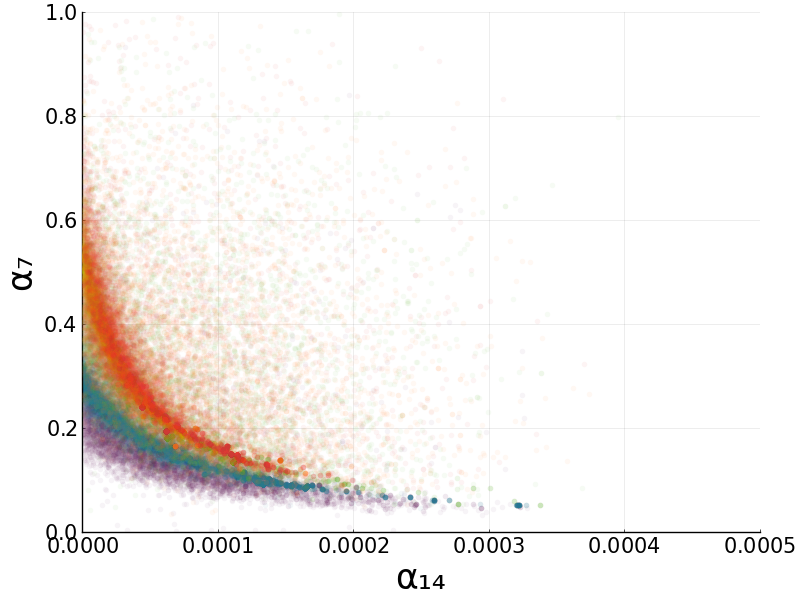

In [273]:
scatter()
scatter!(chain_array1[:,1], chain_array1[:,3], markercolor = palette([color1, color1],2), markerstrokewidth = 0, markeralpha = 0.05, xlims = (0, 0.0005), ylims = (0,1), xlab = "α₁₄", ylab = "α₇", legend = :false, size = (1600/2,600), font = "Ariel", xtickfontsize=15,ytickfontsize=15,xguidefontsize=25,yguidefontsize=25,titlefontsize=25)
scatter!(chain_array2[:,1], chain_array2[:,3], markercolor = palette([color2, color2],2), markerstrokewidth = 0, markeralpha = 0.05, xlims = (0, 0.0005), ylims = (0,1), xlab = "α₁₄", ylab = "α₇", legend = :false, size = (1600/2,600), font = "Ariel", xtickfontsize=15,ytickfontsize=15,xguidefontsize=25,yguidefontsize=25,titlefontsize=25)
scatter!(chain_array3[:,1], chain_array3[:,3], markercolor = palette([color3, color3],2), markerstrokewidth = 0, markeralpha = 0.05, xlims = (0, 0.0005), ylims = (0,1), xlab = "α₁₄", ylab = "α₇", legend = :false, size = (1600/2,600), font = "Ariel", xtickfontsize=15,ytickfontsize=15,xguidefontsize=25,yguidefontsize=25,titlefontsize=25)
scatter!(chain_array4[:,1], chain_array4[:,3], markercolor = palette([color4, color4],2), markerstrokewidth = 0, markeralpha = 0.05, xlims = (0, 0.0005), ylims = (0,1), xlab = "α₁₄", ylab = "α₇", legend = :false, size = (1600/2,600), font = "Ariel", xtickfontsize=15,ytickfontsize=15,xguidefontsize=25,yguidefontsize=25,titlefontsize=25)
scatter!(chain_array5[:,1], chain_array5[:,3], markercolor = palette([color5, color5],2), markerstrokewidth = 0, markeralpha = 0.05, xlims = (0, 0.0005), ylims = (0,1), xlab = "α₁₄", ylab = "α₇", legend = :false, size = (1600/2,600), font = "Ariel", xtickfontsize=15,ytickfontsize=15,xguidefontsize=25,yguidefontsize=25,titlefontsize=25)
scatter!(chain_array6[:,1], chain_array6[:,3], markercolor = palette([color6, color6],2), markerstrokewidth = 0, markeralpha = 0.05, xlims = (0, 0.0005), ylims = (0,1), xlab = "α₁₄", ylab = "α₇", legend = :false, size = (1600/2,600), font = "Ariel", xtickfontsize=15,ytickfontsize=15,xguidefontsize=25,yguidefontsize=25,titlefontsize=25)

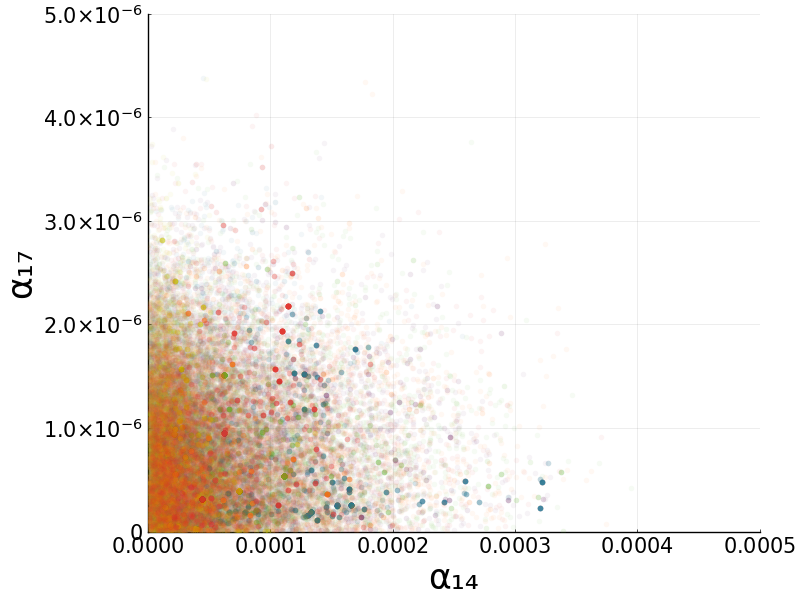

In [252]:
scatter()
scatter!(chain_array1[:,1], chain_array1[:,2], markercolor = palette([color1, color1],2), markerstrokewidth = 0, markeralpha = 0.05, xlims = (0, 0.0005), ylims = (0,5*10^(-6)), xlab = "α₁₄", ylab = "α₁₇", legend = :false, size = (1600/2,600), font = "Ariel", xtickfontsize=15,ytickfontsize=15,xguidefontsize=25,yguidefontsize=25,titlefontsize=25)
scatter!(chain_array2[:,1], chain_array2[:,2], markercolor = palette([color2, color2],2), markerstrokewidth = 0, markeralpha = 0.05, xlims = (0, 0.0005), ylims = (0,5*10^(-6)), xlab = "α₁₄", ylab = "α₁₇", legend = :false, size = (1600/2,600), font = "Ariel", xtickfontsize=15,ytickfontsize=15,xguidefontsize=25,yguidefontsize=25,titlefontsize=25)
scatter!(chain_array3[:,1], chain_array3[:,2], markercolor = palette([color3, color3],2), markerstrokewidth = 0, markeralpha = 0.05, xlims = (0, 0.0005), ylims = (0,5*10^(-6)), xlab = "α₁₄", ylab = "α₁₇", legend = :false, size = (1600/2,600), font = "Ariel", xtickfontsize=15,ytickfontsize=15,xguidefontsize=25,yguidefontsize=25,titlefontsize=25)
scatter!(chain_array4[:,1], chain_array4[:,2], markercolor = palette([color4, color4],2), markerstrokewidth = 0, markeralpha = 0.05, xlims = (0, 0.0005), ylims = (0,5*10^(-6)), xlab = "α₁₄", ylab = "α₁₇", legend = :false, size = (1600/2,600), font = "Ariel", xtickfontsize=15,ytickfontsize=15,xguidefontsize=25,yguidefontsize=25,titlefontsize=25)
scatter!(chain_array5[:,1], chain_array5[:,2], markercolor = palette([color5, color5],2), markerstrokewidth = 0, markeralpha = 0.05, xlims = (0, 0.0005), ylims = (0,5*10^(-6)), xlab = "α₁₄", ylab = "α₁₇", legend = :false, size = (1600/2,600), font = "Ariel", xtickfontsize=15,ytickfontsize=15,xguidefontsize=25,yguidefontsize=25,titlefontsize=25)
scatter!(chain_array6[:,1], chain_array6[:,2], markercolor = palette([color6, color6],2), markerstrokewidth = 0, markeralpha = 0.05, xlims = (0, 0.0005), ylims = (0,5*10^(-6)), xlab = "α₁₄", ylab = "α₁₇", legend = :false, size = (1600/2,600), font = "Ariel", xtickfontsize=15,ytickfontsize=15,xguidefontsize=25,yguidefontsize=25,titlefontsize=25)

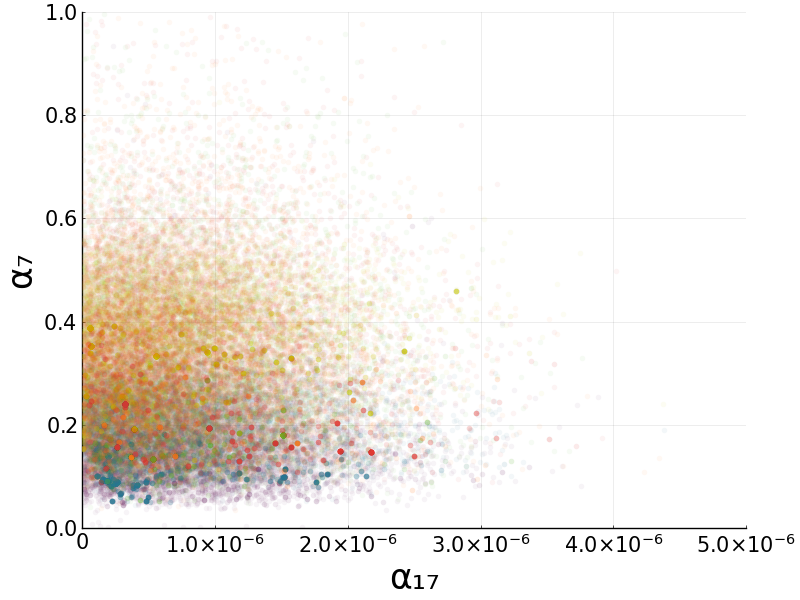

In [253]:
scatter()
scatter!(chain_array1[:,2], chain_array1[:,3], markercolor = palette([color1, color1],2), markerstrokewidth = 0, markeralpha = 0.05, xlims = (0,5*10^(-6)), ylims = (0,1), xlab = "α₁₇", ylab = "α₇", legend = :false, size = (1600/2,600), font = "Ariel", xtickfontsize=15,ytickfontsize=15,xguidefontsize=25,yguidefontsize=25,titlefontsize=25)
scatter!(chain_array2[:,2], chain_array2[:,3], markercolor = palette([color2, color2],2), markerstrokewidth = 0, markeralpha = 0.05, xlims = (0,5*10^(-6)), ylims = (0,1), xlab = "α₁₇", ylab = "α₇", legend = :false, size = (1600/2,600), font = "Ariel", xtickfontsize=15,ytickfontsize=15,xguidefontsize=25,yguidefontsize=25,titlefontsize=25)
scatter!(chain_array3[:,2], chain_array3[:,3], markercolor = palette([color3, color3],2), markerstrokewidth = 0, markeralpha = 0.05, xlims = (0,5*10^(-6)), ylims = (0,1), xlab = "α₁₇", ylab = "α₇", legend = :false, size = (1600/2,600), font = "Ariel", xtickfontsize=15,ytickfontsize=15,xguidefontsize=25,yguidefontsize=25,titlefontsize=25)
scatter!(chain_array4[:,2], chain_array4[:,3], markercolor = palette([color4, color4],2), markerstrokewidth = 0, markeralpha = 0.05, xlims = (0,5*10^(-6)), ylims = (0,1), xlab = "α₁₇", ylab = "α₇", legend = :false, size = (1600/2,600), font = "Ariel", xtickfontsize=15,ytickfontsize=15,xguidefontsize=25,yguidefontsize=25,titlefontsize=25)
scatter!(chain_array5[:,2], chain_array5[:,3], markercolor = palette([color5, color5],2), markerstrokewidth = 0, markeralpha = 0.05, xlims = (0,5*10^(-6)), ylims = (0,1), xlab = "α₁₇", ylab = "α₇", legend = :false, size = (1600/2,600), font = "Ariel", xtickfontsize=15,ytickfontsize=15,xguidefontsize=25,yguidefontsize=25,titlefontsize=25)
scatter!(chain_array6[:,2], chain_array6[:,3], markercolor = palette([color6, color6],2), markerstrokewidth = 0, markeralpha = 0.05, xlims = (0,5*10^(-6)), ylims = (0,1), xlab = "α₁₇", ylab = "α₇", legend = :false, size = (1600/2,600), font = "Ariel", xtickfontsize=15,ytickfontsize=15,xguidefontsize=25,yguidefontsize=25,titlefontsize=25)

In [243]:
kernel1 = kde((chain_array1[:,1], chain_array1[:,3]))
kernel2 = kde((chain_array2[:,1], chain_array2[:,3]))
kernel3 = kde((chain_array3[:,1], chain_array3[:,3]))
kernel4 = kde((chain_array4[:,1], chain_array4[:,3]))
kernel5 = kde((chain_array5[:,1], chain_array5[:,3]))
kernel6 = kde((chain_array6[:,1], chain_array6[:,3]))

ak1 = kde((chain_array1[:,1], chain_array1[:,2]))
ak2 = kde((chain_array2[:,1], chain_array2[:,2]))
ak3 = kde((chain_array3[:,1], chain_array3[:,2]))
ak4 = kde((chain_array4[:,1], chain_array4[:,2]))
ak5 = kde((chain_array5[:,1], chain_array5[:,2]))
ak6 = kde((chain_array6[:,1], chain_array6[:,2]))

bk1 = kde((chain_array1[:,2], chain_array1[:,3]))
bk2 = kde((chain_array2[:,2], chain_array2[:,3]))
bk3 = kde((chain_array3[:,2], chain_array3[:,3]))
bk4 = kde((chain_array4[:,2], chain_array4[:,3]))
bk5 = kde((chain_array5[:,2], chain_array5[:,3]))
bk6 = kde((chain_array6[:,2], chain_array6[:,3]))

BivariateKDE{StepRangeLen{Float64, Base.TwicePrecision{Float64}, Base.TwicePrecision{Float64}}, StepRangeLen{Float64, Base.TwicePrecision{Float64}, Base.TwicePrecision{Float64}}}(-3.866327362717415e-7:1.8805192562545305e-8:4.4086913671773115e-6, -0.017582414337859856:0.0042942220764186426:1.077444215148894, [2.644251212441384e-5 3.8283544957551374e-5 … 8.482837643808416e-5 3.9377874643975463e-5; 5.9370398249602996e-5 8.620893755956205e-5 … 0.0001895293224229988 8.808956865880013e-5; … ; 4.710182711642474e-6 6.791418499352275e-6 … 1.5224862023432983e-5 7.053876395657355e-6; 1.1362543666626479e-5 1.6411974422703146e-5 … 3.660313081921274e-5 1.6973511173579148e-5])

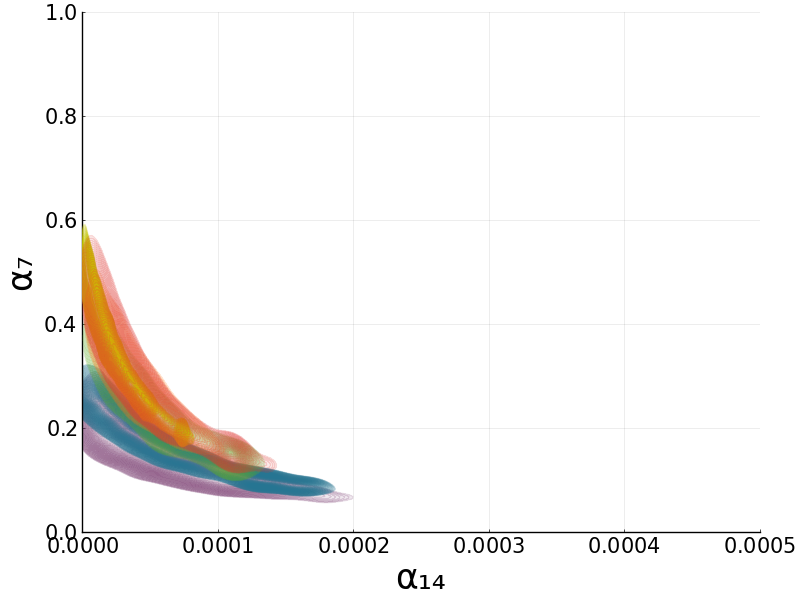

sys:1: UserWarning: The following kwargs were not used by contour: 'label'


In [275]:
contourf()
contourf!(kernel1, alpha = 0.1, levels = 2*10^4:10^3:10^6, mode = :relative, color = palette([color1, color1],2), xlims = (0, 0.0005), ylims = (0,1), xlab = "α₁₄", ylab = "α₇", colorbar = false, legend = :none, size = (1600/2,600), font = "Ariel", xtickfontsize=15,ytickfontsize=15,xguidefontsize=25,yguidefontsize=25,titlefontsize=25)
contourf!(kernel2, alpha = 0.1, levels = 2*10^4:10^3:10^6, mode = :relative, color = palette([color2, color2],2), xlims = (0, 0.0005), ylims = (0,1), xlab = "α₁₄", ylab = "α₇", legend = :none, size = (1600/2,600), font = "Ariel", xtickfontsize=15,ytickfontsize=15,xguidefontsize=25,yguidefontsize=25,titlefontsize=25)
contourf!(kernel3, alpha = 0.1, levels = 2*10^4:10^3:10^6, mode = :relative, color = palette([color3, color3],2), xlims = (0, 0.0005), ylims = (0,1), xlab = "α₁₄", ylab = "α₇", legend = :none, size = (1600/2,600), font = "Ariel", xtickfontsize=15,ytickfontsize=15,xguidefontsize=25,yguidefontsize=25,titlefontsize=25)
contourf!(kernel4, alpha = 0.1, levels = 2*10^4:10^3:10^6, mode = :relative, color = palette([color4, color4],2), xlims = (0, 0.0005), ylims = (0,1), xlab = "α₁₄", ylab = "α₇", legend = :none, size = (1600/2,600), font = "Ariel", xtickfontsize=15,ytickfontsize=15,xguidefontsize=25,yguidefontsize=25,titlefontsize=25)
contourf!(kernel5, alpha = 0.1, levels = 2*10^4:10^3:10^6, mode = :relative, color = palette([color5, color5],2), xlims = (0, 0.0005), ylims = (0,1), xlab = "α₁₄", ylab = "α₇", legend = :none, size = (1600/2,600), font = "Ariel", xtickfontsize=15,ytickfontsize=15,xguidefontsize=25,yguidefontsize=25,titlefontsize=25)
contourf!(kernel6, alpha = 0.1, levels = 2*10^4:10^3:10^6, mode = :relative, color = palette([color6, color6],2), xlims = (0, 0.0005), ylims = (0,1), xlab = "α₁₄", ylab = "α₇", legend = :none, size = (1600/2,600), font = "Ariel", xtickfontsize=15,ytickfontsize=15,xguidefontsize=25,yguidefontsize=25,titlefontsize=25)

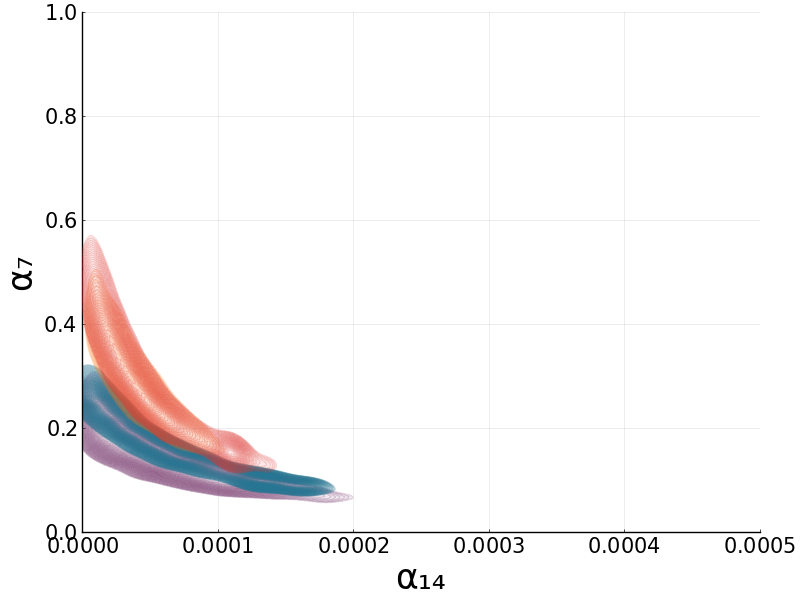

In [276]:
contourf()
contourf!(kernel1, alpha = 0.1, levels = 2*10^4:10^3:10^6, mode = :relative, color = palette([color1, color1],2), xlims = (0, 0.0005), ylims = (0,1), xlab = "α₁₄", ylab = "α₇", colorbar = false, legend = :none, size = (1600/2,600), font = "Ariel", xtickfontsize=15,ytickfontsize=15,xguidefontsize=25,yguidefontsize=25,titlefontsize=25)
contourf!(kernel2, alpha = 0.1, levels = 2*10^4:10^3:10^6, mode = :relative, color = palette([color2, color2],2), xlims = (0, 0.0005), ylims = (0,1), xlab = "α₁₄", ylab = "α₇", legend = :none, size = (1600/2,600), font = "Ariel", xtickfontsize=15,ytickfontsize=15,xguidefontsize=25,yguidefontsize=25,titlefontsize=25)
#contourf!(kernel3, alpha = 0.1, levels = 2*10^4:10^3:10^6, mode = :relative, color = palette([color3, color3],2), xlims = (0, 0.0005), ylims = (0,1), xlab = "α₁₄", ylab = "α₇", legend = :none, size = (1600/2,600), font = "Ariel", xtickfontsize=15,ytickfontsize=15,xguidefontsize=25,yguidefontsize=25,titlefontsize=25)
#contourf!(kernel4, alpha = 0.1, levels = 2*10^4:10^3:10^6, mode = :relative, color = palette([color4, color4],2), xlims = (0, 0.0005), ylims = (0,1), xlab = "α₁₄", ylab = "α₇", legend = :none, size = (1600/2,600), font = "Ariel", xtickfontsize=15,ytickfontsize=15,xguidefontsize=25,yguidefontsize=25,titlefontsize=25)
contourf!(kernel5, alpha = 0.1, levels = 2*10^4:10^3:10^6, mode = :relative, color = palette([color5, color5],2), xlims = (0, 0.0005), ylims = (0,1), xlab = "α₁₄", ylab = "α₇", legend = :none, size = (1600/2,600), font = "Ariel", xtickfontsize=15,ytickfontsize=15,xguidefontsize=25,yguidefontsize=25,titlefontsize=25)
contourf!(kernel6, alpha = 0.1, levels = 2*10^4:10^3:10^6, mode = :relative, color = palette([color6, color6],2), xlims = (0, 0.0005), ylims = (0,1), xlab = "α₁₄", ylab = "α₇", legend = :none, size = (1600/2,600), font = "Ariel", xtickfontsize=15,ytickfontsize=15,xguidefontsize=25,yguidefontsize=25,titlefontsize=25)

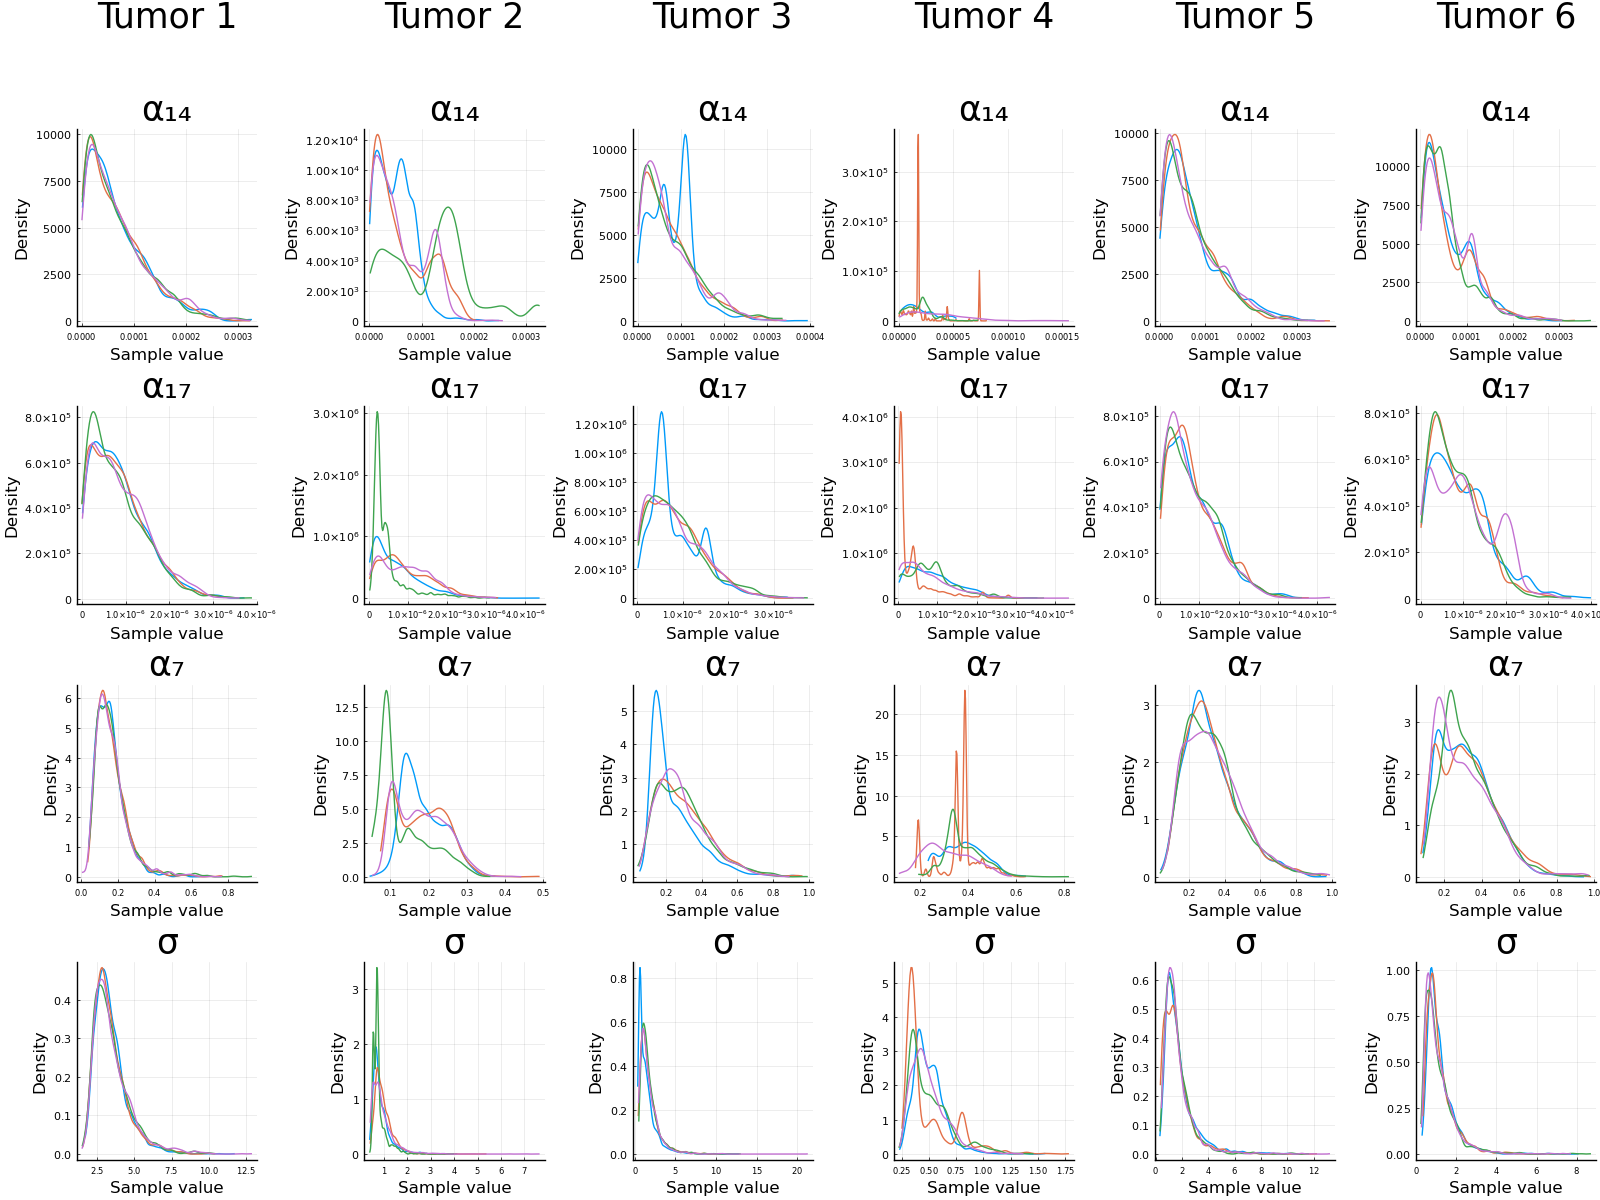

In [304]:
l = @layout [a b c d e f]
a = mixeddensity(chain1, size = (1600/2/2,600), font = "Ariel", plot_title="Tumor 1", xtickfontsize=6,ytickfontsize=8,xguidefontsize=12,yguidefontsize=12,titlefontsize=25)
b = mixeddensity(chain2, size = (1600/2/2,600), font = "Ariel", plot_title="Tumor 2", xtickfontsize=6,ytickfontsize=8,xguidefontsize=12,yguidefontsize=12,titlefontsize=25)
c = mixeddensity(chain3, size = (1600/2/2,600), font = "Ariel", plot_title="Tumor 3", xtickfontsize=6,ytickfontsize=8,xguidefontsize=12,yguidefontsize=12,titlefontsize=25)
d = mixeddensity(chain4, size = (1600/2/2,600), font = "Ariel", plot_title="Tumor 4", xtickfontsize=6,ytickfontsize=8,xguidefontsize=12,yguidefontsize=12,titlefontsize=25)
e = mixeddensity(chain5, size = (1600/2/2,600), font = "Ariel", plot_title="Tumor 5", xtickfontsize=6,ytickfontsize=8,xguidefontsize=12,yguidefontsize=12,titlefontsize=25)
f = mixeddensity(chain6, size = (1600/2/2,600), font = "Ariel", plot_title="Tumor 6", xtickfontsize=6,ytickfontsize=8,xguidefontsize=12,yguidefontsize=12,titlefontsize=25)
plot(a, b, c, d, e, f, layout = l, size =(1600,1200), plot_title ="", titlefontsize=25)

In [322]:
plot()
#plot parameters
n = 1.0

α₁ = 10.0*(10.0^1.0) #M-MDSCs production rate
α₂ = (10.0^8.0) #M-MDSCs expansion coefficient 
α₃ = 0.2 #M-MDSCs death rate

α₈ = 10.0^(5.0) #tumor maximum size
α₉ = 3.5*(10.0^(-6.0)) #tumor cells kill rate by NK cells
α₁₀ = 1.1*(10.0^(-7.0)) #tumor cells kill rate by T cells
α₁₁ = 0.0 #tumor cell death rate

α₁₂ = 1.4*(10.0^4.0) #NK cells production rate
α₁₃ = 2.5*(10.0^(-2.0)) #NK cells expansion coefficient
α₁₆ = 4.12*(10.0^(-2.0)) #NK cells death rate

α₁₇ = 1.1*(10.0^(-7.0)) #CTL stimulation as a result of tumor-NK cell interaction
α₁₈ = 10.0^(-1.0) #CTL expansion coefficient 
α₁₉ = (10.0^(-4.0)) #(10.0^(-4.0)) #CTL inactivation rate by M-MDSCs
α₂₁ = 2.0*(10.0^(-2.0)) #CTL death rate

γ₁ = (10.0^(10.0)) #steepness coefficient of MDSC production curve
γ₂ = 2.02*(10.0^(7.0)) #steepness coefficient of NK production curve
γ₃ = 2.02*(10.0^(7.0)) #steepness coefficient of CTL production curve



p = (α₁₄, α₁₇, α₇) 



u0 = [8395.368084462818, 804.0710624094437, 197565.74910954377, 1654.4182572290226] #100

α₁₄ = mean(chain_array1[:,1]) 
α₁₇ = mean(chain_array1[:,2]) 
α₇ = mean(chain_array1[:,3]) 
tspan = (0.0,last(time_to_fit1)+20)
p = (α₁₄, α₁₇, α₇)
probplot = ODEProblem(ode_system,u0,tspan,p)
solplotsmooth1 = solve(probplot,alg,saveat=0.1,callback=floor_event)

α₁₄ = mean(chain_array2[:,1]) 
α₁₇ = mean(chain_array2[:,2]) 
α₇ = mean(chain_array2[:,3]) 
tspan = (0.0,last(time_to_fit2)+20)
p = (α₁₄, α₁₇, α₇)
probplot = ODEProblem(ode_system,u0,tspan,p)
solplotsmooth2 = solve(probplot,alg,saveat=0.1,callback=floor_event)

α₁₄ = mean(chain_array3[:,1]) 
α₁₇ = mean(chain_array3[:,2]) 
α₇ = mean(chain_array3[:,3]) 
tspan = (0.0,last(time_to_fit3)+20)
p = (α₁₄, α₁₇, α₇)
probplot = ODEProblem(ode_system,u0,tspan,p)
solplotsmooth3 = solve(probplot,alg,saveat=0.1,callback=floor_event)

α₁₄ = mean(chain_array4[:,1]) 
α₁₇ = mean(chain_array4[:,2]) 
α₇ = mean(chain_array4[:,3]) 
tspan = (0.0,last(time_to_fit4)+20)
p = (α₁₄, α₁₇, α₇)
probplot = ODEProblem(ode_system,u0,tspan,p)
solplotsmooth4 = solve(probplot,alg,saveat=0.1,callback=floor_event)

α₁₄ = mean(chain_array5[:,1]) 
α₁₇ = mean(chain_array5[:,2]) 
α₇ = mean(chain_array5[:,3])
tspan = (0.0,last(time_to_fit5)+20)
p = (α₁₄, α₁₇, α₇)
probplot = ODEProblem(ode_system,u0,tspan,p)
solplotsmooth5 = solve(probplot,alg,saveat=0.1,callback=floor_event)

α₁₄ = mean(chain_array6[:,1]) 
α₁₇ = mean(chain_array6[:,2]) 
α₇ = mean(chain_array6[:,3]) 
tspan = (0.0,last(time_to_fit6)+20)
p = (α₁₄, α₁₇, α₇)
probplot = ODEProblem(ode_system,u0,tspan,p)
solplotsmooth6 = solve(probplot,alg,saveat=0.1,callback=floor_event)

retcode: Success
Interpolation: 1st order linear
t: 2201-element Vector{Float64}:
   0.0
   0.1
   0.2
   0.3
   0.4
   0.5
   0.6
   0.7
   0.8
   0.9
   1.0
   1.1
   1.2
   ⋮
 218.9
 219.0
 219.1
 219.2
 219.3
 219.4
 219.5
 219.6
 219.7
 219.8
 219.9
 220.0
u: 2201-element Vector{Vector{Float64}}:
 [8395.368084462818, 804.0710624094437, 197565.74910954377, 1654.4182572290226]
 [8482.874185084069, 806.4055470158884, 197195.3236743874, 1789.8981752003021]
 [8569.561199589361, 808.7800335310969, 196825.42448926053, 1925.2603861516664]
 [8655.439381095879, 811.1929233956326, 196456.01105420713, 2060.4788457836275]
 [8740.519708294472, 813.6426632312813, 196087.04566017468, 2195.5278998777394]
 [8824.813594155537, 816.127740161123, 195718.4927494357, 2330.3823348701617]
 [8908.332880322196, 818.6466817076691, 195350.31890265178, 2465.0173786821583]
 [8991.089837110303, 821.1980557928623, 194982.4928388732, 2599.4087007200956]
 [9073.09716350844, 823.7804707380758, 194614.98541553924, 27

In [335]:
time_to_fit_plot1 = append!([0.0],time_to_fit1) 
tumor_to_fit_plot1 = append!([0.0],tumor_to_fit1)

time_to_fit_plot2 = append!([0.0],time_to_fit2) 
tumor_to_fit_plot2 = append!([0.0],tumor_to_fit2) 

time_to_fit_plot3 = append!([0.0],time_to_fit3) 
tumor_to_fit_plot3 = append!([0.0],tumor_to_fit3) 

time_to_fit_plot4 = append!([0.0],time_to_fit4) 
tumor_to_fit_plot4 = append!([0.0],tumor_to_fit4) 

time_to_fit_plot5 = append!([0.0],time_to_fit5) 
tumor_to_fit_plot5 = append!([0.0],tumor_to_fit5) 

time_to_fit_plot6 = append!([0.0],time_to_fit6) 
tumor_to_fit_plot6 = append!([0.0],tumor_to_fit6) 

4-element Vector{Float64}:
 0.0
 0.29925849336886307
 0.6372155979283378
 0.9012276436703168

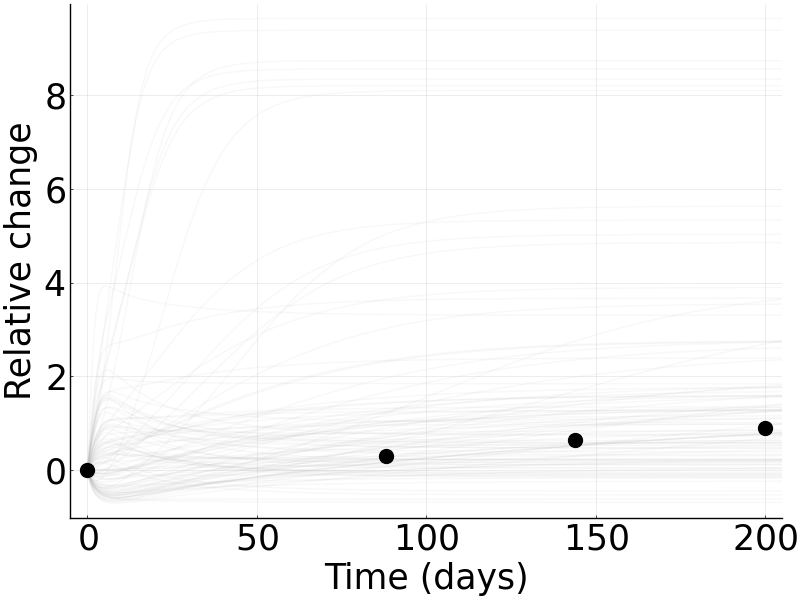

In [339]:
fig_layout = @layout [a b; c d; e f; g h; i j; k l]

plot()
for k in 1:100
    resol = solve(remake(prob1,p=chain_array1[rand(1:length(chain_array1[:,1])), 1:4]),Tsit5(),saveat=0.1,callback=floor_event,reltol=1e-6,isoutofdomain=(u,p,t)->any(x->x<0,u))
    plot!(resol, alpha=0.1, color = "#BBBBBB", legend = false, yaxis=:log,size =(1600/2,600), font = "Ariel", ylims = (0.01,10^7.5), xtickfontsize=25,ytickfontsize=25,xlabel="Time (days)",xguidefontsize=25,ylabel="Number of cells",yguidefontsize=25,title = "")
end
plot!(solplotsmooth1, w=2, yaxis=:log,size =(1600/2,600), font = "Ariel", ylims = (0.01,10^7.5), color = [logocolors.red "goldenrod2" logocolors.green logocolors.blue], alpha = [0.3 0.3 0.3 0.3], legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (days)",xguidefontsize=25,ylabel="Number of cells",yguidefontsize=25,title = "",titlefontsize=25)
scatter!(time_to_fit1, tumor_curve_fit1, markersize = 15, color = "Black")
a = scatter!([0.0],[u0[1]], markersize = 10, color = "Black")

scatter()
for k in 1:100
    resol_tumor = solve(remake(prob1,p=chain_array1[rand(1:length(chain_array1[:,1])), 1:4]),Tsit5(),saveat=0.1,callback=floor_event,reltol=1e-6,isoutofdomain=(u,p,t)->any(x->x<0,u)) 
    many_runs = ones(length(resol_tumor)) 
        for i = 1:convert(Int64, length(resol_tumor)) 
            many_runs[i] = (resol_tumor[i][1]-u0[1])./u0[1]
        end
    plot!(resol_tumor.t, many_runs, alpha=0.1, color = "#BBBBBB", legend = false,size =(1600/2,600), font = "Ariel", xtickfontsize=25,ytickfontsize=25,xlabel="Time (days)",xguidefontsize=25,ylabel="Number of cells",yguidefontsize=25,title = "")
end
b = scatter!(time_to_fit_plot1, tumor_to_fit_plot1, markersize = 10, xlims = (-5,last(time_to_fit_plot1)+5), size =(1600/2,600), font = "Ariel", markercolor = "Black", legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (days)",xguidefontsize=25,ylabel="Relative change",yguidefontsize=25,title = "",titlefontsize=25)

plot()
for k in 1:100
    resol = solve(remake(prob1,p=chain_array2[rand(1:length(chain_array2[:,1])), 1:4]),Tsit5(),saveat=0.1,callback=floor_event,reltol=1e-6,isoutofdomain=(u,p,t)->any(x->x<0,u))
    plot!(resol, alpha=0.1, color = "#BBBBBB", legend = false, yaxis=:log,size =(1600/2,600), font = "Ariel", ylims = (0.01,10^7.5), xtickfontsize=25,ytickfontsize=25,xlabel="Time (days)",xguidefontsize=25,ylabel="Number of cells",yguidefontsize=25,title = "")
end
plot!(solplotsmooth2, w=2, yaxis=:log,size =(1600/2,600), font = "Ariel", ylims = (0.01,10^7.5), color = [logocolors.red "goldenrod2" logocolors.green logocolors.blue], alpha = [0.3 0.3 0.3 0.3], legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (days)",xguidefontsize=25,ylabel="Number of cells",yguidefontsize=25,title = "",titlefontsize=25)
scatter!(time_to_fit2, tumor_curve_fit2, markersize = 15, color = "Black")
c = scatter!([0.0],[u0[1]], markersize = 10, color = "Black")

scatter()
for k in 1:100
    resol_tumor = solve(remake(prob1,p=chain_array2[rand(1:length(chain_array2[:,1])), 1:4]),Tsit5(),saveat=0.1,callback=floor_event,reltol=1e-6,isoutofdomain=(u,p,t)->any(x->x<0,u)) 
    many_runs = ones(length(resol_tumor)) 
        for i = 1:convert(Int64, length(resol_tumor)) 
            many_runs[i] = (resol_tumor[i][1]-u0[1])./u0[1]
        end
    plot!(resol_tumor.t, many_runs, alpha=0.1, color = "#BBBBBB", legend = false,size =(1600/2,600), font = "Ariel", xtickfontsize=25,ytickfontsize=25,xlabel="Time (days)",xguidefontsize=25,ylabel="Number of cells",yguidefontsize=25,title = "")
end
d = scatter!(time_to_fit_plot2, tumor_to_fit_plot2, markersize = 10, xlims = (-5,last(time_to_fit_plot2)+5), size =(1600/2,600), font = "Ariel", markercolor = "Black", legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (days)",xguidefontsize=25,ylabel="Relative change",yguidefontsize=25,title = "",titlefontsize=25)

plot()
for k in 1:100
    resol = solve(remake(prob1,p=chain_array3[rand(1:length(chain_array3[:,1])), 1:4]),Tsit5(),saveat=0.1,callback=floor_event,reltol=1e-6,isoutofdomain=(u,p,t)->any(x->x<0,u))
    plot!(resol, alpha=0.1, color = "#BBBBBB", legend = false, yaxis=:log,size =(1600/2,600), font = "Ariel", ylims = (0.01,10^7.5), xtickfontsize=25,ytickfontsize=25,xlabel="Time (days)",xguidefontsize=25,ylabel="Number of cells",yguidefontsize=25,title = "")
end
plot!(solplotsmooth3, w=2, yaxis=:log,size =(1600/2,600), font = "Ariel", ylims = (0.01,10^7.5), color = [logocolors.red "goldenrod2" logocolors.green logocolors.blue], alpha = [0.3 0.3 0.3 0.3], legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (days)",xguidefontsize=25,ylabel="Number of cells",yguidefontsize=25,title = "",titlefontsize=25)
scatter!(time_to_fit3, tumor_curve_fit3, markersize = 15, color = "Black")
e = scatter!([0.0],[u0[1]], markersize = 10, color = "Black")

scatter()
for k in 1:100
    resol_tumor = solve(remake(prob1,p=chain_array3[rand(1:length(chain_array3[:,1])), 1:4]),Tsit5(),saveat=0.1,callback=floor_event,reltol=1e-6,isoutofdomain=(u,p,t)->any(x->x<0,u)) 
    many_runs = ones(length(resol_tumor)) 
        for i = 1:convert(Int64, length(resol_tumor)) 
            many_runs[i] = (resol_tumor[i][1]-u0[1])./u0[1]
        end
    plot!(resol_tumor.t, many_runs, alpha=0.1, color = "#BBBBBB", legend = false,size =(1600/2,600), font = "Ariel", xtickfontsize=25,ytickfontsize=25,xlabel="Time (days)",xguidefontsize=25,ylabel="Number of cells",yguidefontsize=25,title = "")
end
f = scatter!(time_to_fit_plot3, tumor_to_fit_plot3, markersize = 10, xlims = (-5,last(time_to_fit_plot3)+5), size =(1600/2,600), font = "Ariel", markercolor = "Black", legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (days)",xguidefontsize=25,ylabel="Relative change",yguidefontsize=25,title = "",titlefontsize=25)

plot()
for k in 1:100
    resol = solve(remake(prob1,p=chain_array4[rand(1:length(chain_array4[:,1])), 1:4]),Tsit5(),saveat=0.1,callback=floor_event,reltol=1e-6,isoutofdomain=(u,p,t)->any(x->x<0,u))
    plot!(resol, alpha=0.1, color = "#BBBBBB", legend = false, yaxis=:log,size =(1600/2,600), font = "Ariel", ylims = (0.01,10^7.5), xtickfontsize=25,ytickfontsize=25,xlabel="Time (days)",xguidefontsize=25,ylabel="Number of cells",yguidefontsize=25,title = "")
end
plot!(solplotsmooth4, w=2, yaxis=:log,size =(1600/2,600), font = "Ariel", ylims = (0.01,10^7.5), color = [logocolors.red "goldenrod2" logocolors.green logocolors.blue], alpha = [0.3 0.3 0.3 0.3], legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (days)",xguidefontsize=25,ylabel="Number of cells",yguidefontsize=25,title = "",titlefontsize=25)
scatter!(time_to_fit4, tumor_curve_fit4, markersize = 15, color = "Black")
g = scatter!([0.0],[u0[1]], markersize = 10, color = "Black")

scatter()
for k in 1:100
    resol_tumor = solve(remake(prob1,p=chain_array4[rand(1:length(chain_array4[:,1])), 1:4]),Tsit5(),saveat=0.1,callback=floor_event,reltol=1e-6,isoutofdomain=(u,p,t)->any(x->x<0,u)) 
    many_runs = ones(length(resol_tumor)) 
        for i = 1:convert(Int64, length(resol_tumor)) 
            many_runs[i] = (resol_tumor[i][1]-u0[1])./u0[1]
        end
    plot!(resol_tumor.t, many_runs, alpha=0.1, color = "#BBBBBB", legend = false,size =(1600/2,600), font = "Ariel", xtickfontsize=25,ytickfontsize=25,xlabel="Time (days)",xguidefontsize=25,ylabel="Number of cells",yguidefontsize=25,title = "")
end
h = scatter!(time_to_fit_plot4, tumor_to_fit_plot4, markersize = 10, xlims = (-5,last(time_to_fit_plot4)+5), size =(1600/2,600), font = "Ariel", markercolor = "Black", legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (days)",xguidefontsize=25,ylabel="Relative change",yguidefontsize=25,title = "",titlefontsize=25)

plot()
for k in 1:100
    resol = solve(remake(prob1,p=chain_array5[rand(1:length(chain_array5[:,1])), 1:4]),Tsit5(),saveat=0.1,callback=floor_event,reltol=1e-6,isoutofdomain=(u,p,t)->any(x->x<0,u))
    plot!(resol, alpha=0.1, color = "#BBBBBB", legend = false, yaxis=:log,size =(1600/2,600), font = "Ariel", ylims = (0.01,10^7.5), xtickfontsize=25,ytickfontsize=25,xlabel="Time (days)",xguidefontsize=25,ylabel="Number of cells",yguidefontsize=25,title = "")
end
plot!(solplotsmooth5, w=2, yaxis=:log,size =(1600/2,600), font = "Ariel", ylims = (0.01,10^7.5), color = [logocolors.red "goldenrod2" logocolors.green logocolors.blue], alpha = [0.3 0.3 0.3 0.3], legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (days)",xguidefontsize=25,ylabel="Number of cells",yguidefontsize=25,title = "",titlefontsize=25)
scatter!(time_to_fit5, tumor_curve_fit5, markersize = 15, color = "Black")
i = scatter!([0.0],[u0[1]], markersize = 10, color = "Black")

scatter()
for k in 1:100
    resol_tumor = solve(remake(prob1,p=chain_array5[rand(1:length(chain_array5[:,1])), 1:4]),Tsit5(),saveat=0.1,callback=floor_event,reltol=1e-6,isoutofdomain=(u,p,t)->any(x->x<0,u)) 
    many_runs = ones(length(resol_tumor)) 
        for i = 1:convert(Int64, length(resol_tumor)) 
            many_runs[i] = (resol_tumor[i][1]-u0[1])./u0[1]
        end
    plot!(resol_tumor.t, many_runs, alpha=0.1, color = "#BBBBBB", legend = false,size =(1600/2,600), font = "Ariel", xtickfontsize=25,ytickfontsize=25,xlabel="Time (days)",xguidefontsize=25,ylabel="Number of cells",yguidefontsize=25,title = "")
end
j = scatter!(time_to_fit_plot5, tumor_to_fit_plot5, markersize = 10, xlims = (-5,last(time_to_fit_plot5)+5), size =(1600/2,600), font = "Ariel", markercolor = "Black", legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (days)",xguidefontsize=25,ylabel="Relative change",yguidefontsize=25,title = "",titlefontsize=25)

plot()
for k in 1:100
    resol = solve(remake(prob1,p=chain_array6[rand(1:length(chain_array6[:,1])), 1:4]),Tsit5(),saveat=0.1,callback=floor_event,reltol=1e-6,isoutofdomain=(u,p,t)->any(x->x<0,u))
    plot!(resol, alpha=0.1, color = "#BBBBBB", legend = false, yaxis=:log,size =(1600/2,600), font = "Ariel", ylims = (0.01,10^7.5), xtickfontsize=25,ytickfontsize=25,xlabel="Time (days)",xguidefontsize=25,ylabel="Number of cells",yguidefontsize=25,title = "")
end
plot!(solplotsmooth6, w=2, yaxis=:log,size =(1600/2,600), font = "Ariel", ylims = (0.01,10^7.5), color = [logocolors.red "goldenrod2" logocolors.green logocolors.blue], alpha = [0.3 0.3 0.3 0.3], legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (days)",xguidefontsize=25,ylabel="Number of cells",yguidefontsize=25,title = "",titlefontsize=25)
scatter!(time_to_fit6, tumor_curve_fit6, markersize = 15, color = "Black")
k = scatter!([0.0],[u0[1]], markersize = 10, color = "Black")

scatter()
for k in 1:100
    resol_tumor = solve(remake(prob1,p=chain_array6[rand(1:length(chain_array6[:,1])), 1:4]),Tsit5(),saveat=0.1,callback=floor_event,reltol=1e-6,isoutofdomain=(u,p,t)->any(x->x<0,u)) 
    many_runs = ones(length(resol_tumor)) 
        for i = 1:convert(Int64, length(resol_tumor)) 
            many_runs[i] = (resol_tumor[i][1]-u0[1])./u0[1]
        end
    plot!(resol_tumor.t, many_runs, alpha=0.1, color = "#BBBBBB", legend = false,size =(1600/2,600), font = "Ariel", xtickfontsize=25,ytickfontsize=25,xlabel="Time (days)",xguidefontsize=25,ylabel="Number of cells",yguidefontsize=25,title = "")
end
l = scatter!(time_to_fit_plot6, tumor_to_fit_plot6, markersize = 10, xlims = (-5,last(time_to_fit_plot6)+5), size =(1600/2,600), font = "Ariel", markercolor = "Black", legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (days)",xguidefontsize=25,ylabel="Relative change",yguidefontsize=25,title = "",titlefontsize=25)

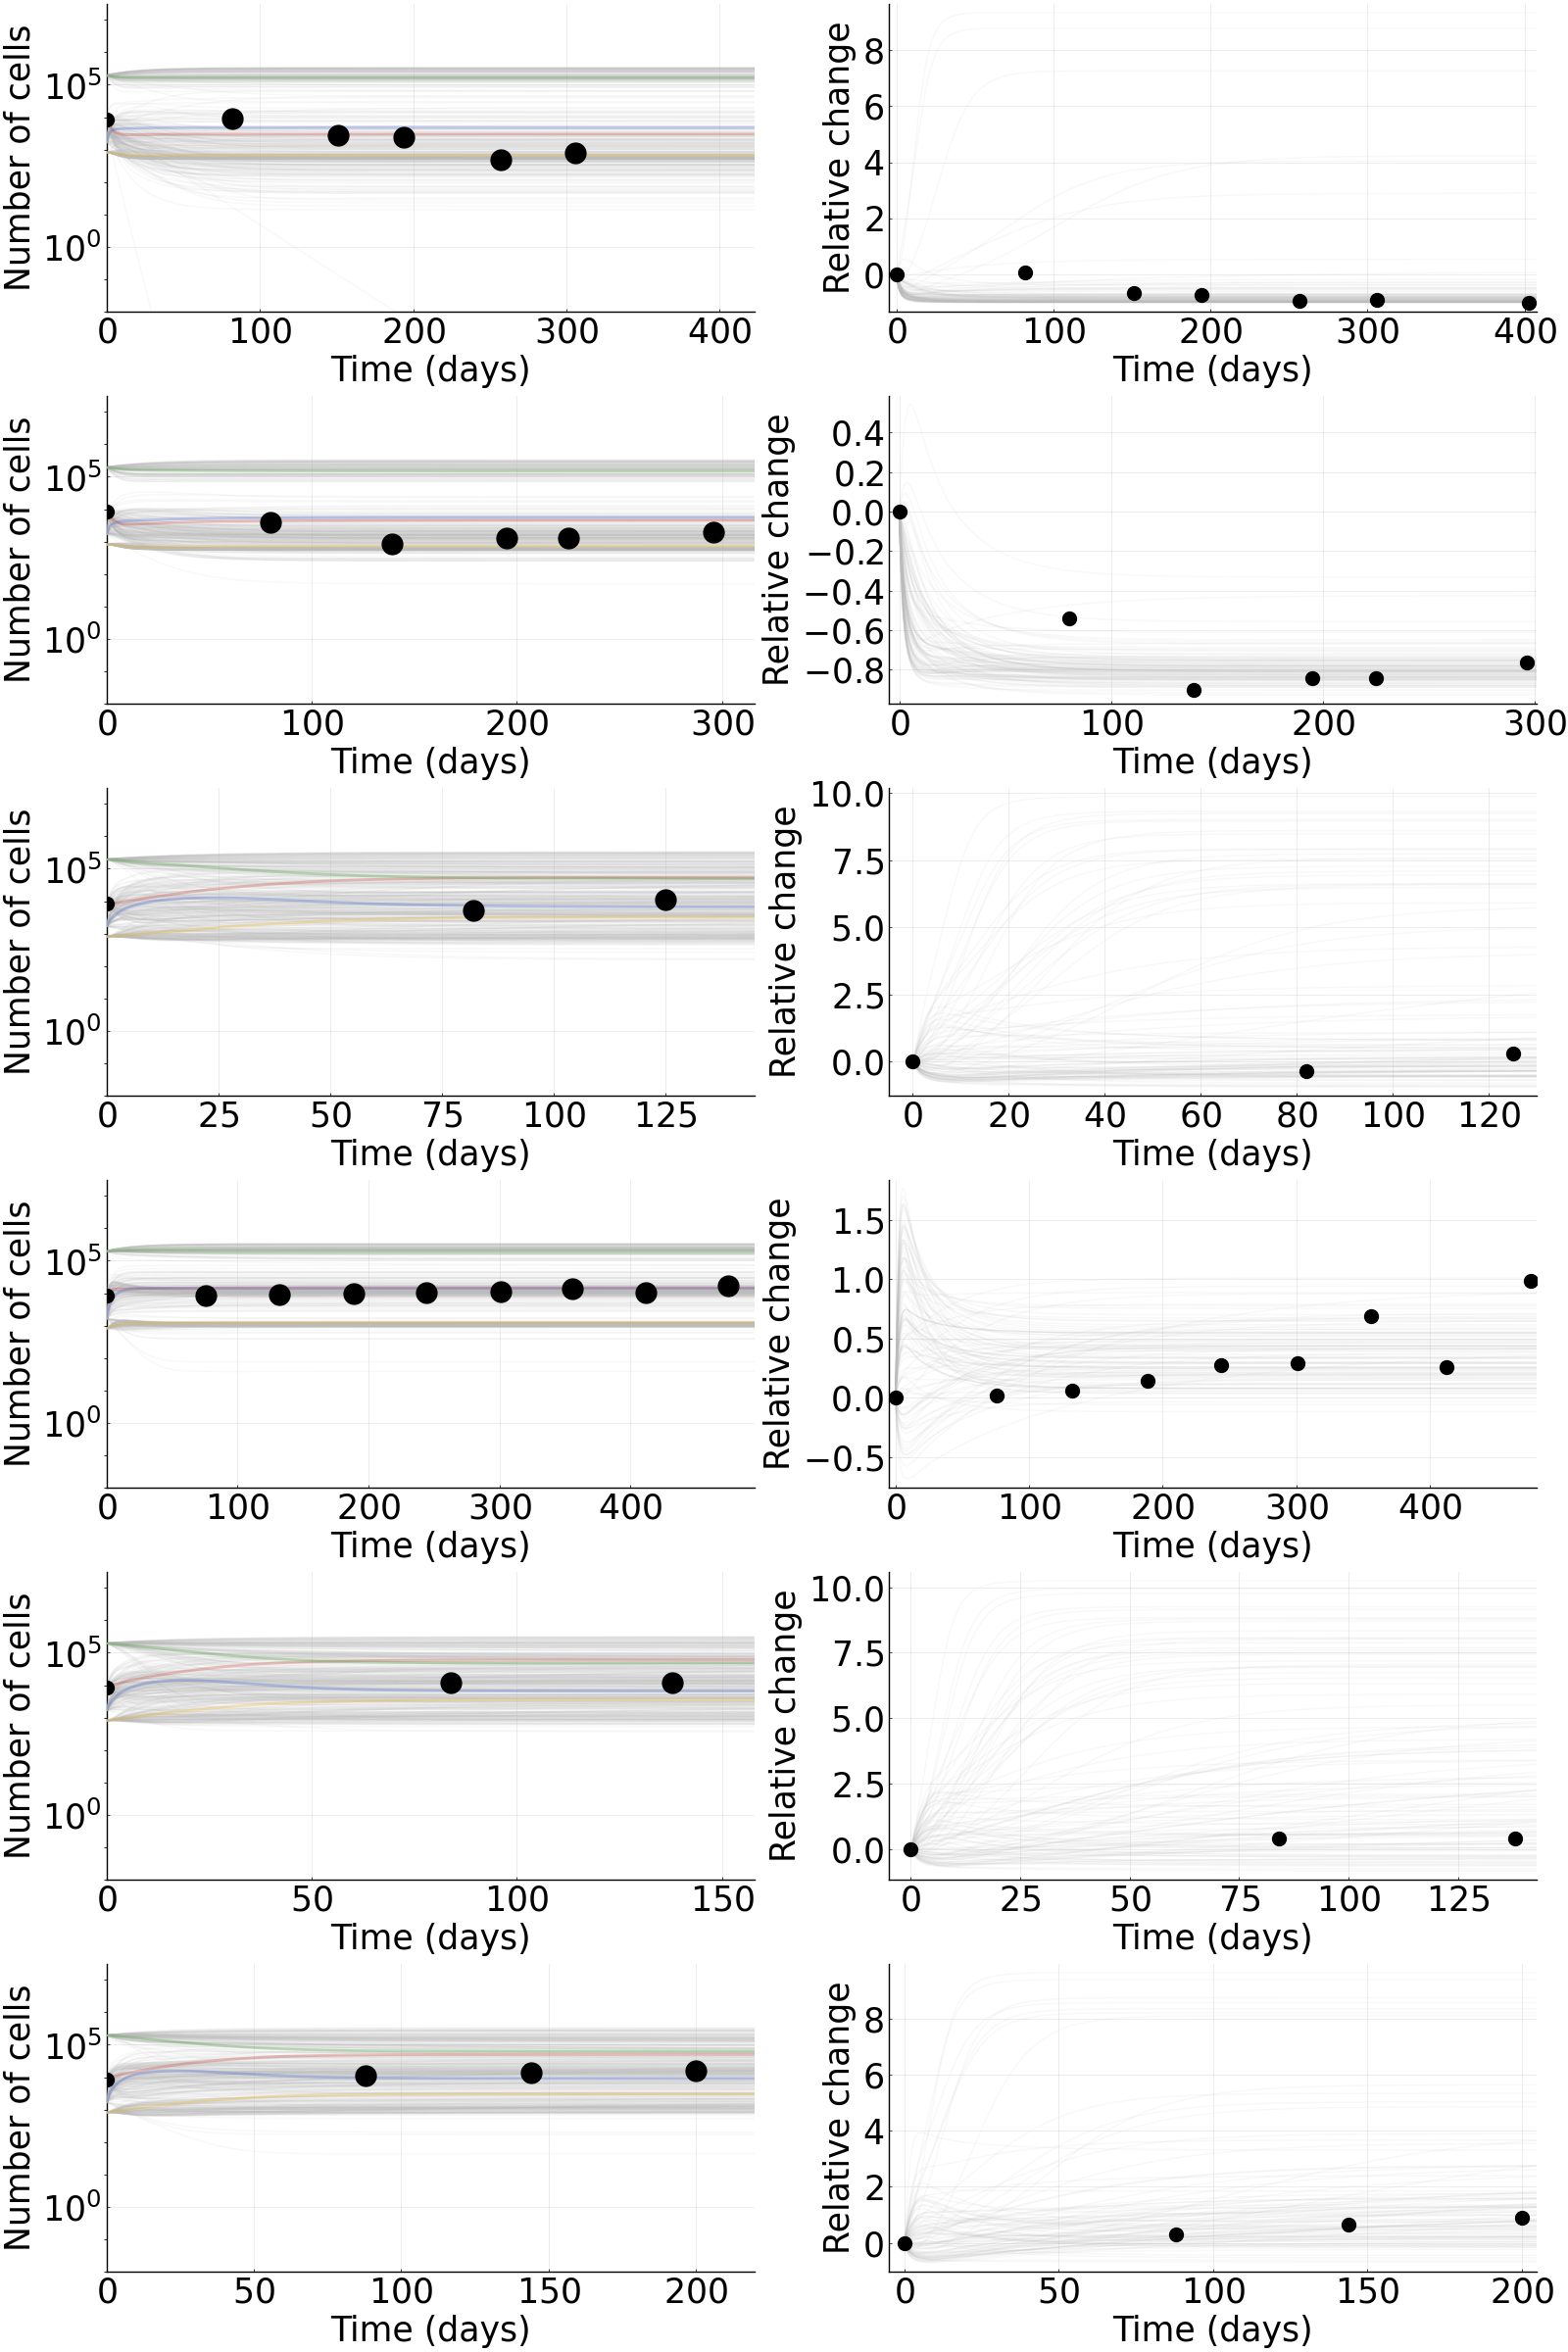

┌ Warning: Invalid negative or zero value -2.613279424239016e-33 found at series index 2372 for log10 based yscale
└ @ Plots /Users/jessekreger/.julia/packages/Plots/Xv2qA/src/utils.jl:95
┌ Warning: Invalid negative or zero value -8.649045812166299e-11 found at series index 4020 for log10 based yscale
└ @ Plots /Users/jessekreger/.julia/packages/Plots/Xv2qA/src/utils.jl:95


In [340]:
plot(a, b, c, d, e, f, g, h, i, j, k, l, layout = fig_layout, size =(1600,1200*2), plot_title ="", titlefontsize=25)

In [3]:
using DecisionTree
using JLD

In [4]:
chain_data = [chain_array1; chain_array2; chain_array5; chain_array6]

LoadError: UndefVarError: chain_array1 not defined

In [6]:
only_two = [chain_data[:,1] chain_data[:,3]]

32000×2 Matrix{Float64}:
 6.66337e-8   0.394627
 1.46476e-7   0.251146
 4.00351e-8   0.202096
 1.85188e-5   0.241695
 3.85708e-5   0.129849
 2.16898e-5   0.277455
 2.29713e-5   0.141498
 5.48117e-5   0.233141
 0.000129084  0.68682
 5.47138e-5   0.169198
 6.34872e-5   0.177014
 3.21765e-5   0.177815
 2.63641e-5   0.217566
 ⋮            
 8.18517e-5   0.185583
 8.18517e-5   0.185583
 8.18517e-5   0.185583
 8.18517e-5   0.185583
 8.18517e-5   0.185583
 8.18517e-5   0.185583
 8.18517e-5   0.185583
 8.18517e-5   0.185583
 8.18517e-5   0.185583
 8.18517e-5   0.185583
 8.18517e-5   0.185583
 8.18517e-5   0.185583

In [55]:
chain_classification = zeros(String,length(chain_data[:,1]))
for i = 1:16000
    chain_classification[i] = "decreasing"
end
for i = 16001:32000
    chain_classification[i] = "increasing"
end

In [78]:
# the data loaded are of type Array{Any}
# cast them to concrete types for better performance
features = float.(only_two)
labels   = string.(chain_classification)

32000-element Vector{String}:
 "decreasing"
 "decreasing"
 "decreasing"
 "decreasing"
 "decreasing"
 "decreasing"
 "decreasing"
 "decreasing"
 "decreasing"
 "decreasing"
 "decreasing"
 "decreasing"
 "decreasing"
 ⋮
 "increasing"
 "increasing"
 "increasing"
 "increasing"
 "increasing"
 "increasing"
 "increasing"
 "increasing"
 "increasing"
 "increasing"
 "increasing"
 "increasing"

In [116]:
# train depth-truncated classifier
model = DecisionTreeClassifier(max_depth=20)

DecisionTreeClassifier
max_depth:                20
min_samples_leaf:         1
min_samples_split:        2
min_purity_increase:      0.0
pruning_purity_threshold: 1.0
n_subfeatures:            0
classes:                  nothing
root:                     nothing

In [117]:
fit!(model, features, labels)

DecisionTreeClassifier
max_depth:                20
min_samples_leaf:         1
min_samples_split:        2
min_purity_increase:      0.0
pruning_purity_threshold: 1.0
n_subfeatures:            0
classes:                  ["decreasing", "increasing"]
root:                     Decision Tree
Leaves: 2010
Depth:  20

In [118]:
# pretty print of the tree, to a depth of 5 nodes (optional)
print_tree(model, 3)

Feature 2, Threshold 0.27869835965974354
L-> Feature 2, Threshold 0.11799571672908253
    L-> Feature 1, Threshold 0.00014624568984259785
        L-> 
        R-> 
    R-> Feature 1, Threshold 3.841478529809146e-5
        L-> 
        R-> 
R-> Feature 1, Threshold 1.0055547577418878e-5
    L-> Feature 2, Threshold 0.3639570210995995
        L-> 
        R-> 
    R-> Feature 2, Threshold 0.32736985428702003
        L-> 
        R-> 


In [119]:
# apply learned model
DecisionTree.predict(model, [8.18517e-5,0.185583])

"increasing"

In [120]:
# get the probability of each label
predict_proba(model, [8.18517e-5,0.185583])

2-element Vector{Float64}:
 0.0
 1.0

In [121]:
println(get_classes(model)) # returns the ordering of the columns in predict_proba's output

["decreasing", "increasing"]


In [122]:
# run n-fold cross validation over 3 CV folds
# See ScikitLearn.jl for installation instructions
using ScikitLearn.CrossValidation: cross_val_score
accuracy = cross_val_score(model, features, labels, cv=3)

3-element Vector{Float64}:
 0.8682977127859017
 0.8862741421338833
 0.9000562535158447